In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/My Drive/CS412/Project/german_credit_data.csv') # enter the file path on your drive for the csv file
data.head() # print first 5 rows to check the data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


###**DATA PREPROCESSING**


In [ ]:
# This method of imputation of missing values is based on getting the percentages of values of each variable and filling NaN values randomly but according to the percanteges.
imputated_data = data.copy()

col = 'Saving accounts'
counts = imputated_data[col].value_counts(normalize=True)  # get the distribution of the categories
missing = imputated_data[col].isnull()

col_checking = 'Checking account'
counts_checking = imputated_data[col_checking].value_counts(normalize=True)  # get the distribution of the categories
missing_checking = imputated_data[col_checking].isnull()

# Fill the missing values with categories according to the distribution
imputated_data.loc[missing, col] = np.random.choice(counts.index, size=len(data[missing]), p=counts.values)
imputated_data.loc[missing_checking, col_checking] = np.random.choice(counts_checking.index, size=len(data[missing_checking]), p=counts_checking.values)

imputated_data.head()




,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,moderate,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
data['Saving accounts'] = data['Saving accounts'].fillna(data['Saving accounts'].mode()[0])
data['Checking account'] = data['Checking account'].fillna(data['Checking account'].mode()[0])
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# Define the order of your categories
housing_encode = [['free', 'rent', 'own']] # free = 0.0 /// rent = 1.0 /// own = 2.0
saving_encode = [['little', 'moderate', 'quite rich', 'rich']] # little = 0.0 /// moderate = 1.0 /// quite rich = 2.0 /// rich = 3.0
checking_encode = [['little', 'moderate', 'rich']] # little = 0.0 /// moderate = 1.0 /// rich = 2.0
risk_encode = [['good', 'bad']] # good = 0.0 /// bad = 1.0


# Create the encoder
ordinal_encoder_housing = OrdinalEncoder(categories=housing_encode)
ordinal_encoder_saving = OrdinalEncoder(categories=saving_encode)
ordinal_encoder_checking = OrdinalEncoder(categories=checking_encode)
#Since 'risk is going to be our tager colunm, we don't want to encode it with one-hot encoding because that would create two instances of targes.'
ordinal_encoder_risk = OrdinalEncoder(categories=risk_encode)

# Fit and transform the data and replace the column in the dataframe
imputated_data['Housing'] = ordinal_encoder_housing.fit_transform(imputated_data[['Housing']])
imputated_data['Saving accounts'] = ordinal_encoder_saving.fit_transform(imputated_data[['Saving accounts']])
imputated_data['Checking account'] = ordinal_encoder_checking.fit_transform(imputated_data[['Checking account']])
imputated_data['Risk'] = ordinal_encoder_risk.fit_transform(imputated_data[['Risk']])

print(imputated_data.head())  # print first 5 rows to check the data


   Unnamed: 0  Age     Sex  Job  Housing  Saving accounts  Checking account  \
0           0   67    male    2      2.0              0.0               0.0   
1           1   22  female    2      2.0              0.0               1.0   
2           2   49    male    1      2.0              0.0               1.0   
3           3   45    male    2      0.0              0.0               0.0   
4           4   53    male    2      0.0              0.0               0.0   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV   0.0  
1           5951        48             radio/TV   1.0  
2           2096        12            education   0.0  
3           7882        42  furniture/equipment   0.0  
4           4870        24                  car   1.0  


In [ ]:
# Since seks and purpose variables are not an ordered categorical data (they cannot be put in a logical order),
# we implemented one-hot encoding insted of the previous ordinal encoding for these

imputated_data = pd.get_dummies(imputated_data, columns=['Sex'], prefix='Sex')
imputated_data = pd.get_dummies(imputated_data, columns=['Purpose'], prefix='Purpose')
print(imputated_data.head())  # print first 5 rows to check the data


   Unnamed: 0  Age  Job  Housing  Saving accounts  Checking account  \
0           0   67    2      2.0              0.0               0.0   
1           1   22    2      2.0              0.0               1.0   
2           2   49    1      2.0              0.0               1.0   
3           3   45    2      0.0              0.0               0.0   
4           4   53    2      0.0              0.0               0.0   

   Credit amount  Duration  Risk  Sex_female  Sex_male  Purpose_business  \
0           1169         6   0.0           0         1                 0   
1           5951        48   1.0           1         0                 0   
2           2096        12   0.0           0         1                 0   
3           7882        42   0.0           0         1                 0   
4           4870        24   1.0           0         1                 0   

   Purpose_car  Purpose_domestic appliances  Purpose_education  \
0            0                            0       

###**KNN CLASSIFICATION STARTS!!!**

In [ ]:
from sklearn.model_selection import train_test_split

X = imputated_data.drop('Risk', axis=1)  # features
y = imputated_data['Risk']  # target

# first split the data into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# then split the temporary set into validation and test sets using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

np.random.seed(42)

In [ ]:
#We have to standartize out data since the numerical differences is too large
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#In order to make them 'Dataframe' objects from 'numpy.ndarray' we have to implement this code:

X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Validation accuracy for k= 1 : 0.635
Validation accuracy for k= 3 : 0.6487499999999999
Validation accuracy for k= 5 : 0.6725
Validation accuracy for k= 7 : 0.6725
Validation accuracy for k= 9 : 0.7037500000000001
Validation accuracy for k= 11 : 0.6925
Validation accuracy for k= 13 : 0.6987500000000001
Best mean validation accuracy ( 0.7037500000000001 ) is achieved with k= 9
The final model accuracy on test set is:  0.695


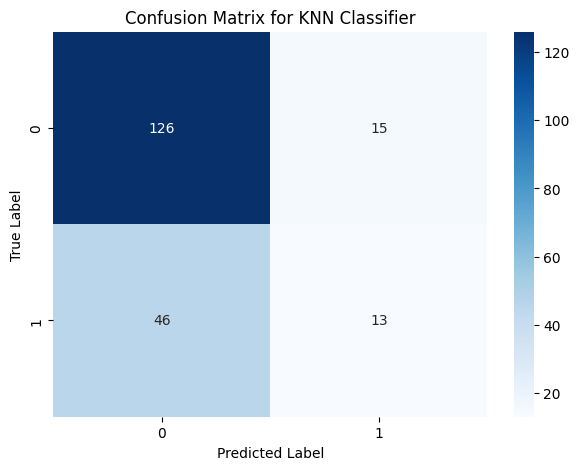

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

k_values = [1, 3, 5, 7, 9, 11, 13] # k values we are going to try to find the best fitting

best_mean_acc = -1
best_k = None
results_knn = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k) #initilize the model
    # Perform 5-fold cross-validation on the training data
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    mean_acc_score = scores.mean()
    print('Validation accuracy for k=', k, ':', mean_acc_score)

    results_knn.append((k, mean_acc_score))

    # if mean validation accuracy is better than best_mean_acc, update best_mean_acc and best_k
    if (best_mean_acc < mean_acc_score):
        best_mean_acc = mean_acc_score
        best_k = k

# Fit the final model with the best k on the full training and validation set,
# and evaluate on the test set
final_model = KNeighborsClassifier(n_neighbors=best_k)

# Combine the training and validation sets for final model training
X_test_full = pd.concat([X_test, X_val])
y_test_full = pd.concat([y_test, y_val])

final_model.fit(X_train, y_train)

final_y_pred = final_model.predict(X_test_full)
final_acc = accuracy_score(y_test_full, final_y_pred)

print('Best mean validation accuracy (', best_mean_acc, ') is achieved with k=', best_k)
print('The final model accuracy on test set is: ', final_acc)

cm = confusion_matrix(y_test_full, final_y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###**DECISION TREES STARTS!!!!!**

Validation accuracy for depth= 1  and min leaf= 1 : 0.69375
Validation accuracy for depth= 1  and min leaf= 2 : 0.69375
Validation accuracy for depth= 1  and min leaf= 3 : 0.69375
Validation accuracy for depth= 1  and min leaf= 4 : 0.69375
Validation accuracy for depth= 1  and min leaf= 5 : 0.69375
Validation accuracy for depth= 1  and min leaf= 6 : 0.69375
Validation accuracy for depth= 1  and min leaf= 7 : 0.69375
Validation accuracy for depth= 1  and min leaf= 8 : 0.69375
Validation accuracy for depth= 1  and min leaf= 9 : 0.69375
Validation accuracy for depth= 1  and min leaf= 10 : 0.69375
Validation accuracy for depth= 1  and min leaf= 11 : 0.69375
Validation accuracy for depth= 1  and min leaf= 12 : 0.69375
Validation accuracy for depth= 1  and min leaf= 13 : 0.69375
Validation accuracy for depth= 1  and min leaf= 14 : 0.69375
Validation accuracy for depth= 1  and min leaf= 15 : 0.69375
Validation accuracy for depth= 1  and min leaf= 16 : 0.69375
Validation accuracy for depth= 1 

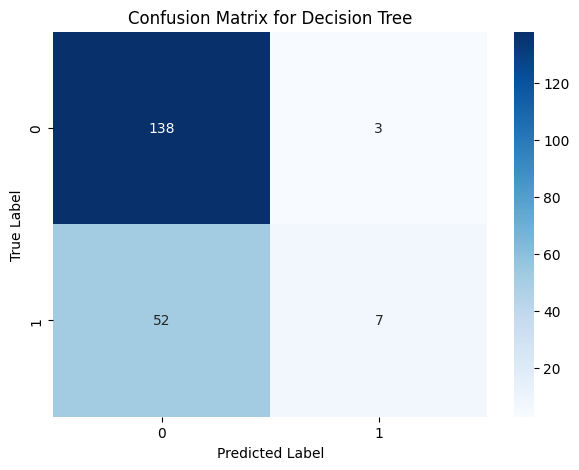

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_test_full = pd.concat([X_test, X_val])
y_test_full = pd.concat([y_test, y_val])

#Hyper parameters:
max_depth = list(range(1,30))
min_leaf = list(range(1,100))

best_mean_acc = -1
best_depth = None
best_leaves = None
results_tree = []

for depth in max_depth:
  for leaf in min_leaf:
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf) #initilize the model

    # Perform 5-fold cross-validation on the training data
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

    mean_acc_score = scores.mean()
    print('Validation accuracy for depth=', depth," and min leaf=", leaf, ':', mean_acc_score)

    results_tree.append((depth, leaf, mean_acc_score))

    # if mean validation accuracy is better than best_mean_acc, update best_mean_acc and hyperparameters
    if (best_mean_acc < mean_acc_score):
        best_mean_acc = mean_acc_score
        best_depth = depth
        best_leaves = leaf

# Fit the final model with the best k on the full training set and evaluate on the validation set
tree_model = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_leaves)
tree_model.fit(X_train, y_train)
tree_model_pred = tree_model.predict(X_test_full)
final_val_acc = accuracy_score(y_test_full, tree_model_pred)

print('Best mean validation accuracy (', best_mean_acc, ') is achieved with max depth=', best_depth, " and min leaf=", best_leaves)
print('The final model accuracy on validation set is: ', final_val_acc)

cm = confusion_matrix(y_test_full, tree_model_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###**MULTILAYER PERCEPTRON!!!!!!!!!**

Iteration 1, loss = 0.61616344
Iteration 2, loss = 0.61047446
Iteration 3, loss = 0.60478519
Iteration 4, loss = 0.60040729
Iteration 5, loss = 0.59683886
Iteration 6, loss = 0.59352251
Iteration 7, loss = 0.59032056
Iteration 8, loss = 0.58709569
Iteration 9, loss = 0.58414076
Iteration 10, loss = 0.58165635
Iteration 11, loss = 0.57911060
Iteration 12, loss = 0.57790214
Iteration 13, loss = 0.57579006
Iteration 14, loss = 0.57293731
Iteration 15, loss = 0.56984478
Iteration 16, loss = 0.56633085
Iteration 17, loss = 0.56403178
Iteration 18, loss = 0.56081149
Iteration 19, loss = 0.55656498
Iteration 20, loss = 0.55483738
Iteration 21, loss = 0.55165056
Iteration 22, loss = 0.55122710
Iteration 23, loss = 0.54983455
Iteration 24, loss = 0.54824201
Iteration 25, loss = 0.54789085
Iteration 26, loss = 0.54627285
Iteration 27, loss = 0.54523166
Iteration 28, loss = 0.54485553
Iteration 29, loss = 0.54476942
Iteration 30, loss = 0.54341941
Iteration 31, loss = 0.54275300
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.56767019
Iteration 12, loss = 0.56484322
Iteration 13, loss = 0.55949772
Iteration 14, loss = 0.55649967
Iteration 15, loss = 0.55290617
Iteration 16, loss = 0.54970478
Iteration 17, loss = 0.54607332
Iteration 18, loss = 0.54403178
Iteration 19, loss = 0.54132068
Iteration 20, loss = 0.53854210
Iteration 21, loss = 0.53710357
Iteration 22, loss = 0.53429746
Iteration 23, loss = 0.53375008
Iteration 24, loss = 0.53094852
Iteration 25, loss = 0.52965028
Iteration 26, loss = 0.52815839
Iteration 27, loss = 0.52688496
Iteration 28, loss = 0.52553353
Iteration 29, loss = 0.52394223
Iteration 30, loss = 0.52356500
Iteration 31, loss = 0.52294680
Iteration 32, loss = 0.52183150
Iteration 33, loss = 0.52255860
Iteration 34, loss = 0.52142071
Iteration 35, loss = 0.52125496
Iteration 36, loss = 0.52111537
Iteration 37, loss = 0.52026383
Iteration 38, loss = 0.52045544
Iteration 39, loss = 0.52091092
Iteration 40, loss = 0.52008196
Iteration 41, loss = 0.51990365
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.52665690
Iteration 43, loss = 0.52605307
Iteration 44, loss = 0.52585806
Iteration 45, loss = 0.52614887
Iteration 46, loss = 0.52391730
Iteration 47, loss = 0.52342006
Iteration 48, loss = 0.52281511
Iteration 49, loss = 0.52151818
Iteration 50, loss = 0.52013343
Iteration 51, loss = 0.52039141
Iteration 52, loss = 0.52155114
Iteration 53, loss = 0.51973222
Iteration 54, loss = 0.51937204
Iteration 55, loss = 0.52073481
Iteration 56, loss = 0.52026603
Iteration 57, loss = 0.51854102
Iteration 58, loss = 0.51726925
Iteration 59, loss = 0.51684776
Iteration 60, loss = 0.51709917
Iteration 61, loss = 0.51740898
Iteration 62, loss = 0.51849608
Iteration 63, loss = 0.51816904
Iteration 64, loss = 0.51797494
Iteration 65, loss = 0.51884720
Iteration 66, loss = 0.51748484
Iteration 67, loss = 0.51679103
Iteration 68, loss = 0.51567568
Iteration 69, loss = 0.51513003
Iteration 70, loss = 0.51663152
Iteration 71, loss = 0.51592509
Iteration 72, loss = 0.51354275
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.51504503
Iteration 54, loss = 0.51481022
Iteration 55, loss = 0.51387321
Iteration 56, loss = 0.51488602
Iteration 57, loss = 0.51372919
Iteration 58, loss = 0.51402763
Iteration 59, loss = 0.51448928
Iteration 60, loss = 0.51337426
Iteration 61, loss = 0.51427479
Iteration 62, loss = 0.51474731
Iteration 63, loss = 0.51357626
Iteration 64, loss = 0.51252725
Iteration 65, loss = 0.51231619
Iteration 66, loss = 0.51255882
Iteration 67, loss = 0.51204635
Iteration 68, loss = 0.51242474
Iteration 69, loss = 0.51219609
Iteration 70, loss = 0.51366912
Iteration 71, loss = 0.51423931
Iteration 72, loss = 0.51245169
Iteration 73, loss = 0.51357885
Iteration 74, loss = 0.51272285
Iteration 75, loss = 0.51279332
Iteration 76, loss = 0.51178815
Iteration 77, loss = 0.51023404
Iteration 78, loss = 0.51053386
Iteration 79, loss = 0.51100373
Iteration 80, loss = 0.50993851
Iteration 81, loss = 0.50974919
Iteration 82, loss = 0.50959666
Iteration 83, loss = 0.51106230
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 0.52139367
Iteration 65, loss = 0.52289242
Iteration 66, loss = 0.52192389
Iteration 67, loss = 0.52091656
Iteration 68, loss = 0.52019784
Iteration 69, loss = 0.51985503
Iteration 70, loss = 0.51990398
Iteration 71, loss = 0.52013587
Iteration 72, loss = 0.52161612
Iteration 73, loss = 0.52083912
Iteration 74, loss = 0.51885686
Iteration 75, loss = 0.51883100
Iteration 76, loss = 0.52128410
Iteration 77, loss = 0.52155454
Iteration 78, loss = 0.51890984
Iteration 79, loss = 0.52133313
Iteration 80, loss = 0.51892092
Iteration 81, loss = 0.51817384
Iteration 82, loss = 0.52172643
Iteration 83, loss = 0.52130464
Iteration 84, loss = 0.52020023
Iteration 85, loss = 0.51936990
Iteration 86, loss = 0.51910924
Iteration 87, loss = 0.51918844
Iteration 88, loss = 0.51849875
Iteration 89, loss = 0.51964345
Iteration 90, loss = 0.51967115
Iteration 91, loss = 0.51912139
Iteration 92, loss = 0.51886701
Training loss did not improve more than tol=0.000100 for 10 consecutive 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.76691485
Iteration 3, loss = 0.65636497
Iteration 4, loss = 0.59577920
Iteration 5, loss = 0.57707171
Iteration 6, loss = 0.56749853
Iteration 7, loss = 0.56265587
Iteration 8, loss = 0.55936371
Iteration 9, loss = 0.55478568
Iteration 10, loss = 0.55004024
Iteration 11, loss = 0.54769876
Iteration 12, loss = 0.54630747
Iteration 13, loss = 0.54357485
Iteration 14, loss = 0.54209368
Iteration 15, loss = 0.54201538
Iteration 16, loss = 0.54178238
Iteration 17, loss = 0.54056641
Iteration 18, loss = 0.53921933
Iteration 19, loss = 0.53823331
Iteration 20, loss = 0.53717933
Iteration 21, loss = 0.53771539
Iteration 22, loss = 0.53632534
Iteration 23, loss = 0.53647887
Iteration 24, loss = 0.53782796
Iteration 25, loss = 0.53758771
Iteration 26, loss = 0.53530753
Iteration 27, loss = 0.53393838
Iteration 28, loss = 0.53190523
Iteration 29, loss = 0.53044664
Iteration 30, loss = 0.52968979
Iteration 31, loss = 0.52941003
Iteration 32, loss = 0.52925026
Iteration 33, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.90198656
Iteration 2, loss = 0.76291623
Iteration 3, loss = 0.65742388
Iteration 4, loss = 0.60221160
Iteration 5, loss = 0.58317327
Iteration 6, loss = 0.57433136
Iteration 7, loss = 0.56872138
Iteration 8, loss = 0.56549704
Iteration 9, loss = 0.56136635
Iteration 10, loss = 0.55708719
Iteration 11, loss = 0.55448963
Iteration 12, loss = 0.55290078
Iteration 13, loss = 0.55099528
Iteration 14, loss = 0.54931756
Iteration 15, loss = 0.54756538
Iteration 16, loss = 0.54790434
Iteration 17, loss = 0.54674437
Iteration 18, loss = 0.54610576
Iteration 19, loss = 0.54541517
Iteration 20, loss = 0.54421269
Iteration 21, loss = 0.54342487
Iteration 22, loss = 0.54277383
Iteration 23, loss = 0.54073149
Iteration 24, loss = 0.53939535
Iteration 25, loss = 0.53830286
Iteration 26, loss = 0.53745869
Iteration 27, loss = 0.53549679
Iteration 28, loss = 0.53399954
Iteration 29, loss = 0.53321457
Iteration 30, loss = 0.53192810
Iteration 31, loss = 0.53203935
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.84283593
Iteration 2, loss = 0.67832748
Iteration 3, loss = 0.61850827
Iteration 4, loss = 0.60382734
Iteration 5, loss = 0.59477653
Iteration 6, loss = 0.59056898
Iteration 7, loss = 0.58162134
Iteration 8, loss = 0.57169835
Iteration 9, loss = 0.56715602
Iteration 10, loss = 0.56250128
Iteration 11, loss = 0.56056030
Iteration 12, loss = 0.55803894
Iteration 13, loss = 0.55555691
Iteration 14, loss = 0.55356033
Iteration 15, loss = 0.54894640
Iteration 16, loss = 0.54914943
Iteration 17, loss = 0.54874113
Iteration 18, loss = 0.54701632
Iteration 19, loss = 0.54482747
Iteration 20, loss = 0.54364637
Iteration 21, loss = 0.54290350
Iteration 22, loss = 0.54365119
Iteration 23, loss = 0.54035673
Iteration 24, loss = 0.53845438
Iteration 25, loss = 0.53723289
Iteration 26, loss = 0.53636142
Iteration 27, loss = 0.53484490
Iteration 28, loss = 0.53512642
Iteration 29, loss = 0.53544812
Iteration 30, loss = 0.53257999
Iteration 31, loss = 0.53591516
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.84211562
Iteration 2, loss = 0.67390273
Iteration 3, loss = 0.61479397
Iteration 4, loss = 0.59817770
Iteration 5, loss = 0.58643524
Iteration 6, loss = 0.57940279
Iteration 7, loss = 0.57108334
Iteration 8, loss = 0.56345206
Iteration 9, loss = 0.55760032
Iteration 10, loss = 0.55137476
Iteration 11, loss = 0.54982593
Iteration 12, loss = 0.54759444
Iteration 13, loss = 0.54480473
Iteration 14, loss = 0.54105592
Iteration 15, loss = 0.53799031
Iteration 16, loss = 0.53554759
Iteration 17, loss = 0.53296703
Iteration 18, loss = 0.53051284
Iteration 19, loss = 0.52790683
Iteration 20, loss = 0.52677164
Iteration 21, loss = 0.52485005
Iteration 22, loss = 0.52480127
Iteration 23, loss = 0.52143077
Iteration 24, loss = 0.52039570
Iteration 25, loss = 0.51926551
Iteration 26, loss = 0.51855653
Iteration 27, loss = 0.51683205
Iteration 28, loss = 0.51569551
Iteration 29, loss = 0.51493485
Iteration 30, loss = 0.51421020
Iteration 31, loss = 0.51674064
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.84194648
Iteration 2, loss = 0.66554851
Iteration 3, loss = 0.61225024
Iteration 4, loss = 0.59987886
Iteration 5, loss = 0.59202196
Iteration 6, loss = 0.58325873
Iteration 7, loss = 0.57298718
Iteration 8, loss = 0.56206000
Iteration 9, loss = 0.55315409
Iteration 10, loss = 0.54698521
Iteration 11, loss = 0.54442773
Iteration 12, loss = 0.54226291
Iteration 13, loss = 0.53980072
Iteration 14, loss = 0.53599988
Iteration 15, loss = 0.53313323
Iteration 16, loss = 0.52934416
Iteration 17, loss = 0.52638109
Iteration 18, loss = 0.52580879
Iteration 19, loss = 0.52426243
Iteration 20, loss = 0.52290946
Iteration 21, loss = 0.52268451
Iteration 22, loss = 0.52343882
Iteration 23, loss = 0.52150082
Iteration 24, loss = 0.52105498
Iteration 25, loss = 0.51995877
Iteration 26, loss = 0.51906444
Iteration 27, loss = 0.51760723
Iteration 28, loss = 0.51746923
Iteration 29, loss = 0.51659429
Iteration 30, loss = 0.51628310
Iteration 31, loss = 0.51696056
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.84068350
Iteration 2, loss = 0.66163454
Iteration 3, loss = 0.62089339
Iteration 4, loss = 0.60367884
Iteration 5, loss = 0.59758809
Iteration 6, loss = 0.59053744
Iteration 7, loss = 0.58355859
Iteration 8, loss = 0.57575257
Iteration 9, loss = 0.56752153
Iteration 10, loss = 0.56250510
Iteration 11, loss = 0.55940582
Iteration 12, loss = 0.55725922
Iteration 13, loss = 0.55539372
Iteration 14, loss = 0.55261931
Iteration 15, loss = 0.55125222
Iteration 16, loss = 0.54938656
Iteration 17, loss = 0.54723075
Iteration 18, loss = 0.54611201
Iteration 19, loss = 0.54445852
Iteration 20, loss = 0.54260693
Iteration 21, loss = 0.54191735
Iteration 22, loss = 0.54076356
Iteration 23, loss = 0.54072044
Iteration 24, loss = 0.53816883
Iteration 25, loss = 0.53735542
Iteration 26, loss = 0.53648829
Iteration 27, loss = 0.53660585
Iteration 28, loss = 0.53461130
Iteration 29, loss = 0.53387902
Iteration 30, loss = 0.53469368
Iteration 31, loss = 0.53202572
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.16748585
Iteration 2, loss = 0.68435580
Iteration 3, loss = 0.66513531
Iteration 4, loss = 0.63465831
Iteration 5, loss = 0.59114244
Iteration 6, loss = 0.57003818
Iteration 7, loss = 0.56114980
Iteration 8, loss = 0.55536206
Iteration 9, loss = 0.55068060
Iteration 10, loss = 0.54421841
Iteration 11, loss = 0.53917315
Iteration 12, loss = 0.53756731
Iteration 13, loss = 0.53401793
Iteration 14, loss = 0.53102906
Iteration 15, loss = 0.52923240
Iteration 16, loss = 0.52842161
Iteration 17, loss = 0.52571400
Iteration 18, loss = 0.52352226
Iteration 19, loss = 0.52236147
Iteration 20, loss = 0.52094060
Iteration 21, loss = 0.51926264
Iteration 22, loss = 0.51803912
Iteration 23, loss = 0.51743550
Iteration 24, loss = 0.51611098
Iteration 25, loss = 0.51484374
Iteration 26, loss = 0.51366008
Iteration 27, loss = 0.51252271
Iteration 28, loss = 0.51171310
Iteration 29, loss = 0.51033110
Iteration 30, loss = 0.51004992
Iteration 31, loss = 0.50854952
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.16546862
Iteration 2, loss = 0.68633174
Iteration 3, loss = 0.66932821
Iteration 4, loss = 0.63316451
Iteration 5, loss = 0.58313492
Iteration 6, loss = 0.56010652
Iteration 7, loss = 0.55169390
Iteration 8, loss = 0.54727909
Iteration 9, loss = 0.54056381
Iteration 10, loss = 0.53462264
Iteration 11, loss = 0.53074940
Iteration 12, loss = 0.52810966
Iteration 13, loss = 0.52335327
Iteration 14, loss = 0.51907926
Iteration 15, loss = 0.51620450
Iteration 16, loss = 0.51215303
Iteration 17, loss = 0.50909448
Iteration 18, loss = 0.50678571
Iteration 19, loss = 0.50463134
Iteration 20, loss = 0.50275679
Iteration 21, loss = 0.50193707
Iteration 22, loss = 0.50067535
Iteration 23, loss = 0.49933591
Iteration 24, loss = 0.49650228
Iteration 25, loss = 0.49555558
Iteration 26, loss = 0.49408503
Iteration 27, loss = 0.49212077
Iteration 28, loss = 0.49039763
Iteration 29, loss = 0.49091874
Iteration 30, loss = 0.48948791
Iteration 31, loss = 0.48581534
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 98, loss = 0.45116718
Iteration 99, loss = 0.45147916
Iteration 100, loss = 0.45130028
Iteration 1, loss = 1.16332810
Iteration 2, loss = 0.68618232
Iteration 3, loss = 0.68913900
Iteration 4, loss = 0.65398233
Iteration 5, loss = 0.60390842
Iteration 6, loss = 0.57885852
Iteration 7, loss = 0.57025920
Iteration 8, loss = 0.56663455
Iteration 9, loss = 0.55823330
Iteration 10, loss = 0.55248266
Iteration 11, loss = 0.54848967
Iteration 12, loss = 0.54592930
Iteration 13, loss = 0.54329974
Iteration 14, loss = 0.54033888
Iteration 15, loss = 0.53572275
Iteration 16, loss = 0.53346657
Iteration 17, loss = 0.53074143
Iteration 18, loss = 0.52813994
Iteration 19, loss = 0.52519975
Iteration 20, loss = 0.52278328
Iteration 21, loss = 0.52152420
Iteration 22, loss = 0.52051844
Iteration 23, loss = 0.51838123
Iteration 24, loss = 0.51528032
Iteration 25, loss = 0.51406820
Iteration 26, loss = 0.51326190
Iteration 27, loss = 0.51152712
Iteration 28, loss = 0.50905238
Iteration 29, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, loss = 0.45912885
Iteration 96, loss = 0.45837258
Iteration 97, loss = 0.45821094
Iteration 98, loss = 0.45545213
Iteration 99, loss = 0.45392220
Iteration 100, loss = 0.45374146
Validation accuracy for learning rate= 0.1  and epoaches= 100 and for layer number 6 : 0.6987500000000001
Iteration 1, loss = 0.61616344
Iteration 2, loss = 0.61047446
Iteration 3, loss = 0.60478519
Iteration 4, loss = 0.60040729
Iteration 5, loss = 0.59683886
Iteration 6, loss = 0.59352251
Iteration 7, loss = 0.59032056
Iteration 8, loss = 0.58709569
Iteration 9, loss = 0.58414076
Iteration 10, loss = 0.58165635
Iteration 11, loss = 0.57911060
Iteration 12, loss = 0.57790214
Iteration 13, loss = 0.57579006
Iteration 14, loss = 0.57293731
Iteration 15, loss = 0.56984478
Iteration 16, loss = 0.56633085
Iteration 17, loss = 0.56403178
Iteration 18, loss = 0.56081149
Iteration 19, loss = 0.55656498
Iteration 20, loss = 0.55483738
Iteration 21, loss = 0.55165056
Iteration 22, loss = 0.55122710
Iterat

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 97, loss = 0.53233717
Iteration 98, loss = 0.53477685
Iteration 99, loss = 0.53576123
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61685270
Iteration 2, loss = 0.61073358
Iteration 3, loss = 0.60482747
Iteration 4, loss = 0.60021840
Iteration 5, loss = 0.59678875
Iteration 6, loss = 0.59294638
Iteration 7, loss = 0.58982852
Iteration 8, loss = 0.58727008
Iteration 9, loss = 0.58561090
Iteration 10, loss = 0.58412723
Iteration 11, loss = 0.58439637
Iteration 12, loss = 0.58235275
Iteration 13, loss = 0.58096798
Iteration 14, loss = 0.57891433
Iteration 15, loss = 0.57650903
Iteration 16, loss = 0.57419914
Iteration 17, loss = 0.57181285
Iteration 18, loss = 0.56990192
Iteration 19, loss = 0.56742489
Iteration 20, loss = 0.56484876
Iteration 21, loss = 0.56171823
Iteration 22, loss = 0.55955647
Iteration 23, loss = 0.55886560
Iteration 24, loss = 0.55706339
Iteration 25, loss = 0.55553422
Iteration 26, loss = 0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.90952303
Iteration 2, loss = 0.77155333
Iteration 3, loss = 0.67094423
Iteration 4, loss = 0.62256267
Iteration 5, loss = 0.60199531
Iteration 6, loss = 0.59268166
Iteration 7, loss = 0.58716016
Iteration 8, loss = 0.58316253
Iteration 9, loss = 0.58015802
Iteration 10, loss = 0.57589625
Iteration 11, loss = 0.57238103
Iteration 12, loss = 0.56950780
Iteration 13, loss = 0.56551747
Iteration 14, loss = 0.56266632
Iteration 15, loss = 0.56045276
Iteration 16, loss = 0.55996391
Iteration 17, loss = 0.56033396
Iteration 18, loss = 0.55859220
Iteration 19, loss = 0.55699684
Iteration 20, loss = 0.55853159
Iteration 21, loss = 0.55800404
Iteration 22, loss = 0.55612568
Iteration 23, loss = 0.55443691
Iteration 24, loss = 0.55519688
Iteration 25, loss = 0.55540400
Iteration 26, loss = 0.55363007
Iteration 27, loss = 0.55216340
Iteration 28, loss = 0.55081333
Iteration 29, loss = 0.55203330
Iteration 30, loss = 0.55126833
Iteration 31, loss = 0.55193759
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 9, loss = 0.56715602
Iteration 10, loss = 0.56250128
Iteration 11, loss = 0.56056030
Iteration 12, loss = 0.55803894
Iteration 13, loss = 0.55555691
Iteration 14, loss = 0.55356033
Iteration 15, loss = 0.54894640
Iteration 16, loss = 0.54914943
Iteration 17, loss = 0.54874113
Iteration 18, loss = 0.54701632
Iteration 19, loss = 0.54482747
Iteration 20, loss = 0.54364637
Iteration 21, loss = 0.54290350
Iteration 22, loss = 0.54365119
Iteration 23, loss = 0.54035673
Iteration 24, loss = 0.53845438
Iteration 25, loss = 0.53723289
Iteration 26, loss = 0.53636142
Iteration 27, loss = 0.53484490
Iteration 28, loss = 0.53512642
Iteration 29, loss = 0.53544812
Iteration 30, loss = 0.53257999
Iteration 31, loss = 0.53591516
Iteration 32, loss = 0.53339687
Iteration 33, loss = 0.53051295
Iteration 34, loss = 0.52991251
Iteration 35, loss = 0.52986860
Iteration 36, loss = 0.52797787
Iteration 37, loss = 0.52785962
Iteration 38, loss = 0.52742171
Iteration 39, loss = 0.52639113
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.53296703
Iteration 18, loss = 0.53051284
Iteration 19, loss = 0.52790683
Iteration 20, loss = 0.52677164
Iteration 21, loss = 0.52485005
Iteration 22, loss = 0.52480127
Iteration 23, loss = 0.52143077
Iteration 24, loss = 0.52039570
Iteration 25, loss = 0.51926551
Iteration 26, loss = 0.51855653
Iteration 27, loss = 0.51683205
Iteration 28, loss = 0.51569551
Iteration 29, loss = 0.51493485
Iteration 30, loss = 0.51421020
Iteration 31, loss = 0.51674064
Iteration 32, loss = 0.51260548
Iteration 33, loss = 0.51040642
Iteration 34, loss = 0.50939175
Iteration 35, loss = 0.50888292
Iteration 36, loss = 0.50876223
Iteration 37, loss = 0.50628136
Iteration 38, loss = 0.50496776
Iteration 39, loss = 0.50289192
Iteration 40, loss = 0.50200486
Iteration 41, loss = 0.50190053
Iteration 42, loss = 0.50099544
Iteration 43, loss = 0.50033700
Iteration 44, loss = 0.49990491
Iteration 45, loss = 0.49703635
Iteration 46, loss = 0.49645873
Iteration 47, loss = 0.49625000
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 54, loss = 0.50619348
Iteration 55, loss = 0.50297138
Iteration 56, loss = 0.50363331
Iteration 57, loss = 0.50120507
Iteration 58, loss = 0.50208289
Iteration 59, loss = 0.50219130
Iteration 60, loss = 0.50081060
Iteration 61, loss = 0.50034864
Iteration 62, loss = 0.49877738
Iteration 63, loss = 0.49889385
Iteration 64, loss = 0.49910741
Iteration 65, loss = 0.49653541
Iteration 66, loss = 0.49809058
Iteration 67, loss = 0.49694000
Iteration 68, loss = 0.49540907
Iteration 69, loss = 0.49503097
Iteration 70, loss = 0.49322977
Iteration 71, loss = 0.49398712
Iteration 72, loss = 0.49298884
Iteration 73, loss = 0.49221089
Iteration 74, loss = 0.49056898
Iteration 75, loss = 0.49090439
Iteration 76, loss = 0.49178349
Iteration 77, loss = 0.48995355
Iteration 78, loss = 0.48955926
Iteration 79, loss = 0.49071445
Iteration 80, loss = 0.48789645
Iteration 81, loss = 0.49334601
Iteration 82, loss = 0.48766543
Iteration 83, loss = 0.49117912
Iteration 84, loss = 0.49090990
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 0.49726227
Iteration 65, loss = 0.49574820
Iteration 66, loss = 0.49597583
Iteration 67, loss = 0.49666907
Iteration 68, loss = 0.49781259
Iteration 69, loss = 0.49598924
Iteration 70, loss = 0.49504260
Iteration 71, loss = 0.49511654
Iteration 72, loss = 0.49587326
Iteration 73, loss = 0.49325396
Iteration 74, loss = 0.49171675
Iteration 75, loss = 0.49379349
Iteration 76, loss = 0.49232947
Iteration 77, loss = 0.49154613
Iteration 78, loss = 0.48956218
Iteration 79, loss = 0.49085117
Iteration 80, loss = 0.48951285
Iteration 81, loss = 0.48964164
Iteration 82, loss = 0.48776003
Iteration 83, loss = 0.48866045
Iteration 84, loss = 0.48743867
Iteration 85, loss = 0.48959427
Iteration 86, loss = 0.48893899
Iteration 87, loss = 0.48581596
Iteration 88, loss = 0.48958197
Iteration 89, loss = 0.48734166
Iteration 90, loss = 0.48549654
Iteration 91, loss = 0.48475242
Iteration 92, loss = 0.48860945
Iteration 93, loss = 0.48724563
Iteration 94, loss = 0.48767697
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, loss = 0.45595838
Iteration 86, loss = 0.45507863
Iteration 87, loss = 0.45255795
Iteration 88, loss = 0.45389850
Iteration 89, loss = 0.45556347
Iteration 90, loss = 0.45402081
Iteration 91, loss = 0.45350112
Iteration 92, loss = 0.45323924
Iteration 93, loss = 0.45354713
Iteration 94, loss = 0.45469343
Iteration 95, loss = 0.45434926
Iteration 96, loss = 0.45160621
Iteration 97, loss = 0.45766711
Iteration 98, loss = 0.45407384
Iteration 99, loss = 0.45107557
Iteration 100, loss = 0.45150522
Iteration 101, loss = 0.45337602
Iteration 102, loss = 0.45051003
Iteration 103, loss = 0.45141026
Iteration 104, loss = 0.45372546
Iteration 105, loss = 0.45051399
Iteration 106, loss = 0.45271310
Iteration 107, loss = 0.45451704
Iteration 108, loss = 0.45499414
Iteration 109, loss = 0.45433798
Iteration 110, loss = 0.45173734
Iteration 111, loss = 0.45229799
Iteration 112, loss = 0.45241619
Iteration 113, loss = 0.44668247
Iteration 114, loss = 0.45128533
Iteration 115, loss = 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 75, loss = 0.47350687
Iteration 76, loss = 0.47030472
Iteration 77, loss = 0.46734921
Iteration 78, loss = 0.46952657
Iteration 79, loss = 0.47024198
Iteration 80, loss = 0.46871231
Iteration 81, loss = 0.46987299
Iteration 82, loss = 0.46711412
Iteration 83, loss = 0.46694432
Iteration 84, loss = 0.46505605
Iteration 85, loss = 0.46497067
Iteration 86, loss = 0.46634769
Iteration 87, loss = 0.46120770
Iteration 88, loss = 0.46237763
Iteration 89, loss = 0.46308429
Iteration 90, loss = 0.46505227
Iteration 91, loss = 0.46288208
Iteration 92, loss = 0.45916148
Iteration 93, loss = 0.45643054
Iteration 94, loss = 0.45848188
Iteration 95, loss = 0.45912885
Iteration 96, loss = 0.45837258
Iteration 97, loss = 0.45821094
Iteration 98, loss = 0.45545213
Iteration 99, loss = 0.45392220
Iteration 100, loss = 0.45374146
Iteration 101, loss = 0.45642120
Iteration 102, loss = 0.45451473
Iteration 103, loss = 0.45299290
Iteration 104, loss = 0.45309323
Iteration 105, loss = 0.45222596
It

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Iteration 79, loss = 0.50981380
Iteration 80, loss = 0.51025917
Iteration 81, loss = 0.51557245
Iteration 82, loss = 0.51404262
Iteration 83, loss = 0.50811045
Iteration 84, loss = 0.51117944
Iteration 85, loss = 0.51408823
Iteration 86, loss = 0.50714546
Iteration 87, loss = 0.50648920
Iteration 88, loss = 0.50683883
Iteration 89, loss = 0.50483630
Iteration 90, loss = 0.50519714
Iteration 91, loss = 0.50637432
Iteration 92, loss = 0.50509134
Iteration 93, loss = 0.50572160
Iteration 94, loss = 0.50471110
Iteration 95, loss = 0.50551280
Iteration 96, loss = 0.50375059
Iteration 97, loss = 0.50444488
Iteration 98, loss = 0.50495500
Iteration 99, loss = 0.50372446
Iteration 100, loss = 0.50397249
Iteration 101, loss = 0.50584103
Iteration 102, loss = 0.50538688
Iteration 103, loss = 0.50533859
Iteration 104, loss = 0.50522541
Iteration 105, loss = 0.50313477
Iteration 106, loss = 0.50375229
Iteration 107, loss = 0.50157035
Iteration 108, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.58587111
Iteration 56, loss = 0.58563655
Iteration 57, loss = 0.58540147
Iteration 58, loss = 0.58515985
Iteration 59, loss = 0.58495083
Iteration 60, loss = 0.58467493
Iteration 61, loss = 0.58436402
Iteration 62, loss = 0.58419131
Iteration 63, loss = 0.58386634
Iteration 64, loss = 0.58367166
Iteration 65, loss = 0.58340516
Iteration 66, loss = 0.58311369
Iteration 67, loss = 0.58294822
Iteration 68, loss = 0.58272389
Iteration 69, loss = 0.58248177
Iteration 70, loss = 0.58222376
Iteration 71, loss = 0.58199437
Iteration 72, loss = 0.58183608
Iteration 73, loss = 0.58158739
Iteration 74, loss = 0.58128332
Iteration 75, loss = 0.58109528
Iteration 76, loss = 0.58079797
Iteration 77, loss = 0.58055032
Iteration 78, loss = 0.58038713
Iteration 79, loss = 0.58011096
Iteration 80, loss = 0.57987169
Iteration 81, loss = 0.57960002
Iteration 82, loss = 0.57928697
Iteration 83, loss = 0.57902631
Iteration 84, loss = 0.57873116
Iteration 85, loss = 0.57846126
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.58762289
Iteration 56, loss = 0.58712541
Iteration 57, loss = 0.58666104
Iteration 58, loss = 0.58615629
Iteration 59, loss = 0.58561809
Iteration 60, loss = 0.58512577
Iteration 61, loss = 0.58466198
Iteration 62, loss = 0.58411778
Iteration 63, loss = 0.58359615
Iteration 64, loss = 0.58300139
Iteration 65, loss = 0.58244389
Iteration 66, loss = 0.58190597
Iteration 67, loss = 0.58141029
Iteration 68, loss = 0.58085057
Iteration 69, loss = 0.58035273
Iteration 70, loss = 0.57970416
Iteration 71, loss = 0.57915712
Iteration 72, loss = 0.57860550
Iteration 73, loss = 0.57797929
Iteration 74, loss = 0.57738233
Iteration 75, loss = 0.57704390
Iteration 76, loss = 0.57639729
Iteration 77, loss = 0.57581682
Iteration 78, loss = 0.57543752
Iteration 79, loss = 0.57485995
Iteration 80, loss = 0.57445793
Iteration 81, loss = 0.57398971
Iteration 82, loss = 0.57361636
Iteration 83, loss = 0.57318059
Iteration 84, loss = 0.57282423
Iteration 85, loss = 0.57252176
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.58997606
Iteration 62, loss = 0.58954634
Iteration 63, loss = 0.58924779
Iteration 64, loss = 0.58890475
Iteration 65, loss = 0.58864831
Iteration 66, loss = 0.58836352
Iteration 67, loss = 0.58815782
Iteration 68, loss = 0.58783305
Iteration 69, loss = 0.58756811
Iteration 70, loss = 0.58721380
Iteration 71, loss = 0.58694958
Iteration 72, loss = 0.58664618
Iteration 73, loss = 0.58633497
Iteration 74, loss = 0.58601464
Iteration 75, loss = 0.58576382
Iteration 76, loss = 0.58549933
Iteration 77, loss = 0.58529067
Iteration 78, loss = 0.58500034
Iteration 79, loss = 0.58465738
Iteration 80, loss = 0.58453297
Iteration 81, loss = 0.58413051
Iteration 82, loss = 0.58400797
Iteration 83, loss = 0.58362854
Iteration 84, loss = 0.58342692
Iteration 85, loss = 0.58325088
Iteration 86, loss = 0.58308466
Iteration 87, loss = 0.58297834
Iteration 88, loss = 0.58282060
Iteration 89, loss = 0.58260746
Iteration 90, loss = 0.58236208
Iteration 91, loss = 0.58209636
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 0.54945093
Iteration 73, loss = 0.54910117
Iteration 74, loss = 0.54861316
Iteration 75, loss = 0.54822427
Iteration 76, loss = 0.54796648
Iteration 77, loss = 0.54761925
Iteration 78, loss = 0.54726992
Iteration 79, loss = 0.54702011
Iteration 80, loss = 0.54682356
Iteration 81, loss = 0.54654362
Iteration 82, loss = 0.54640230
Iteration 83, loss = 0.54610336
Iteration 84, loss = 0.54585375
Iteration 85, loss = 0.54554325
Iteration 86, loss = 0.54522963
Iteration 87, loss = 0.54487368
Iteration 88, loss = 0.54453649
Iteration 89, loss = 0.54424273
Iteration 90, loss = 0.54393287
Iteration 91, loss = 0.54370091
Iteration 92, loss = 0.54354063
Iteration 93, loss = 0.54315551
Iteration 94, loss = 0.54284090
Iteration 95, loss = 0.54260775
Iteration 96, loss = 0.54226539
Iteration 97, loss = 0.54218460
Iteration 98, loss = 0.54188639
Iteration 99, loss = 0.54171213
Iteration 100, loss = 0.54137443
Iteration 1, loss = 0.86511432
Iteration 2, loss = 0.83659966
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.55233845
Iteration 83, loss = 0.55204456
Iteration 84, loss = 0.55171987
Iteration 85, loss = 0.55152066
Iteration 86, loss = 0.55125547
Iteration 87, loss = 0.55102926
Iteration 88, loss = 0.55078327
Iteration 89, loss = 0.55049191
Iteration 90, loss = 0.55022934
Iteration 91, loss = 0.55002248
Iteration 92, loss = 0.54970664
Iteration 93, loss = 0.54939765
Iteration 94, loss = 0.54915329
Iteration 95, loss = 0.54878256
Iteration 96, loss = 0.54848819
Iteration 97, loss = 0.54816994
Iteration 98, loss = 0.54797776
Iteration 99, loss = 0.54764892
Iteration 100, loss = 0.54741962
Iteration 1, loss = 0.84006331
Iteration 2, loss = 0.81376413
Iteration 3, loss = 0.77923652
Iteration 4, loss = 0.74192691
Iteration 5, loss = 0.71081488
Iteration 6, loss = 0.68542628
Iteration 7, loss = 0.66332206
Iteration 8, loss = 0.64635824
Iteration 9, loss = 0.63430855
Iteration 10, loss = 0.62333389
Iteration 11, loss = 0.61592732
Iteration 12, loss = 0.61059120
Iteration 13, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.55639916
Iteration 85, loss = 0.55622890
Iteration 86, loss = 0.55600852
Iteration 87, loss = 0.55583013
Iteration 88, loss = 0.55565230
Iteration 89, loss = 0.55543481
Iteration 90, loss = 0.55528561
Iteration 91, loss = 0.55506069
Iteration 92, loss = 0.55477530
Iteration 93, loss = 0.55451576
Iteration 94, loss = 0.55430681
Iteration 95, loss = 0.55400776
Iteration 96, loss = 0.55369259
Iteration 97, loss = 0.55338130
Iteration 98, loss = 0.55315037
Iteration 99, loss = 0.55291589
Iteration 100, loss = 0.55264640
Validation accuracy for learning rate= 0.01  and epoaches= 100 and for layer number 3 : 0.6987500000000001
Iteration 1, loss = 0.92540177
Iteration 2, loss = 0.90606988
Iteration 3, loss = 0.87636521
Iteration 4, loss = 0.84453499
Iteration 5, loss = 0.81069894
Iteration 6, loss = 0.78049825
Iteration 7, loss = 0.75458834
Iteration 8, loss = 0.73221444
Iteration 9, loss = 0.71299243
Iteration 10, loss = 0.69629293
Iteration 11, loss = 0.68190019
Itera

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, loss = 0.54705013
Iteration 84, loss = 0.54689619
Iteration 85, loss = 0.54652246
Iteration 86, loss = 0.54618831
Iteration 87, loss = 0.54586111
Iteration 88, loss = 0.54563663
Iteration 89, loss = 0.54532937
Iteration 90, loss = 0.54516871
Iteration 91, loss = 0.54484111
Iteration 92, loss = 0.54457027
Iteration 93, loss = 0.54439667
Iteration 94, loss = 0.54405331
Iteration 95, loss = 0.54382871
Iteration 96, loss = 0.54356907
Iteration 97, loss = 0.54331510
Iteration 98, loss = 0.54317759
Iteration 99, loss = 0.54304768
Iteration 100, loss = 0.54279147
Iteration 1, loss = 0.93166195
Iteration 2, loss = 0.91234492
Iteration 3, loss = 0.88372313
Iteration 4, loss = 0.84961251
Iteration 5, loss = 0.81641210
Iteration 6, loss = 0.78527885
Iteration 7, loss = 0.75872117
Iteration 8, loss = 0.73530918
Iteration 9, loss = 0.71535645
Iteration 10, loss = 0.69760505
Iteration 11, loss = 0.68188671
Iteration 12, loss = 0.66752288
Iteration 13, loss = 0.65465085
Iteration 14, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, loss = 0.54921401
Iteration 86, loss = 0.54901825
Iteration 87, loss = 0.54890758
Iteration 88, loss = 0.54882581
Iteration 89, loss = 0.54877306
Iteration 90, loss = 0.54856873
Iteration 91, loss = 0.54851207
Iteration 92, loss = 0.54835563
Iteration 93, loss = 0.54816557
Iteration 94, loss = 0.54804833
Iteration 95, loss = 0.54792993
Iteration 96, loss = 0.54784983
Iteration 97, loss = 0.54774266
Iteration 98, loss = 0.54772164
Iteration 99, loss = 0.54760421
Iteration 100, loss = 0.54742928
Iteration 1, loss = 0.93650373
Iteration 2, loss = 0.91614372
Iteration 3, loss = 0.88631046
Iteration 4, loss = 0.85327913
Iteration 5, loss = 0.82138194
Iteration 6, loss = 0.79229617
Iteration 7, loss = 0.76753456
Iteration 8, loss = 0.74573124
Iteration 9, loss = 0.72648054
Iteration 10, loss = 0.71056910
Iteration 11, loss = 0.69588855
Iteration 12, loss = 0.68427106
Iteration 13, loss = 0.67305324
Iteration 14, loss = 0.66346976
Iteration 15, loss = 0.65484224
Iteration 16, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 90, loss = 0.55740669
Iteration 91, loss = 0.55726678
Iteration 92, loss = 0.55707046
Iteration 93, loss = 0.55675904
Iteration 94, loss = 0.55659666
Iteration 95, loss = 0.55647031
Iteration 96, loss = 0.55623035
Iteration 97, loss = 0.55605166
Iteration 98, loss = 0.55588317
Iteration 99, loss = 0.55568320
Iteration 100, loss = 0.55547851
Validation accuracy for learning rate= 0.01  and epoaches= 100 and for layer number 4 : 0.7025
Iteration 1, loss = 0.88336594
Iteration 2, loss = 0.85371585
Iteration 3, loss = 0.81114998
Iteration 4, loss = 0.76878568
Iteration 5, loss = 0.72891304
Iteration 6, loss = 0.69812822
Iteration 7, loss = 0.67784648
Iteration 8, loss = 0.65873975
Iteration 9, loss = 0.64585588
Iteration 10, loss = 0.63646662
Iteration 11, loss = 0.62908658
Iteration 12, loss = 0.62375837
Iteration 13, loss = 0.61915746
Iteration 14, loss = 0.61496245
Iteration 15, loss = 0.61163021
Iteration 16, loss = 0.60865001
Iteration 17, loss = 0.60613154
Iteration 18, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 97, loss = 0.53367372
Iteration 98, loss = 0.53342543
Iteration 99, loss = 0.53312309
Iteration 100, loss = 0.53285196
Iteration 1, loss = 0.88505012
Iteration 2, loss = 0.85225471
Iteration 3, loss = 0.80692705
Iteration 4, loss = 0.76187066
Iteration 5, loss = 0.72125962
Iteration 6, loss = 0.69001636
Iteration 7, loss = 0.66839879
Iteration 8, loss = 0.65016370
Iteration 9, loss = 0.63775462
Iteration 10, loss = 0.62892995
Iteration 11, loss = 0.62138454
Iteration 12, loss = 0.61613777
Iteration 13, loss = 0.61152308
Iteration 14, loss = 0.60716429
Iteration 15, loss = 0.60391754
Iteration 16, loss = 0.60054268
Iteration 17, loss = 0.59793934
Iteration 18, loss = 0.59555825
Iteration 19, loss = 0.59346251
Iteration 20, loss = 0.59155139
Iteration 21, loss = 0.58951223
Iteration 22, loss = 0.58759183
Iteration 23, loss = 0.58570953
Iteration 24, loss = 0.58384280
Iteration 25, loss = 0.58210152
Iteration 26, loss = 0.58016830
Iteration 27, loss = 0.57837726
Iteration 28, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.54586308
Iteration 85, loss = 0.54531629
Iteration 86, loss = 0.54479784
Iteration 87, loss = 0.54431345
Iteration 88, loss = 0.54395825
Iteration 89, loss = 0.54347640
Iteration 90, loss = 0.54309495
Iteration 91, loss = 0.54277762
Iteration 92, loss = 0.54228906
Iteration 93, loss = 0.54182477
Iteration 94, loss = 0.54136635
Iteration 95, loss = 0.54103392
Iteration 96, loss = 0.54055500
Iteration 97, loss = 0.54020524
Iteration 98, loss = 0.53990612
Iteration 99, loss = 0.53946956
Iteration 100, loss = 0.53922342
Iteration 1, loss = 0.88420876
Iteration 2, loss = 0.85029778
Iteration 3, loss = 0.80666346
Iteration 4, loss = 0.76251740
Iteration 5, loss = 0.72239930
Iteration 6, loss = 0.69102003
Iteration 7, loss = 0.66914065
Iteration 8, loss = 0.65366285
Iteration 9, loss = 0.64129681
Iteration 10, loss = 0.63364634
Iteration 11, loss = 0.62684979
Iteration 12, loss = 0.62195144
Iteration 13, loss = 0.61783002
Iteration 14, loss = 0.61387722
Iteration 15, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.55103820
Iteration 85, loss = 0.55075821
Iteration 86, loss = 0.55045633
Iteration 87, loss = 0.55023268
Iteration 88, loss = 0.55010605
Iteration 89, loss = 0.54982742
Iteration 90, loss = 0.54971483
Iteration 91, loss = 0.54972757
Iteration 92, loss = 0.54939568
Iteration 93, loss = 0.54898982
Iteration 94, loss = 0.54881902
Iteration 95, loss = 0.54858255
Iteration 96, loss = 0.54831362
Iteration 97, loss = 0.54811557
Iteration 98, loss = 0.54799809
Iteration 99, loss = 0.54778299
Iteration 100, loss = 0.54765785
Validation accuracy for learning rate= 0.01  and epoaches= 100 and for layer number 5 : 0.7025
Iteration 1, loss = 1.36577264
Iteration 2, loss = 1.21631564
Iteration 3, loss = 1.02778964
Iteration 4, loss = 0.86161348
Iteration 5, loss = 0.75517608
Iteration 6, loss = 0.69677016
Iteration 7, loss = 0.67054166
Iteration 8, loss = 0.65696349
Iteration 9, loss = 0.64924227
Iteration 10, loss = 0.64200040
Iteration 11, loss = 0.63502000
Iteration 12, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 80, loss = 0.53433061
Iteration 81, loss = 0.53404424
Iteration 82, loss = 0.53369755
Iteration 83, loss = 0.53324430
Iteration 84, loss = 0.53294977
Iteration 85, loss = 0.53250768
Iteration 86, loss = 0.53216655
Iteration 87, loss = 0.53175103
Iteration 88, loss = 0.53142669
Iteration 89, loss = 0.53126093
Iteration 90, loss = 0.53081181
Iteration 91, loss = 0.53051382
Iteration 92, loss = 0.53014209
Iteration 93, loss = 0.52983351
Iteration 94, loss = 0.52955779
Iteration 95, loss = 0.52924251
Iteration 96, loss = 0.52894063
Iteration 97, loss = 0.52859632
Iteration 98, loss = 0.52836618
Iteration 99, loss = 0.52816789
Iteration 100, loss = 0.52777562
Iteration 1, loss = 1.35514429
Iteration 2, loss = 1.20785553
Iteration 3, loss = 1.02088892
Iteration 4, loss = 0.85738136
Iteration 5, loss = 0.75279440
Iteration 6, loss = 0.69511781
Iteration 7, loss = 0.66830518
Iteration 8, loss = 0.65594188
Iteration 9, loss = 0.64756070
Iteration 10, loss = 0.63958029
Iteration 11, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, loss = 0.53026639
Iteration 78, loss = 0.52987296
Iteration 79, loss = 0.52957369
Iteration 80, loss = 0.52923171
Iteration 81, loss = 0.52877918
Iteration 82, loss = 0.52845922
Iteration 83, loss = 0.52806888
Iteration 84, loss = 0.52770694
Iteration 85, loss = 0.52724198
Iteration 86, loss = 0.52678667
Iteration 87, loss = 0.52638671
Iteration 88, loss = 0.52591062
Iteration 89, loss = 0.52570284
Iteration 90, loss = 0.52524291
Iteration 91, loss = 0.52484179
Iteration 92, loss = 0.52438492
Iteration 93, loss = 0.52405214
Iteration 94, loss = 0.52381102
Iteration 95, loss = 0.52339081
Iteration 96, loss = 0.52297938
Iteration 97, loss = 0.52261205
Iteration 98, loss = 0.52217822
Iteration 99, loss = 0.52179697
Iteration 100, loss = 0.52129746
Iteration 1, loss = 1.35569250
Iteration 2, loss = 1.20977855
Iteration 3, loss = 1.02421468
Iteration 4, loss = 0.86114766
Iteration 5, loss = 0.75352175
Iteration 6, loss = 0.69589482
Iteration 7, loss = 0.66854088
Iteration 8, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, loss = 0.51646968
Iteration 77, loss = 0.51623903
Iteration 78, loss = 0.51580940
Iteration 79, loss = 0.51535095
Iteration 80, loss = 0.51513440
Iteration 81, loss = 0.51460954
Iteration 82, loss = 0.51437374
Iteration 83, loss = 0.51399374
Iteration 84, loss = 0.51366061
Iteration 85, loss = 0.51329859
Iteration 86, loss = 0.51284274
Iteration 87, loss = 0.51240931
Iteration 88, loss = 0.51200998
Iteration 89, loss = 0.51163393
Iteration 90, loss = 0.51123178
Iteration 91, loss = 0.51078401
Iteration 92, loss = 0.51037211
Iteration 93, loss = 0.51000532
Iteration 94, loss = 0.50948955
Iteration 95, loss = 0.50923813
Iteration 96, loss = 0.50879173
Iteration 97, loss = 0.50827459
Iteration 98, loss = 0.50788042
Iteration 99, loss = 0.50765154
Iteration 100, loss = 0.50721205
Iteration 1, loss = 1.36723929
Iteration 2, loss = 1.21905982
Iteration 3, loss = 1.03107889
Iteration 4, loss = 0.86195746
Iteration 5, loss = 0.75246019
Iteration 6, loss = 0.69773006
Iteration 7, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 0.52543617
Iteration 82, loss = 0.52503550
Iteration 83, loss = 0.52449942
Iteration 84, loss = 0.52396905
Iteration 85, loss = 0.52358350
Iteration 86, loss = 0.52302113
Iteration 87, loss = 0.52252843
Iteration 88, loss = 0.52205340
Iteration 89, loss = 0.52165514
Iteration 90, loss = 0.52115976
Iteration 91, loss = 0.52074615
Iteration 92, loss = 0.52025791
Iteration 93, loss = 0.51985299
Iteration 94, loss = 0.51946563
Iteration 95, loss = 0.51903519
Iteration 96, loss = 0.51853386
Iteration 97, loss = 0.51813098
Iteration 98, loss = 0.51771788
Iteration 99, loss = 0.51733601
Iteration 100, loss = 0.51689669
Iteration 1, loss = 1.34182386
Iteration 2, loss = 1.20486792
Iteration 3, loss = 1.03052691
Iteration 4, loss = 0.87573110
Iteration 5, loss = 0.76767102
Iteration 6, loss = 0.71005122
Iteration 7, loss = 0.68025523
Iteration 8, loss = 0.66452169
Iteration 9, loss = 0.65582803
Iteration 10, loss = 0.64798558
Iteration 11, loss = 0.64058304
Iteration 12, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 92, loss = 0.57349973
Iteration 93, loss = 0.57316240
Iteration 94, loss = 0.57277331
Iteration 95, loss = 0.57224303
Iteration 96, loss = 0.57170654
Iteration 97, loss = 0.57127444
Iteration 98, loss = 0.57075803
Iteration 99, loss = 0.57034183
Iteration 100, loss = 0.56991355
Iteration 101, loss = 0.56954816
Iteration 102, loss = 0.56908193
Iteration 103, loss = 0.56854709
Iteration 104, loss = 0.56805126
Iteration 105, loss = 0.56750147
Iteration 106, loss = 0.56701195
Iteration 107, loss = 0.56647560
Iteration 108, loss = 0.56597761
Iteration 109, loss = 0.56545971
Iteration 110, loss = 0.56495461
Iteration 111, loss = 0.56441826
Iteration 112, loss = 0.56379794
Iteration 113, loss = 0.56314473
Iteration 114, loss = 0.56254899
Iteration 115, loss = 0.56209955
Iteration 116, loss = 0.56160359
Iteration 117, loss = 0.56105735
Iteration 118, loss = 0.56070239
Iteration 119, loss = 0.56032899
Iteration 120, loss = 0.55995455
Iteration 121, loss = 0.55955228
Iteration 122, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.58996507
Iteration 42, loss = 0.58947078
Iteration 43, loss = 0.58903801
Iteration 44, loss = 0.58869976
Iteration 45, loss = 0.58832512
Iteration 46, loss = 0.58801003
Iteration 47, loss = 0.58772939
Iteration 48, loss = 0.58749791
Iteration 49, loss = 0.58718487
Iteration 50, loss = 0.58696384
Iteration 51, loss = 0.58679751
Iteration 52, loss = 0.58653756
Iteration 53, loss = 0.58627720
Iteration 54, loss = 0.58609678
Iteration 55, loss = 0.58587111
Iteration 56, loss = 0.58563655
Iteration 57, loss = 0.58540147
Iteration 58, loss = 0.58515985
Iteration 59, loss = 0.58495083
Iteration 60, loss = 0.58467493
Iteration 61, loss = 0.58436402
Iteration 62, loss = 0.58419131
Iteration 63, loss = 0.58386634
Iteration 64, loss = 0.58367166
Iteration 65, loss = 0.58340516
Iteration 66, loss = 0.58311369
Iteration 67, loss = 0.58294822
Iteration 68, loss = 0.58272389
Iteration 69, loss = 0.58248177
Iteration 70, loss = 0.58222376
Iteration 71, loss = 0.58199437
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 99, loss = 0.55318405
Iteration 100, loss = 0.55277358
Iteration 101, loss = 0.55236759
Iteration 102, loss = 0.55205879
Iteration 103, loss = 0.55161370
Iteration 104, loss = 0.55123778
Iteration 105, loss = 0.55086666
Iteration 106, loss = 0.55047447
Iteration 107, loss = 0.55012781
Iteration 108, loss = 0.54966725
Iteration 109, loss = 0.54927395
Iteration 110, loss = 0.54888330
Iteration 111, loss = 0.54853697
Iteration 112, loss = 0.54803161
Iteration 113, loss = 0.54759915
Iteration 114, loss = 0.54717141
Iteration 115, loss = 0.54685299
Iteration 116, loss = 0.54647567
Iteration 117, loss = 0.54607307
Iteration 118, loss = 0.54574090
Iteration 119, loss = 0.54544404
Iteration 120, loss = 0.54504897
Iteration 121, loss = 0.54472741
Iteration 122, loss = 0.54438772
Iteration 123, loss = 0.54404215
Iteration 124, loss = 0.54369341
Iteration 125, loss = 0.54343200
Iteration 126, loss = 0.54302948
Iteration 127, loss = 0.54279117
Iteration 128, loss = 0.54249796
Iteration 1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 61, loss = 0.58466198
Iteration 62, loss = 0.58411778
Iteration 63, loss = 0.58359615
Iteration 64, loss = 0.58300139
Iteration 65, loss = 0.58244389
Iteration 66, loss = 0.58190597
Iteration 67, loss = 0.58141029
Iteration 68, loss = 0.58085057
Iteration 69, loss = 0.58035273
Iteration 70, loss = 0.57970416
Iteration 71, loss = 0.57915712
Iteration 72, loss = 0.57860550
Iteration 73, loss = 0.57797929
Iteration 74, loss = 0.57738233
Iteration 75, loss = 0.57704390
Iteration 76, loss = 0.57639729
Iteration 77, loss = 0.57581682
Iteration 78, loss = 0.57543752
Iteration 79, loss = 0.57485995
Iteration 80, loss = 0.57445793
Iteration 81, loss = 0.57398971
Iteration 82, loss = 0.57361636
Iteration 83, loss = 0.57318059
Iteration 84, loss = 0.57282423
Iteration 85, loss = 0.57252176
Iteration 86, loss = 0.57218478
Iteration 87, loss = 0.57185258
Iteration 88, loss = 0.57147761
Iteration 89, loss = 0.57112446
Iteration 90, loss = 0.57071716
Iteration 91, loss = 0.57028615
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.60678248
Iteration 16, loss = 0.60632478
Iteration 17, loss = 0.60582791
Iteration 18, loss = 0.60531306
Iteration 19, loss = 0.60480910
Iteration 20, loss = 0.60441098
Iteration 21, loss = 0.60409300
Iteration 22, loss = 0.60359792
Iteration 23, loss = 0.60325513
Iteration 24, loss = 0.60288068
Iteration 25, loss = 0.60251982
Iteration 26, loss = 0.60216641
Iteration 27, loss = 0.60186024
Iteration 28, loss = 0.60148385
Iteration 29, loss = 0.60117667
Iteration 30, loss = 0.60087078
Iteration 31, loss = 0.60049222
Iteration 32, loss = 0.60013302
Iteration 33, loss = 0.59970023
Iteration 34, loss = 0.59933655
Iteration 35, loss = 0.59892240
Iteration 36, loss = 0.59855545
Iteration 37, loss = 0.59817110
Iteration 38, loss = 0.59773733
Iteration 39, loss = 0.59731738
Iteration 40, loss = 0.59701270
Iteration 41, loss = 0.59659154
Iteration 42, loss = 0.59622730
Iteration 43, loss = 0.59577996
Iteration 44, loss = 0.59559981
Iteration 45, loss = 0.59513820
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, loss = 0.55510876
Iteration 66, loss = 0.55472229
Iteration 67, loss = 0.55441299
Iteration 68, loss = 0.55417873
Iteration 69, loss = 0.55397098
Iteration 70, loss = 0.55377076
Iteration 71, loss = 0.55358584
Iteration 72, loss = 0.55322471
Iteration 73, loss = 0.55307920
Iteration 74, loss = 0.55268158
Iteration 75, loss = 0.55243838
Iteration 76, loss = 0.55227362
Iteration 77, loss = 0.55205947
Iteration 78, loss = 0.55176691
Iteration 79, loss = 0.55148431
Iteration 80, loss = 0.55117819
Iteration 81, loss = 0.55094568
Iteration 82, loss = 0.55068506
Iteration 83, loss = 0.55041758
Iteration 84, loss = 0.55009782
Iteration 85, loss = 0.54980800
Iteration 86, loss = 0.54956132
Iteration 87, loss = 0.54938696
Iteration 88, loss = 0.54914225
Iteration 89, loss = 0.54883945
Iteration 90, loss = 0.54857565
Iteration 91, loss = 0.54837773
Iteration 92, loss = 0.54813146
Iteration 93, loss = 0.54776457
Iteration 94, loss = 0.54734763
Iteration 95, loss = 0.54709515
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.59965695
Iteration 15, loss = 0.59624464
Iteration 16, loss = 0.59328627
Iteration 17, loss = 0.59072275
Iteration 18, loss = 0.58830866
Iteration 19, loss = 0.58624201
Iteration 20, loss = 0.58419678
Iteration 21, loss = 0.58224472
Iteration 22, loss = 0.58048793
Iteration 23, loss = 0.57892935
Iteration 24, loss = 0.57765823
Iteration 25, loss = 0.57634431
Iteration 26, loss = 0.57526519
Iteration 27, loss = 0.57409528
Iteration 28, loss = 0.57316406
Iteration 29, loss = 0.57222788
Iteration 30, loss = 0.57132622
Iteration 31, loss = 0.57066822
Iteration 32, loss = 0.56993909
Iteration 33, loss = 0.56926119
Iteration 34, loss = 0.56861361
Iteration 35, loss = 0.56790836
Iteration 36, loss = 0.56732057
Iteration 37, loss = 0.56682809
Iteration 38, loss = 0.56615271
Iteration 39, loss = 0.56557409
Iteration 40, loss = 0.56501093
Iteration 41, loss = 0.56427012
Iteration 42, loss = 0.56383162
Iteration 43, loss = 0.56324564
Iteration 44, loss = 0.56257550
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, loss = 0.53695689
Iteration 77, loss = 0.53658347
Iteration 78, loss = 0.53635432
Iteration 79, loss = 0.53605595
Iteration 80, loss = 0.53582474
Iteration 81, loss = 0.53554773
Iteration 82, loss = 0.53535155
Iteration 83, loss = 0.53515822
Iteration 84, loss = 0.53487830
Iteration 85, loss = 0.53471838
Iteration 86, loss = 0.53452936
Iteration 87, loss = 0.53428679
Iteration 88, loss = 0.53411485
Iteration 89, loss = 0.53393016
Iteration 90, loss = 0.53375943
Iteration 91, loss = 0.53365426
Iteration 92, loss = 0.53351596
Iteration 93, loss = 0.53327774
Iteration 94, loss = 0.53314514
Iteration 95, loss = 0.53281641
Iteration 96, loss = 0.53262599
Iteration 97, loss = 0.53239384
Iteration 98, loss = 0.53232582
Iteration 99, loss = 0.53211350
Iteration 100, loss = 0.53190029
Iteration 101, loss = 0.53173212
Iteration 102, loss = 0.53161053
Iteration 103, loss = 0.53145592
Iteration 104, loss = 0.53128751
Iteration 105, loss = 0.53120559
Iteration 106, loss = 0.53110726
I

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 96, loss = 0.55369259
Iteration 97, loss = 0.55338130
Iteration 98, loss = 0.55315037
Iteration 99, loss = 0.55291589
Iteration 100, loss = 0.55264640
Iteration 101, loss = 0.55247134
Iteration 102, loss = 0.55233386
Iteration 103, loss = 0.55216016
Iteration 104, loss = 0.55193526
Iteration 105, loss = 0.55171716
Iteration 106, loss = 0.55161165
Iteration 107, loss = 0.55133595
Iteration 108, loss = 0.55128412
Iteration 109, loss = 0.55106182
Iteration 110, loss = 0.55094599
Iteration 111, loss = 0.55088210
Iteration 112, loss = 0.55070015
Iteration 113, loss = 0.55049384
Iteration 114, loss = 0.55041983
Iteration 115, loss = 0.55029610
Iteration 116, loss = 0.55008228
Iteration 117, loss = 0.55000776
Iteration 118, loss = 0.54975533
Iteration 119, loss = 0.54956440
Iteration 120, loss = 0.54945570
Iteration 121, loss = 0.54927225
Iteration 122, loss = 0.54911288
Iteration 123, loss = 0.54895665
Iteration 124, loss = 0.54875025
Iteration 125, loss = 0.54857615
Iteration 126,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.56274113
Iteration 48, loss = 0.56205347
Iteration 49, loss = 0.56141325
Iteration 50, loss = 0.56076824
Iteration 51, loss = 0.56010553
Iteration 52, loss = 0.55955061
Iteration 53, loss = 0.55909395
Iteration 54, loss = 0.55851126
Iteration 55, loss = 0.55829418
Iteration 56, loss = 0.55769846
Iteration 57, loss = 0.55725754
Iteration 58, loss = 0.55675838
Iteration 59, loss = 0.55638045
Iteration 60, loss = 0.55586590
Iteration 61, loss = 0.55559102
Iteration 62, loss = 0.55526240
Iteration 63, loss = 0.55501197
Iteration 64, loss = 0.55472593
Iteration 65, loss = 0.55441042
Iteration 66, loss = 0.55417765
Iteration 67, loss = 0.55391604
Iteration 68, loss = 0.55367443
Iteration 69, loss = 0.55341227
Iteration 70, loss = 0.55306736
Iteration 71, loss = 0.55291328
Iteration 72, loss = 0.55263420
Iteration 73, loss = 0.55247432
Iteration 74, loss = 0.55217557
Iteration 75, loss = 0.55197460
Iteration 76, loss = 0.55176851
Iteration 77, loss = 0.55160822
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 102, loss = 0.54245119
Iteration 103, loss = 0.54230165
Iteration 104, loss = 0.54201321
Iteration 105, loss = 0.54196650
Iteration 106, loss = 0.54187452
Iteration 107, loss = 0.54182689
Iteration 108, loss = 0.54186328
Iteration 109, loss = 0.54161841
Iteration 110, loss = 0.54159098
Iteration 111, loss = 0.54140119
Iteration 112, loss = 0.54132090
Iteration 113, loss = 0.54133298
Iteration 114, loss = 0.54113774
Iteration 115, loss = 0.54102169
Iteration 116, loss = 0.54094796
Iteration 117, loss = 0.54082351
Iteration 118, loss = 0.54077253
Iteration 119, loss = 0.54069632
Iteration 120, loss = 0.54060634
Iteration 121, loss = 0.54040797
Iteration 122, loss = 0.54024138
Iteration 123, loss = 0.54028824
Iteration 124, loss = 0.54029877
Iteration 125, loss = 0.54022868
Iteration 126, loss = 0.54001368
Iteration 127, loss = 0.53985196
Iteration 128, loss = 0.53976040
Iteration 129, loss = 0.53951986
Iteration 130, loss = 0.53942221
Iteration 131, loss = 0.53929777
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.55323994
Iteration 49, loss = 0.55246703
Iteration 50, loss = 0.55180371
Iteration 51, loss = 0.55112381
Iteration 52, loss = 0.55041014
Iteration 53, loss = 0.54992329
Iteration 54, loss = 0.54928756
Iteration 55, loss = 0.54895870
Iteration 56, loss = 0.54836925
Iteration 57, loss = 0.54789274
Iteration 58, loss = 0.54743070
Iteration 59, loss = 0.54683477
Iteration 60, loss = 0.54645133
Iteration 61, loss = 0.54598155
Iteration 62, loss = 0.54552238
Iteration 63, loss = 0.54515072
Iteration 64, loss = 0.54483821
Iteration 65, loss = 0.54450111
Iteration 66, loss = 0.54421242
Iteration 67, loss = 0.54376193
Iteration 68, loss = 0.54363452
Iteration 69, loss = 0.54321728
Iteration 70, loss = 0.54288609
Iteration 71, loss = 0.54252895
Iteration 72, loss = 0.54228397
Iteration 73, loss = 0.54204462
Iteration 74, loss = 0.54173786
Iteration 75, loss = 0.54144168
Iteration 76, loss = 0.54119500
Iteration 77, loss = 0.54091047
Iteration 78, loss = 0.54069623
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.55651589
Iteration 56, loss = 0.55608563
Iteration 57, loss = 0.55564424
Iteration 58, loss = 0.55526565
Iteration 59, loss = 0.55479143
Iteration 60, loss = 0.55430114
Iteration 61, loss = 0.55392714
Iteration 62, loss = 0.55358673
Iteration 63, loss = 0.55323272
Iteration 64, loss = 0.55316209
Iteration 65, loss = 0.55273953
Iteration 66, loss = 0.55263798
Iteration 67, loss = 0.55236876
Iteration 68, loss = 0.55214964
Iteration 69, loss = 0.55181669
Iteration 70, loss = 0.55156614
Iteration 71, loss = 0.55140596
Iteration 72, loss = 0.55129497
Iteration 73, loss = 0.55112913
Iteration 74, loss = 0.55095720
Iteration 75, loss = 0.55084412
Iteration 76, loss = 0.55071812
Iteration 77, loss = 0.55048781
Iteration 78, loss = 0.55036839
Iteration 79, loss = 0.55043769
Iteration 80, loss = 0.55008919
Iteration 81, loss = 0.54996789
Iteration 82, loss = 0.54984336
Iteration 83, loss = 0.54956273
Iteration 84, loss = 0.54928818
Iteration 85, loss = 0.54921401
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 72, loss = 0.55424172
Iteration 73, loss = 0.55390727
Iteration 74, loss = 0.55356165
Iteration 75, loss = 0.55313879
Iteration 76, loss = 0.55269980
Iteration 77, loss = 0.55238251
Iteration 78, loss = 0.55204490
Iteration 79, loss = 0.55161358
Iteration 80, loss = 0.55135349
Iteration 81, loss = 0.55094036
Iteration 82, loss = 0.55070037
Iteration 83, loss = 0.55039199
Iteration 84, loss = 0.54990062
Iteration 85, loss = 0.54951022
Iteration 86, loss = 0.54923000
Iteration 87, loss = 0.54888291
Iteration 88, loss = 0.54852080
Iteration 89, loss = 0.54819029
Iteration 90, loss = 0.54788580
Iteration 91, loss = 0.54753336
Iteration 92, loss = 0.54723242
Iteration 93, loss = 0.54696185
Iteration 94, loss = 0.54663047
Iteration 95, loss = 0.54642423
Iteration 96, loss = 0.54612106
Iteration 97, loss = 0.54588052
Iteration 98, loss = 0.54566276
Iteration 99, loss = 0.54547018
Iteration 100, loss = 0.54522125
Iteration 101, loss = 0.54497855
Iteration 102, loss = 0.54484424
Iter

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.88215379
Iteration 2, loss = 0.85222359
Iteration 3, loss = 0.81083995
Iteration 4, loss = 0.76741428
Iteration 5, loss = 0.72754261
Iteration 6, loss = 0.69573379
Iteration 7, loss = 0.67445780
Iteration 8, loss = 0.65527871
Iteration 9, loss = 0.64178806
Iteration 10, loss = 0.63239091
Iteration 11, loss = 0.62427738
Iteration 12, loss = 0.61862901
Iteration 13, loss = 0.61370662
Iteration 14, loss = 0.60941738
Iteration 15, loss = 0.60603175
Iteration 16, loss = 0.60286680
Iteration 17, loss = 0.60003633
Iteration 18, loss = 0.59747356
Iteration 19, loss = 0.59516755
Iteration 20, loss = 0.59302637
Iteration 21, loss = 0.59102069
Iteration 22, loss = 0.58906081
Iteration 23, loss = 0.58713216
Iteration 24, loss = 0.58522686
Iteration 25, loss = 0.58343551
Iteration 26, loss = 0.58140821
Iteration 27, loss = 0.57962191
Iteration 28, loss = 0.57773768
Iteration 29, loss = 0.57599283
Iteration 30, loss = 0.57440911
Iteration 31, loss = 0.57292679
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 10, loss = 0.62892995
Iteration 11, loss = 0.62138454
Iteration 12, loss = 0.61613777
Iteration 13, loss = 0.61152308
Iteration 14, loss = 0.60716429
Iteration 15, loss = 0.60391754
Iteration 16, loss = 0.60054268
Iteration 17, loss = 0.59793934
Iteration 18, loss = 0.59555825
Iteration 19, loss = 0.59346251
Iteration 20, loss = 0.59155139
Iteration 21, loss = 0.58951223
Iteration 22, loss = 0.58759183
Iteration 23, loss = 0.58570953
Iteration 24, loss = 0.58384280
Iteration 25, loss = 0.58210152
Iteration 26, loss = 0.58016830
Iteration 27, loss = 0.57837726
Iteration 28, loss = 0.57656482
Iteration 29, loss = 0.57466052
Iteration 30, loss = 0.57280573
Iteration 31, loss = 0.57095358
Iteration 32, loss = 0.56918098
Iteration 33, loss = 0.56766041
Iteration 34, loss = 0.56606900
Iteration 35, loss = 0.56460579
Iteration 36, loss = 0.56336991
Iteration 37, loss = 0.56205355
Iteration 38, loss = 0.56082783
Iteration 39, loss = 0.55947813
Iteration 40, loss = 0.55812098
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.72047810
Iteration 6, loss = 0.69020470
Iteration 7, loss = 0.66899651
Iteration 8, loss = 0.65325101
Iteration 9, loss = 0.64084348
Iteration 10, loss = 0.63256251
Iteration 11, loss = 0.62593344
Iteration 12, loss = 0.62085925
Iteration 13, loss = 0.61668379
Iteration 14, loss = 0.61298618
Iteration 15, loss = 0.61027972
Iteration 16, loss = 0.60738093
Iteration 17, loss = 0.60519015
Iteration 18, loss = 0.60314661
Iteration 19, loss = 0.60138211
Iteration 20, loss = 0.59990388
Iteration 21, loss = 0.59816570
Iteration 22, loss = 0.59667437
Iteration 23, loss = 0.59523266
Iteration 24, loss = 0.59383865
Iteration 25, loss = 0.59244065
Iteration 26, loss = 0.59109045
Iteration 27, loss = 0.58969415
Iteration 28, loss = 0.58839863
Iteration 29, loss = 0.58706673
Iteration 30, loss = 0.58587255
Iteration 31, loss = 0.58455172
Iteration 32, loss = 0.58331959
Iteration 33, loss = 0.58212022
Iteration 34, loss = 0.58094719
Iteration 35, loss = 0.57976950
Iteration 36,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 9, loss = 0.64129681
Iteration 10, loss = 0.63364634
Iteration 11, loss = 0.62684979
Iteration 12, loss = 0.62195144
Iteration 13, loss = 0.61783002
Iteration 14, loss = 0.61387722
Iteration 15, loss = 0.61079756
Iteration 16, loss = 0.60786781
Iteration 17, loss = 0.60543311
Iteration 18, loss = 0.60300274
Iteration 19, loss = 0.60112791
Iteration 20, loss = 0.59925533
Iteration 21, loss = 0.59731542
Iteration 22, loss = 0.59563197
Iteration 23, loss = 0.59403794
Iteration 24, loss = 0.59252695
Iteration 25, loss = 0.59087718
Iteration 26, loss = 0.58932431
Iteration 27, loss = 0.58783735
Iteration 28, loss = 0.58652909
Iteration 29, loss = 0.58526168
Iteration 30, loss = 0.58384581
Iteration 31, loss = 0.58249022
Iteration 32, loss = 0.58107302
Iteration 33, loss = 0.57968523
Iteration 34, loss = 0.57826974
Iteration 35, loss = 0.57685409
Iteration 36, loss = 0.57570653
Iteration 37, loss = 0.57454359
Iteration 38, loss = 0.57337072
Iteration 39, loss = 0.57236750
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 10, loss = 0.64200040
Iteration 11, loss = 0.63502000
Iteration 12, loss = 0.62804496
Iteration 13, loss = 0.62121423
Iteration 14, loss = 0.61544081
Iteration 15, loss = 0.60966913
Iteration 16, loss = 0.60458321
Iteration 17, loss = 0.60053459
Iteration 18, loss = 0.59669563
Iteration 19, loss = 0.59365093
Iteration 20, loss = 0.59065223
Iteration 21, loss = 0.58804416
Iteration 22, loss = 0.58582895
Iteration 23, loss = 0.58349854
Iteration 24, loss = 0.58165816
Iteration 25, loss = 0.57966754
Iteration 26, loss = 0.57764872
Iteration 27, loss = 0.57592592
Iteration 28, loss = 0.57428512
Iteration 29, loss = 0.57254934
Iteration 30, loss = 0.57118603
Iteration 31, loss = 0.56960122
Iteration 32, loss = 0.56838182
Iteration 33, loss = 0.56685777
Iteration 34, loss = 0.56551142
Iteration 35, loss = 0.56440679
Iteration 36, loss = 0.56326099
Iteration 37, loss = 0.56204087
Iteration 38, loss = 0.56109031
Iteration 39, loss = 0.55986212
Iteration 40, loss = 0.55891318
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 11, loss = 0.63226591
Iteration 12, loss = 0.62537086
Iteration 13, loss = 0.61859528
Iteration 14, loss = 0.61262202
Iteration 15, loss = 0.60683866
Iteration 16, loss = 0.60192057
Iteration 17, loss = 0.59769403
Iteration 18, loss = 0.59407468
Iteration 19, loss = 0.59087969
Iteration 20, loss = 0.58787421
Iteration 21, loss = 0.58490220
Iteration 22, loss = 0.58260316
Iteration 23, loss = 0.57994422
Iteration 24, loss = 0.57770562
Iteration 25, loss = 0.57568745
Iteration 26, loss = 0.57360864
Iteration 27, loss = 0.57185682
Iteration 28, loss = 0.57009674
Iteration 29, loss = 0.56836102
Iteration 30, loss = 0.56690076
Iteration 31, loss = 0.56525335
Iteration 32, loss = 0.56398245
Iteration 33, loss = 0.56232638
Iteration 34, loss = 0.56101582
Iteration 35, loss = 0.55982524
Iteration 36, loss = 0.55856738
Iteration 37, loss = 0.55735555
Iteration 38, loss = 0.55627713
Iteration 39, loss = 0.55510543
Iteration 40, loss = 0.55407973
Iteration 41, loss = 0.55330870
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 3, loss = 1.02421468
Iteration 4, loss = 0.86114766
Iteration 5, loss = 0.75352175
Iteration 6, loss = 0.69589482
Iteration 7, loss = 0.66854088
Iteration 8, loss = 0.65502259
Iteration 9, loss = 0.64663631
Iteration 10, loss = 0.63885391
Iteration 11, loss = 0.63126598
Iteration 12, loss = 0.62391326
Iteration 13, loss = 0.61710692
Iteration 14, loss = 0.61051424
Iteration 15, loss = 0.60440264
Iteration 16, loss = 0.59904249
Iteration 17, loss = 0.59421694
Iteration 18, loss = 0.58983593
Iteration 19, loss = 0.58606930
Iteration 20, loss = 0.58266201
Iteration 21, loss = 0.57939851
Iteration 22, loss = 0.57651751
Iteration 23, loss = 0.57331381
Iteration 24, loss = 0.57061743
Iteration 25, loss = 0.56816832
Iteration 26, loss = 0.56558906
Iteration 27, loss = 0.56354880
Iteration 28, loss = 0.56127377
Iteration 29, loss = 0.55916195
Iteration 30, loss = 0.55726156
Iteration 31, loss = 0.55534880
Iteration 32, loss = 0.55363341
Iteration 33, loss = 0.55176312
Iteration 34, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 73, loss = 0.52908565
Iteration 74, loss = 0.52854630
Iteration 75, loss = 0.52804022
Iteration 76, loss = 0.52757641
Iteration 77, loss = 0.52717378
Iteration 78, loss = 0.52668493
Iteration 79, loss = 0.52635280
Iteration 80, loss = 0.52604054
Iteration 81, loss = 0.52543617
Iteration 82, loss = 0.52503550
Iteration 83, loss = 0.52449942
Iteration 84, loss = 0.52396905
Iteration 85, loss = 0.52358350
Iteration 86, loss = 0.52302113
Iteration 87, loss = 0.52252843
Iteration 88, loss = 0.52205340
Iteration 89, loss = 0.52165514
Iteration 90, loss = 0.52115976
Iteration 91, loss = 0.52074615
Iteration 92, loss = 0.52025791
Iteration 93, loss = 0.51985299
Iteration 94, loss = 0.51946563
Iteration 95, loss = 0.51903519
Iteration 96, loss = 0.51853386
Iteration 97, loss = 0.51813098
Iteration 98, loss = 0.51771788
Iteration 99, loss = 0.51733601
Iteration 100, loss = 0.51689669
Iteration 101, loss = 0.51656435
Iteration 102, loss = 0.51608763
Iteration 103, loss = 0.51582360
Ite

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.34182386
Iteration 2, loss = 1.20486792
Iteration 3, loss = 1.03052691
Iteration 4, loss = 0.87573110
Iteration 5, loss = 0.76767102
Iteration 6, loss = 0.71005122
Iteration 7, loss = 0.68025523
Iteration 8, loss = 0.66452169
Iteration 9, loss = 0.65582803
Iteration 10, loss = 0.64798558
Iteration 11, loss = 0.64058304
Iteration 12, loss = 0.63342237
Iteration 13, loss = 0.62701482
Iteration 14, loss = 0.62068021
Iteration 15, loss = 0.61547319
Iteration 16, loss = 0.61076412
Iteration 17, loss = 0.60674878
Iteration 18, loss = 0.60287881
Iteration 19, loss = 0.59941555
Iteration 20, loss = 0.59658795
Iteration 21, loss = 0.59379273
Iteration 22, loss = 0.59137819
Iteration 23, loss = 0.58868711
Iteration 24, loss = 0.58623099
Iteration 25, loss = 0.58407023
Iteration 26, loss = 0.58184564
Iteration 27, loss = 0.57995834
Iteration 28, loss = 0.57811124
Iteration 29, loss = 0.57634992
Iteration 30, loss = 0.57458462
Iteration 31, loss = 0.57298054
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.59821262
Iteration 27, loss = 0.59768043
Iteration 28, loss = 0.59727575
Iteration 29, loss = 0.59686577
Iteration 30, loss = 0.59634456
Iteration 31, loss = 0.59592913
Iteration 32, loss = 0.59551543
Iteration 33, loss = 0.59511982
Iteration 34, loss = 0.59488057
Iteration 35, loss = 0.59437990
Iteration 36, loss = 0.59393766
Iteration 37, loss = 0.59343460
Iteration 38, loss = 0.59299992
Iteration 39, loss = 0.59251347
Iteration 40, loss = 0.59210013
Iteration 41, loss = 0.59158753
Iteration 42, loss = 0.59116433
Iteration 43, loss = 0.59067977
Iteration 44, loss = 0.59030424
Iteration 45, loss = 0.58985025
Iteration 46, loss = 0.58934126
Iteration 47, loss = 0.58893644
Iteration 48, loss = 0.58838509
Iteration 49, loss = 0.58789781
Iteration 50, loss = 0.58745034
Iteration 51, loss = 0.58705463
Iteration 52, loss = 0.58659520
Iteration 53, loss = 0.58621788
Iteration 54, loss = 0.58582979
Iteration 55, loss = 0.58542994
Iteration 56, loss = 0.58504137
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.59198806
Iteration 38, loss = 0.59141069
Iteration 39, loss = 0.59091519
Iteration 40, loss = 0.59042012
Iteration 41, loss = 0.58996507
Iteration 42, loss = 0.58947078
Iteration 43, loss = 0.58903801
Iteration 44, loss = 0.58869976
Iteration 45, loss = 0.58832512
Iteration 46, loss = 0.58801003
Iteration 47, loss = 0.58772939
Iteration 48, loss = 0.58749791
Iteration 49, loss = 0.58718487
Iteration 50, loss = 0.58696384
Iteration 51, loss = 0.58679751
Iteration 52, loss = 0.58653756
Iteration 53, loss = 0.58627720
Iteration 54, loss = 0.58609678
Iteration 55, loss = 0.58587111
Iteration 56, loss = 0.58563655
Iteration 57, loss = 0.58540147
Iteration 58, loss = 0.58515985
Iteration 59, loss = 0.58495083
Iteration 60, loss = 0.58467493
Iteration 61, loss = 0.58436402
Iteration 62, loss = 0.58419131
Iteration 63, loss = 0.58386634
Iteration 64, loss = 0.58367166
Iteration 65, loss = 0.58340516
Iteration 66, loss = 0.58311369
Iteration 67, loss = 0.58294822
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.58632754
Iteration 42, loss = 0.58559078
Iteration 43, loss = 0.58496621
Iteration 44, loss = 0.58428972
Iteration 45, loss = 0.58358511
Iteration 46, loss = 0.58293101
Iteration 47, loss = 0.58227798
Iteration 48, loss = 0.58170222
Iteration 49, loss = 0.58101512
Iteration 50, loss = 0.58043029
Iteration 51, loss = 0.57991960
Iteration 52, loss = 0.57933529
Iteration 53, loss = 0.57870244
Iteration 54, loss = 0.57829782
Iteration 55, loss = 0.57767445
Iteration 56, loss = 0.57715199
Iteration 57, loss = 0.57663478
Iteration 58, loss = 0.57604727
Iteration 59, loss = 0.57548153
Iteration 60, loss = 0.57475842
Iteration 61, loss = 0.57416184
Iteration 62, loss = 0.57353961
Iteration 63, loss = 0.57287798
Iteration 64, loss = 0.57223335
Iteration 65, loss = 0.57144876
Iteration 66, loss = 0.57074095
Iteration 67, loss = 0.57018441
Iteration 68, loss = 0.56959535
Iteration 69, loss = 0.56896543
Iteration 70, loss = 0.56840160
Iteration 71, loss = 0.56782256
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.58666104
Iteration 58, loss = 0.58615629
Iteration 59, loss = 0.58561809
Iteration 60, loss = 0.58512577
Iteration 61, loss = 0.58466198
Iteration 62, loss = 0.58411778
Iteration 63, loss = 0.58359615
Iteration 64, loss = 0.58300139
Iteration 65, loss = 0.58244389
Iteration 66, loss = 0.58190597
Iteration 67, loss = 0.58141029
Iteration 68, loss = 0.58085057
Iteration 69, loss = 0.58035273
Iteration 70, loss = 0.57970416
Iteration 71, loss = 0.57915712
Iteration 72, loss = 0.57860550
Iteration 73, loss = 0.57797929
Iteration 74, loss = 0.57738233
Iteration 75, loss = 0.57704390
Iteration 76, loss = 0.57639729
Iteration 77, loss = 0.57581682
Iteration 78, loss = 0.57543752
Iteration 79, loss = 0.57485995
Iteration 80, loss = 0.57445793
Iteration 81, loss = 0.57398971
Iteration 82, loss = 0.57361636
Iteration 83, loss = 0.57318059
Iteration 84, loss = 0.57282423
Iteration 85, loss = 0.57252176
Iteration 86, loss = 0.57218478
Iteration 87, loss = 0.57185258
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.58924779
Iteration 64, loss = 0.58890475
Iteration 65, loss = 0.58864831
Iteration 66, loss = 0.58836352
Iteration 67, loss = 0.58815782
Iteration 68, loss = 0.58783305
Iteration 69, loss = 0.58756811
Iteration 70, loss = 0.58721380
Iteration 71, loss = 0.58694958
Iteration 72, loss = 0.58664618
Iteration 73, loss = 0.58633497
Iteration 74, loss = 0.58601464
Iteration 75, loss = 0.58576382
Iteration 76, loss = 0.58549933
Iteration 77, loss = 0.58529067
Iteration 78, loss = 0.58500034
Iteration 79, loss = 0.58465738
Iteration 80, loss = 0.58453297
Iteration 81, loss = 0.58413051
Iteration 82, loss = 0.58400797
Iteration 83, loss = 0.58362854
Iteration 84, loss = 0.58342692
Iteration 85, loss = 0.58325088
Iteration 86, loss = 0.58308466
Iteration 87, loss = 0.58297834
Iteration 88, loss = 0.58282060
Iteration 89, loss = 0.58260746
Iteration 90, loss = 0.58236208
Iteration 91, loss = 0.58209636
Iteration 92, loss = 0.58198327
Iteration 93, loss = 0.58176341
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 0.55148431
Iteration 80, loss = 0.55117819
Iteration 81, loss = 0.55094568
Iteration 82, loss = 0.55068506
Iteration 83, loss = 0.55041758
Iteration 84, loss = 0.55009782
Iteration 85, loss = 0.54980800
Iteration 86, loss = 0.54956132
Iteration 87, loss = 0.54938696
Iteration 88, loss = 0.54914225
Iteration 89, loss = 0.54883945
Iteration 90, loss = 0.54857565
Iteration 91, loss = 0.54837773
Iteration 92, loss = 0.54813146
Iteration 93, loss = 0.54776457
Iteration 94, loss = 0.54734763
Iteration 95, loss = 0.54709515
Iteration 96, loss = 0.54679073
Iteration 97, loss = 0.54658268
Iteration 98, loss = 0.54627656
Iteration 99, loss = 0.54604382
Iteration 100, loss = 0.54579330
Iteration 101, loss = 0.54559553
Iteration 102, loss = 0.54534505
Iteration 103, loss = 0.54529176
Iteration 104, loss = 0.54483518
Iteration 105, loss = 0.54470627
Iteration 106, loss = 0.54448019
Iteration 107, loss = 0.54428649
Iteration 108, loss = 0.54412449
Iteration 109, loss = 0.5440289

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, loss = 0.54453649
Iteration 89, loss = 0.54424273
Iteration 90, loss = 0.54393287
Iteration 91, loss = 0.54370091
Iteration 92, loss = 0.54354063
Iteration 93, loss = 0.54315551
Iteration 94, loss = 0.54284090
Iteration 95, loss = 0.54260775
Iteration 96, loss = 0.54226539
Iteration 97, loss = 0.54218460
Iteration 98, loss = 0.54188639
Iteration 99, loss = 0.54171213
Iteration 100, loss = 0.54137443
Iteration 101, loss = 0.54115176
Iteration 102, loss = 0.54098741
Iteration 103, loss = 0.54078534
Iteration 104, loss = 0.54053260
Iteration 105, loss = 0.54039428
Iteration 106, loss = 0.54021413
Iteration 107, loss = 0.54002222
Iteration 108, loss = 0.53982397
Iteration 109, loss = 0.53977123
Iteration 110, loss = 0.53963840
Iteration 111, loss = 0.53947559
Iteration 112, loss = 0.53924744
Iteration 113, loss = 0.53900389
Iteration 114, loss = 0.53876616
Iteration 115, loss = 0.53869541
Iteration 116, loss = 0.53860712
Iteration 117, loss = 0.53842544
Iteration 118, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 102, loss = 0.53161053
Iteration 103, loss = 0.53145592
Iteration 104, loss = 0.53128751
Iteration 105, loss = 0.53120559
Iteration 106, loss = 0.53110726
Iteration 107, loss = 0.53099419
Iteration 108, loss = 0.53085608
Iteration 109, loss = 0.53079898
Iteration 110, loss = 0.53075564
Iteration 111, loss = 0.53057516
Iteration 112, loss = 0.53049676
Iteration 113, loss = 0.53038255
Iteration 114, loss = 0.53021973
Iteration 115, loss = 0.53023859
Iteration 116, loss = 0.53017259
Iteration 117, loss = 0.53007937
Iteration 118, loss = 0.52994985
Iteration 119, loss = 0.52982128
Iteration 120, loss = 0.52974964
Iteration 121, loss = 0.52960121
Iteration 122, loss = 0.52940096
Iteration 123, loss = 0.52934112
Iteration 124, loss = 0.52931373
Iteration 125, loss = 0.52915815
Iteration 126, loss = 0.52909309
Iteration 127, loss = 0.52895152
Iteration 128, loss = 0.52882711
Iteration 129, loss = 0.52876681
Iteration 130, loss = 0.52866889
Iteration 131, loss = 0.52865310
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.55999148
Iteration 71, loss = 0.55977984
Iteration 72, loss = 0.55951684
Iteration 73, loss = 0.55937821
Iteration 74, loss = 0.55921986
Iteration 75, loss = 0.55887053
Iteration 76, loss = 0.55866763
Iteration 77, loss = 0.55835573
Iteration 78, loss = 0.55806711
Iteration 79, loss = 0.55774697
Iteration 80, loss = 0.55738107
Iteration 81, loss = 0.55707906
Iteration 82, loss = 0.55689875
Iteration 83, loss = 0.55667676
Iteration 84, loss = 0.55639916
Iteration 85, loss = 0.55622890
Iteration 86, loss = 0.55600852
Iteration 87, loss = 0.55583013
Iteration 88, loss = 0.55565230
Iteration 89, loss = 0.55543481
Iteration 90, loss = 0.55528561
Iteration 91, loss = 0.55506069
Iteration 92, loss = 0.55477530
Iteration 93, loss = 0.55451576
Iteration 94, loss = 0.55430681
Iteration 95, loss = 0.55400776
Iteration 96, loss = 0.55369259
Iteration 97, loss = 0.55338130
Iteration 98, loss = 0.55315037
Iteration 99, loss = 0.55291589
Iteration 100, loss = 0.55264640
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 0.55080159
Iteration 82, loss = 0.55055801
Iteration 83, loss = 0.55028475
Iteration 84, loss = 0.55008004
Iteration 85, loss = 0.54978130
Iteration 86, loss = 0.54946212
Iteration 87, loss = 0.54921940
Iteration 88, loss = 0.54905529
Iteration 89, loss = 0.54883849
Iteration 90, loss = 0.54866519
Iteration 91, loss = 0.54847662
Iteration 92, loss = 0.54822737
Iteration 93, loss = 0.54809133
Iteration 94, loss = 0.54783013
Iteration 95, loss = 0.54764196
Iteration 96, loss = 0.54742739
Iteration 97, loss = 0.54731608
Iteration 98, loss = 0.54716179
Iteration 99, loss = 0.54712924
Iteration 100, loss = 0.54680985
Iteration 101, loss = 0.54673239
Iteration 102, loss = 0.54647657
Iteration 103, loss = 0.54624866
Iteration 104, loss = 0.54612778
Iteration 105, loss = 0.54598568
Iteration 106, loss = 0.54591547
Iteration 107, loss = 0.54585241
Iteration 108, loss = 0.54591879
Iteration 109, loss = 0.54577268
Iteration 110, loss = 0.54575403
Iteration 111, loss = 0.54565

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 0.54817975
Iteration 80, loss = 0.54779764
Iteration 81, loss = 0.54763140
Iteration 82, loss = 0.54736580
Iteration 83, loss = 0.54705013
Iteration 84, loss = 0.54689619
Iteration 85, loss = 0.54652246
Iteration 86, loss = 0.54618831
Iteration 87, loss = 0.54586111
Iteration 88, loss = 0.54563663
Iteration 89, loss = 0.54532937
Iteration 90, loss = 0.54516871
Iteration 91, loss = 0.54484111
Iteration 92, loss = 0.54457027
Iteration 93, loss = 0.54439667
Iteration 94, loss = 0.54405331
Iteration 95, loss = 0.54382871
Iteration 96, loss = 0.54356907
Iteration 97, loss = 0.54331510
Iteration 98, loss = 0.54317759
Iteration 99, loss = 0.54304768
Iteration 100, loss = 0.54279147
Iteration 101, loss = 0.54261840
Iteration 102, loss = 0.54245119
Iteration 103, loss = 0.54230165
Iteration 104, loss = 0.54201321
Iteration 105, loss = 0.54196650
Iteration 106, loss = 0.54187452
Iteration 107, loss = 0.54182689
Iteration 108, loss = 0.54186328
Iteration 109, loss = 0.5416184

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 89, loss = 0.53823882
Iteration 90, loss = 0.53804482
Iteration 91, loss = 0.53777906
Iteration 92, loss = 0.53750544
Iteration 93, loss = 0.53723586
Iteration 94, loss = 0.53706081
Iteration 95, loss = 0.53680307
Iteration 96, loss = 0.53657594
Iteration 97, loss = 0.53648131
Iteration 98, loss = 0.53633934
Iteration 99, loss = 0.53616061
Iteration 100, loss = 0.53588690
Iteration 101, loss = 0.53572652
Iteration 102, loss = 0.53554122
Iteration 103, loss = 0.53541845
Iteration 104, loss = 0.53524751
Iteration 105, loss = 0.53511494
Iteration 106, loss = 0.53496457
Iteration 107, loss = 0.53490532
Iteration 108, loss = 0.53475815
Iteration 109, loss = 0.53455697
Iteration 110, loss = 0.53447970
Iteration 111, loss = 0.53441300
Iteration 112, loss = 0.53425956
Iteration 113, loss = 0.53414518
Iteration 114, loss = 0.53402485
Iteration 115, loss = 0.53396639
Iteration 116, loss = 0.53392574
Iteration 117, loss = 0.53373909
Iteration 118, loss = 0.53377461
Iteration 119, loss =

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, loss = 0.53650020
Iteration 89, loss = 0.53610993
Iteration 90, loss = 0.53573081
Iteration 91, loss = 0.53537613
Iteration 92, loss = 0.53504234
Iteration 93, loss = 0.53466072
Iteration 94, loss = 0.53441641
Iteration 95, loss = 0.53430791
Iteration 96, loss = 0.53402009
Iteration 97, loss = 0.53367372
Iteration 98, loss = 0.53342543
Iteration 99, loss = 0.53312309
Iteration 100, loss = 0.53285196
Iteration 101, loss = 0.53257083
Iteration 102, loss = 0.53226454
Iteration 103, loss = 0.53199796
Iteration 104, loss = 0.53182985
Iteration 105, loss = 0.53158153
Iteration 106, loss = 0.53145871
Iteration 107, loss = 0.53126859
Iteration 108, loss = 0.53101534
Iteration 109, loss = 0.53072079
Iteration 110, loss = 0.53037952
Iteration 111, loss = 0.53005599
Iteration 112, loss = 0.52990832
Iteration 113, loss = 0.52973400
Iteration 114, loss = 0.52956077
Iteration 115, loss = 0.52935312
Iteration 116, loss = 0.52936955
Iteration 117, loss = 0.52935374
Iteration 118, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, loss = 0.52966948
Iteration 89, loss = 0.52938844
Iteration 90, loss = 0.52908594
Iteration 91, loss = 0.52882262
Iteration 92, loss = 0.52844590
Iteration 93, loss = 0.52818897
Iteration 94, loss = 0.52793869
Iteration 95, loss = 0.52779602
Iteration 96, loss = 0.52731289
Iteration 97, loss = 0.52709549
Iteration 98, loss = 0.52691321
Iteration 99, loss = 0.52654699
Iteration 100, loss = 0.52629573
Iteration 101, loss = 0.52601449
Iteration 102, loss = 0.52594261
Iteration 103, loss = 0.52562273
Iteration 104, loss = 0.52541581
Iteration 105, loss = 0.52523782
Iteration 106, loss = 0.52512014
Iteration 107, loss = 0.52499645
Iteration 108, loss = 0.52478098
Iteration 109, loss = 0.52445755
Iteration 110, loss = 0.52428922
Iteration 111, loss = 0.52412815
Iteration 112, loss = 0.52393271
Iteration 113, loss = 0.52375826
Iteration 114, loss = 0.52350129
Iteration 115, loss = 0.52330822
Iteration 116, loss = 0.52333016
Iteration 117, loss = 0.52320371
Iteration 118, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 87, loss = 0.54431345
Iteration 88, loss = 0.54395825
Iteration 89, loss = 0.54347640
Iteration 90, loss = 0.54309495
Iteration 91, loss = 0.54277762
Iteration 92, loss = 0.54228906
Iteration 93, loss = 0.54182477
Iteration 94, loss = 0.54136635
Iteration 95, loss = 0.54103392
Iteration 96, loss = 0.54055500
Iteration 97, loss = 0.54020524
Iteration 98, loss = 0.53990612
Iteration 99, loss = 0.53946956
Iteration 100, loss = 0.53922342
Iteration 101, loss = 0.53886199
Iteration 102, loss = 0.53863403
Iteration 103, loss = 0.53835363
Iteration 104, loss = 0.53807245
Iteration 105, loss = 0.53787585
Iteration 106, loss = 0.53772048
Iteration 107, loss = 0.53739586
Iteration 108, loss = 0.53703830
Iteration 109, loss = 0.53674683
Iteration 110, loss = 0.53654103
Iteration 111, loss = 0.53635130
Iteration 112, loss = 0.53605854
Iteration 113, loss = 0.53586204
Iteration 114, loss = 0.53548591
Iteration 115, loss = 0.53527808
Iteration 116, loss = 0.53506597
Iteration 117, loss = 0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 0.55344119
Iteration 75, loss = 0.55320977
Iteration 76, loss = 0.55299683
Iteration 77, loss = 0.55278411
Iteration 78, loss = 0.55251193
Iteration 79, loss = 0.55228212
Iteration 80, loss = 0.55204654
Iteration 81, loss = 0.55182542
Iteration 82, loss = 0.55150055
Iteration 83, loss = 0.55129268
Iteration 84, loss = 0.55103820
Iteration 85, loss = 0.55075821
Iteration 86, loss = 0.55045633
Iteration 87, loss = 0.55023268
Iteration 88, loss = 0.55010605
Iteration 89, loss = 0.54982742
Iteration 90, loss = 0.54971483
Iteration 91, loss = 0.54972757
Iteration 92, loss = 0.54939568
Iteration 93, loss = 0.54898982
Iteration 94, loss = 0.54881902
Iteration 95, loss = 0.54858255
Iteration 96, loss = 0.54831362
Iteration 97, loss = 0.54811557
Iteration 98, loss = 0.54799809
Iteration 99, loss = 0.54778299
Iteration 100, loss = 0.54765785
Iteration 101, loss = 0.54740884
Iteration 102, loss = 0.54725663
Iteration 103, loss = 0.54706772
Iteration 104, loss = 0.54692220
Ite

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 0.53404424
Iteration 82, loss = 0.53369755
Iteration 83, loss = 0.53324430
Iteration 84, loss = 0.53294977
Iteration 85, loss = 0.53250768
Iteration 86, loss = 0.53216655
Iteration 87, loss = 0.53175103
Iteration 88, loss = 0.53142669
Iteration 89, loss = 0.53126093
Iteration 90, loss = 0.53081181
Iteration 91, loss = 0.53051382
Iteration 92, loss = 0.53014209
Iteration 93, loss = 0.52983351
Iteration 94, loss = 0.52955779
Iteration 95, loss = 0.52924251
Iteration 96, loss = 0.52894063
Iteration 97, loss = 0.52859632
Iteration 98, loss = 0.52836618
Iteration 99, loss = 0.52816789
Iteration 100, loss = 0.52777562
Iteration 101, loss = 0.52736082
Iteration 102, loss = 0.52689572
Iteration 103, loss = 0.52655346
Iteration 104, loss = 0.52632362
Iteration 105, loss = 0.52602093
Iteration 106, loss = 0.52565738
Iteration 107, loss = 0.52529612
Iteration 108, loss = 0.52513463
Iteration 109, loss = 0.52454681
Iteration 110, loss = 0.52419489
Iteration 111, loss = 0.52393

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, loss = 0.52724198
Iteration 86, loss = 0.52678667
Iteration 87, loss = 0.52638671
Iteration 88, loss = 0.52591062
Iteration 89, loss = 0.52570284
Iteration 90, loss = 0.52524291
Iteration 91, loss = 0.52484179
Iteration 92, loss = 0.52438492
Iteration 93, loss = 0.52405214
Iteration 94, loss = 0.52381102
Iteration 95, loss = 0.52339081
Iteration 96, loss = 0.52297938
Iteration 97, loss = 0.52261205
Iteration 98, loss = 0.52217822
Iteration 99, loss = 0.52179697
Iteration 100, loss = 0.52129746
Iteration 101, loss = 0.52101927
Iteration 102, loss = 0.52061005
Iteration 103, loss = 0.52034454
Iteration 104, loss = 0.52015692
Iteration 105, loss = 0.51979616
Iteration 106, loss = 0.51940073
Iteration 107, loss = 0.51912936
Iteration 108, loss = 0.51893490
Iteration 109, loss = 0.51845004
Iteration 110, loss = 0.51820597
Iteration 111, loss = 0.51794268
Iteration 112, loss = 0.51767564
Iteration 113, loss = 0.51748003
Iteration 114, loss = 0.51712466
Iteration 115, loss = 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 0.51366061
Iteration 85, loss = 0.51329859
Iteration 86, loss = 0.51284274
Iteration 87, loss = 0.51240931
Iteration 88, loss = 0.51200998
Iteration 89, loss = 0.51163393
Iteration 90, loss = 0.51123178
Iteration 91, loss = 0.51078401
Iteration 92, loss = 0.51037211
Iteration 93, loss = 0.51000532
Iteration 94, loss = 0.50948955
Iteration 95, loss = 0.50923813
Iteration 96, loss = 0.50879173
Iteration 97, loss = 0.50827459
Iteration 98, loss = 0.50788042
Iteration 99, loss = 0.50765154
Iteration 100, loss = 0.50721205
Iteration 101, loss = 0.50691786
Iteration 102, loss = 0.50651989
Iteration 103, loss = 0.50615824
Iteration 104, loss = 0.50586519
Iteration 105, loss = 0.50556665
Iteration 106, loss = 0.50509417
Iteration 107, loss = 0.50485705
Iteration 108, loss = 0.50463847
Iteration 109, loss = 0.50429215
Iteration 110, loss = 0.50390829
Iteration 111, loss = 0.50366847
Iteration 112, loss = 0.50339423
Iteration 113, loss = 0.50308668
Iteration 114, loss = 0.50

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 89, loss = 0.52165514
Iteration 90, loss = 0.52115976
Iteration 91, loss = 0.52074615
Iteration 92, loss = 0.52025791
Iteration 93, loss = 0.51985299
Iteration 94, loss = 0.51946563
Iteration 95, loss = 0.51903519
Iteration 96, loss = 0.51853386
Iteration 97, loss = 0.51813098
Iteration 98, loss = 0.51771788
Iteration 99, loss = 0.51733601
Iteration 100, loss = 0.51689669
Iteration 101, loss = 0.51656435
Iteration 102, loss = 0.51608763
Iteration 103, loss = 0.51582360
Iteration 104, loss = 0.51553747
Iteration 105, loss = 0.51525748
Iteration 106, loss = 0.51499401
Iteration 107, loss = 0.51478558
Iteration 108, loss = 0.51448378
Iteration 109, loss = 0.51413283
Iteration 110, loss = 0.51371076
Iteration 111, loss = 0.51337152
Iteration 112, loss = 0.51291200
Iteration 113, loss = 0.51249863
Iteration 114, loss = 0.51205963
Iteration 115, loss = 0.51173540
Iteration 116, loss = 0.51146686
Iteration 117, loss = 0.51119443
Iteration 118, loss = 0.51078437
Iteration 119, loss =

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, loss = 0.53010471
Iteration 84, loss = 0.52972940
Iteration 85, loss = 0.52942890
Iteration 86, loss = 0.52903268
Iteration 87, loss = 0.52860258
Iteration 88, loss = 0.52823206
Iteration 89, loss = 0.52794637
Iteration 90, loss = 0.52760289
Iteration 91, loss = 0.52728967
Iteration 92, loss = 0.52693172
Iteration 93, loss = 0.52664655
Iteration 94, loss = 0.52628103
Iteration 95, loss = 0.52585124
Iteration 96, loss = 0.52557953
Iteration 97, loss = 0.52530700
Iteration 98, loss = 0.52495444
Iteration 99, loss = 0.52463324
Iteration 100, loss = 0.52435696
Iteration 101, loss = 0.52406326
Iteration 102, loss = 0.52373880
Iteration 103, loss = 0.52357136
Iteration 104, loss = 0.52330951
Iteration 105, loss = 0.52302206
Iteration 106, loss = 0.52279563
Iteration 107, loss = 0.52267320
Iteration 108, loss = 0.52232405
Iteration 109, loss = 0.52213232
Iteration 110, loss = 0.52180247
Iteration 111, loss = 0.52145225
Iteration 112, loss = 0.52126538
Iteration 113, loss = 0.520

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 7, loss = 0.61039793
Iteration 8, loss = 0.60920464
Iteration 9, loss = 0.60819776
Iteration 10, loss = 0.60727368
Iteration 11, loss = 0.60643854
Iteration 12, loss = 0.60574605
Iteration 13, loss = 0.60503921
Iteration 14, loss = 0.60439293
Iteration 15, loss = 0.60372900
Iteration 16, loss = 0.60312998
Iteration 17, loss = 0.60257188
Iteration 18, loss = 0.60207421
Iteration 19, loss = 0.60156745
Iteration 20, loss = 0.60103417
Iteration 21, loss = 0.60046005
Iteration 22, loss = 0.60001837
Iteration 23, loss = 0.59949961
Iteration 24, loss = 0.59907076
Iteration 25, loss = 0.59862261
Iteration 26, loss = 0.59821262
Iteration 27, loss = 0.59768043
Iteration 28, loss = 0.59727575
Iteration 29, loss = 0.59686577
Iteration 30, loss = 0.59634456
Iteration 31, loss = 0.59592913
Iteration 32, loss = 0.59551543
Iteration 33, loss = 0.59511982
Iteration 34, loss = 0.59488057
Iteration 35, loss = 0.59437990
Iteration 36, loss = 0.59393766
Iteration 37, loss = 0.59343460
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 61, loss = 0.57416184
Iteration 62, loss = 0.57353961
Iteration 63, loss = 0.57287798
Iteration 64, loss = 0.57223335
Iteration 65, loss = 0.57144876
Iteration 66, loss = 0.57074095
Iteration 67, loss = 0.57018441
Iteration 68, loss = 0.56959535
Iteration 69, loss = 0.56896543
Iteration 70, loss = 0.56840160
Iteration 71, loss = 0.56782256
Iteration 72, loss = 0.56726268
Iteration 73, loss = 0.56657180
Iteration 74, loss = 0.56591685
Iteration 75, loss = 0.56546255
Iteration 76, loss = 0.56487449
Iteration 77, loss = 0.56432787
Iteration 78, loss = 0.56379671
Iteration 79, loss = 0.56323004
Iteration 80, loss = 0.56263426
Iteration 81, loss = 0.56212573
Iteration 82, loss = 0.56151629
Iteration 83, loss = 0.56097539
Iteration 84, loss = 0.56051914
Iteration 85, loss = 0.56006355
Iteration 86, loss = 0.55956176
Iteration 87, loss = 0.55907687
Iteration 88, loss = 0.55861192
Iteration 89, loss = 0.55803563
Iteration 90, loss = 0.55760848
Iteration 91, loss = 0.55701483
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 45, loss = 0.59264518
Iteration 46, loss = 0.59213675
Iteration 47, loss = 0.59166031
Iteration 48, loss = 0.59110663
Iteration 49, loss = 0.59053353
Iteration 50, loss = 0.58998709
Iteration 51, loss = 0.58950475
Iteration 52, loss = 0.58904938
Iteration 53, loss = 0.58852797
Iteration 54, loss = 0.58812035
Iteration 55, loss = 0.58762289
Iteration 56, loss = 0.58712541
Iteration 57, loss = 0.58666104
Iteration 58, loss = 0.58615629
Iteration 59, loss = 0.58561809
Iteration 60, loss = 0.58512577
Iteration 61, loss = 0.58466198
Iteration 62, loss = 0.58411778
Iteration 63, loss = 0.58359615
Iteration 64, loss = 0.58300139
Iteration 65, loss = 0.58244389
Iteration 66, loss = 0.58190597
Iteration 67, loss = 0.58141029
Iteration 68, loss = 0.58085057
Iteration 69, loss = 0.58035273
Iteration 70, loss = 0.57970416
Iteration 71, loss = 0.57915712
Iteration 72, loss = 0.57860550
Iteration 73, loss = 0.57797929
Iteration 74, loss = 0.57738233
Iteration 75, loss = 0.57704390
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.60678248
Iteration 16, loss = 0.60632478
Iteration 17, loss = 0.60582791
Iteration 18, loss = 0.60531306
Iteration 19, loss = 0.60480910
Iteration 20, loss = 0.60441098
Iteration 21, loss = 0.60409300
Iteration 22, loss = 0.60359792
Iteration 23, loss = 0.60325513
Iteration 24, loss = 0.60288068
Iteration 25, loss = 0.60251982
Iteration 26, loss = 0.60216641
Iteration 27, loss = 0.60186024
Iteration 28, loss = 0.60148385
Iteration 29, loss = 0.60117667
Iteration 30, loss = 0.60087078
Iteration 31, loss = 0.60049222
Iteration 32, loss = 0.60013302
Iteration 33, loss = 0.59970023
Iteration 34, loss = 0.59933655
Iteration 35, loss = 0.59892240
Iteration 36, loss = 0.59855545
Iteration 37, loss = 0.59817110
Iteration 38, loss = 0.59773733
Iteration 39, loss = 0.59731738
Iteration 40, loss = 0.59701270
Iteration 41, loss = 0.59659154
Iteration 42, loss = 0.59622730
Iteration 43, loss = 0.59577996
Iteration 44, loss = 0.59559981
Iteration 45, loss = 0.59513820
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.55441299
Iteration 68, loss = 0.55417873
Iteration 69, loss = 0.55397098
Iteration 70, loss = 0.55377076
Iteration 71, loss = 0.55358584
Iteration 72, loss = 0.55322471
Iteration 73, loss = 0.55307920
Iteration 74, loss = 0.55268158
Iteration 75, loss = 0.55243838
Iteration 76, loss = 0.55227362
Iteration 77, loss = 0.55205947
Iteration 78, loss = 0.55176691
Iteration 79, loss = 0.55148431
Iteration 80, loss = 0.55117819
Iteration 81, loss = 0.55094568
Iteration 82, loss = 0.55068506
Iteration 83, loss = 0.55041758
Iteration 84, loss = 0.55009782
Iteration 85, loss = 0.54980800
Iteration 86, loss = 0.54956132
Iteration 87, loss = 0.54938696
Iteration 88, loss = 0.54914225
Iteration 89, loss = 0.54883945
Iteration 90, loss = 0.54857565
Iteration 91, loss = 0.54837773
Iteration 92, loss = 0.54813146
Iteration 93, loss = 0.54776457
Iteration 94, loss = 0.54734763
Iteration 95, loss = 0.54709515
Iteration 96, loss = 0.54679073
Iteration 97, loss = 0.54658268
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 93, loss = 0.53327774
Iteration 94, loss = 0.53314514
Iteration 95, loss = 0.53281641
Iteration 96, loss = 0.53262599
Iteration 97, loss = 0.53239384
Iteration 98, loss = 0.53232582
Iteration 99, loss = 0.53211350
Iteration 100, loss = 0.53190029
Iteration 101, loss = 0.53173212
Iteration 102, loss = 0.53161053
Iteration 103, loss = 0.53145592
Iteration 104, loss = 0.53128751
Iteration 105, loss = 0.53120559
Iteration 106, loss = 0.53110726
Iteration 107, loss = 0.53099419
Iteration 108, loss = 0.53085608
Iteration 109, loss = 0.53079898
Iteration 110, loss = 0.53075564
Iteration 111, loss = 0.53057516
Iteration 112, loss = 0.53049676
Iteration 113, loss = 0.53038255
Iteration 114, loss = 0.53021973
Iteration 115, loss = 0.53023859
Iteration 116, loss = 0.53017259
Iteration 117, loss = 0.53007937
Iteration 118, loss = 0.52994985
Iteration 119, loss = 0.52982128
Iteration 120, loss = 0.52974964
Iteration 121, loss = 0.52960121
Iteration 122, loss = 0.52940096
Iteration 123, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.61059120
Iteration 13, loss = 0.60572314
Iteration 14, loss = 0.60162257
Iteration 15, loss = 0.59818823
Iteration 16, loss = 0.59510392
Iteration 17, loss = 0.59243361
Iteration 18, loss = 0.58999220
Iteration 19, loss = 0.58775910
Iteration 20, loss = 0.58570466
Iteration 21, loss = 0.58382153
Iteration 22, loss = 0.58221027
Iteration 23, loss = 0.58074782
Iteration 24, loss = 0.57942583
Iteration 25, loss = 0.57825592
Iteration 26, loss = 0.57718551
Iteration 27, loss = 0.57609237
Iteration 28, loss = 0.57502039
Iteration 29, loss = 0.57416546
Iteration 30, loss = 0.57336706
Iteration 31, loss = 0.57254110
Iteration 32, loss = 0.57178136
Iteration 33, loss = 0.57121735
Iteration 34, loss = 0.57065672
Iteration 35, loss = 0.57011026
Iteration 36, loss = 0.56962549
Iteration 37, loss = 0.56905940
Iteration 38, loss = 0.56870017
Iteration 39, loss = 0.56841004
Iteration 40, loss = 0.56813621
Iteration 41, loss = 0.56767469
Iteration 42, loss = 0.56735452
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.55417765
Iteration 67, loss = 0.55391604
Iteration 68, loss = 0.55367443
Iteration 69, loss = 0.55341227
Iteration 70, loss = 0.55306736
Iteration 71, loss = 0.55291328
Iteration 72, loss = 0.55263420
Iteration 73, loss = 0.55247432
Iteration 74, loss = 0.55217557
Iteration 75, loss = 0.55197460
Iteration 76, loss = 0.55176851
Iteration 77, loss = 0.55160822
Iteration 78, loss = 0.55124273
Iteration 79, loss = 0.55130751
Iteration 80, loss = 0.55101272
Iteration 81, loss = 0.55080159
Iteration 82, loss = 0.55055801
Iteration 83, loss = 0.55028475
Iteration 84, loss = 0.55008004
Iteration 85, loss = 0.54978130
Iteration 86, loss = 0.54946212
Iteration 87, loss = 0.54921940
Iteration 88, loss = 0.54905529
Iteration 89, loss = 0.54883849
Iteration 90, loss = 0.54866519
Iteration 91, loss = 0.54847662
Iteration 92, loss = 0.54822737
Iteration 93, loss = 0.54809133
Iteration 94, loss = 0.54783013
Iteration 95, loss = 0.54764196
Iteration 96, loss = 0.54742739
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.58504645
Iteration 29, loss = 0.58302508
Iteration 30, loss = 0.58092002
Iteration 31, loss = 0.57890737
Iteration 32, loss = 0.57713204
Iteration 33, loss = 0.57553550
Iteration 34, loss = 0.57399110
Iteration 35, loss = 0.57258257
Iteration 36, loss = 0.57132345
Iteration 37, loss = 0.57036989
Iteration 38, loss = 0.56919804
Iteration 39, loss = 0.56804072
Iteration 40, loss = 0.56720233
Iteration 41, loss = 0.56616219
Iteration 42, loss = 0.56523123
Iteration 43, loss = 0.56418669
Iteration 44, loss = 0.56340104
Iteration 45, loss = 0.56229242
Iteration 46, loss = 0.56136004
Iteration 47, loss = 0.56050574
Iteration 48, loss = 0.55975555
Iteration 49, loss = 0.55893402
Iteration 50, loss = 0.55825810
Iteration 51, loss = 0.55750539
Iteration 52, loss = 0.55689701
Iteration 53, loss = 0.55630534
Iteration 54, loss = 0.55554960
Iteration 55, loss = 0.55530925
Iteration 56, loss = 0.55458557
Iteration 57, loss = 0.55417055
Iteration 58, loss = 0.55375697
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 97, loss = 0.53648131
Iteration 98, loss = 0.53633934
Iteration 99, loss = 0.53616061
Iteration 100, loss = 0.53588690
Iteration 101, loss = 0.53572652
Iteration 102, loss = 0.53554122
Iteration 103, loss = 0.53541845
Iteration 104, loss = 0.53524751
Iteration 105, loss = 0.53511494
Iteration 106, loss = 0.53496457
Iteration 107, loss = 0.53490532
Iteration 108, loss = 0.53475815
Iteration 109, loss = 0.53455697
Iteration 110, loss = 0.53447970
Iteration 111, loss = 0.53441300
Iteration 112, loss = 0.53425956
Iteration 113, loss = 0.53414518
Iteration 114, loss = 0.53402485
Iteration 115, loss = 0.53396639
Iteration 116, loss = 0.53392574
Iteration 117, loss = 0.53373909
Iteration 118, loss = 0.53377461
Iteration 119, loss = 0.53363294
Iteration 120, loss = 0.53362123
Iteration 121, loss = 0.53359790
Iteration 122, loss = 0.53336937
Iteration 123, loss = 0.53322864
Iteration 124, loss = 0.53314603
Iteration 125, loss = 0.53310922
Iteration 126, loss = 0.53300059
Iteration 127

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.59747356
Iteration 19, loss = 0.59516755
Iteration 20, loss = 0.59302637
Iteration 21, loss = 0.59102069
Iteration 22, loss = 0.58906081
Iteration 23, loss = 0.58713216
Iteration 24, loss = 0.58522686
Iteration 25, loss = 0.58343551
Iteration 26, loss = 0.58140821
Iteration 27, loss = 0.57962191
Iteration 28, loss = 0.57773768
Iteration 29, loss = 0.57599283
Iteration 30, loss = 0.57440911
Iteration 31, loss = 0.57292679
Iteration 32, loss = 0.57134210
Iteration 33, loss = 0.57005743
Iteration 34, loss = 0.56866518
Iteration 35, loss = 0.56746551
Iteration 36, loss = 0.56631215
Iteration 37, loss = 0.56506011
Iteration 38, loss = 0.56388150
Iteration 39, loss = 0.56266819
Iteration 40, loss = 0.56150018
Iteration 41, loss = 0.56027643
Iteration 42, loss = 0.55923365
Iteration 43, loss = 0.55839916
Iteration 44, loss = 0.55764037
Iteration 45, loss = 0.55671588
Iteration 46, loss = 0.55603532
Iteration 47, loss = 0.55539730
Iteration 48, loss = 0.55489305
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 0.53669204
Iteration 73, loss = 0.53617939
Iteration 74, loss = 0.53568681
Iteration 75, loss = 0.53513738
Iteration 76, loss = 0.53456490
Iteration 77, loss = 0.53422560
Iteration 78, loss = 0.53376142
Iteration 79, loss = 0.53334794
Iteration 80, loss = 0.53301828
Iteration 81, loss = 0.53262479
Iteration 82, loss = 0.53209680
Iteration 83, loss = 0.53182712
Iteration 84, loss = 0.53126292
Iteration 85, loss = 0.53094452
Iteration 86, loss = 0.53046918
Iteration 87, loss = 0.53009524
Iteration 88, loss = 0.52966948
Iteration 89, loss = 0.52938844
Iteration 90, loss = 0.52908594
Iteration 91, loss = 0.52882262
Iteration 92, loss = 0.52844590
Iteration 93, loss = 0.52818897
Iteration 94, loss = 0.52793869
Iteration 95, loss = 0.52779602
Iteration 96, loss = 0.52731289
Iteration 97, loss = 0.52709549
Iteration 98, loss = 0.52691321
Iteration 99, loss = 0.52654699
Iteration 100, loss = 0.52629573
Iteration 101, loss = 0.52601449
Iteration 102, loss = 0.52594261
Itera

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.60519015
Iteration 18, loss = 0.60314661
Iteration 19, loss = 0.60138211
Iteration 20, loss = 0.59990388
Iteration 21, loss = 0.59816570
Iteration 22, loss = 0.59667437
Iteration 23, loss = 0.59523266
Iteration 24, loss = 0.59383865
Iteration 25, loss = 0.59244065
Iteration 26, loss = 0.59109045
Iteration 27, loss = 0.58969415
Iteration 28, loss = 0.58839863
Iteration 29, loss = 0.58706673
Iteration 30, loss = 0.58587255
Iteration 31, loss = 0.58455172
Iteration 32, loss = 0.58331959
Iteration 33, loss = 0.58212022
Iteration 34, loss = 0.58094719
Iteration 35, loss = 0.57976950
Iteration 36, loss = 0.57873844
Iteration 37, loss = 0.57759582
Iteration 38, loss = 0.57646096
Iteration 39, loss = 0.57532754
Iteration 40, loss = 0.57432229
Iteration 41, loss = 0.57318304
Iteration 42, loss = 0.57217843
Iteration 43, loss = 0.57098995
Iteration 44, loss = 0.56998664
Iteration 45, loss = 0.56894697
Iteration 46, loss = 0.56822469
Iteration 47, loss = 0.56721476
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.55467827
Iteration 71, loss = 0.55436780
Iteration 72, loss = 0.55404453
Iteration 73, loss = 0.55373464
Iteration 74, loss = 0.55344119
Iteration 75, loss = 0.55320977
Iteration 76, loss = 0.55299683
Iteration 77, loss = 0.55278411
Iteration 78, loss = 0.55251193
Iteration 79, loss = 0.55228212
Iteration 80, loss = 0.55204654
Iteration 81, loss = 0.55182542
Iteration 82, loss = 0.55150055
Iteration 83, loss = 0.55129268
Iteration 84, loss = 0.55103820
Iteration 85, loss = 0.55075821
Iteration 86, loss = 0.55045633
Iteration 87, loss = 0.55023268
Iteration 88, loss = 0.55010605
Iteration 89, loss = 0.54982742
Iteration 90, loss = 0.54971483
Iteration 91, loss = 0.54972757
Iteration 92, loss = 0.54939568
Iteration 93, loss = 0.54898982
Iteration 94, loss = 0.54881902
Iteration 95, loss = 0.54858255
Iteration 96, loss = 0.54831362
Iteration 97, loss = 0.54811557
Iteration 98, loss = 0.54799809
Iteration 99, loss = 0.54778299
Iteration 100, loss = 0.54765785
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.59669563
Iteration 19, loss = 0.59365093
Iteration 20, loss = 0.59065223
Iteration 21, loss = 0.58804416
Iteration 22, loss = 0.58582895
Iteration 23, loss = 0.58349854
Iteration 24, loss = 0.58165816
Iteration 25, loss = 0.57966754
Iteration 26, loss = 0.57764872
Iteration 27, loss = 0.57592592
Iteration 28, loss = 0.57428512
Iteration 29, loss = 0.57254934
Iteration 30, loss = 0.57118603
Iteration 31, loss = 0.56960122
Iteration 32, loss = 0.56838182
Iteration 33, loss = 0.56685777
Iteration 34, loss = 0.56551142
Iteration 35, loss = 0.56440679
Iteration 36, loss = 0.56326099
Iteration 37, loss = 0.56204087
Iteration 38, loss = 0.56109031
Iteration 39, loss = 0.55986212
Iteration 40, loss = 0.55891318
Iteration 41, loss = 0.55804948
Iteration 42, loss = 0.55708778
Iteration 43, loss = 0.55612363
Iteration 44, loss = 0.55520370
Iteration 45, loss = 0.55433500
Iteration 46, loss = 0.55324730
Iteration 47, loss = 0.55239553
Iteration 48, loss = 0.55173779
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 89, loss = 0.52570284
Iteration 90, loss = 0.52524291
Iteration 91, loss = 0.52484179
Iteration 92, loss = 0.52438492
Iteration 93, loss = 0.52405214
Iteration 94, loss = 0.52381102
Iteration 95, loss = 0.52339081
Iteration 96, loss = 0.52297938
Iteration 97, loss = 0.52261205
Iteration 98, loss = 0.52217822
Iteration 99, loss = 0.52179697
Iteration 100, loss = 0.52129746
Iteration 101, loss = 0.52101927
Iteration 102, loss = 0.52061005
Iteration 103, loss = 0.52034454
Iteration 104, loss = 0.52015692
Iteration 105, loss = 0.51979616
Iteration 106, loss = 0.51940073
Iteration 107, loss = 0.51912936
Iteration 108, loss = 0.51893490
Iteration 109, loss = 0.51845004
Iteration 110, loss = 0.51820597
Iteration 111, loss = 0.51794268
Iteration 112, loss = 0.51767564
Iteration 113, loss = 0.51748003
Iteration 114, loss = 0.51712466
Iteration 115, loss = 0.51692308
Iteration 116, loss = 0.51660287
Iteration 117, loss = 0.51631498
Iteration 118, loss = 0.51610752
Iteration 119, loss =

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.55534880
Iteration 32, loss = 0.55363341
Iteration 33, loss = 0.55176312
Iteration 34, loss = 0.55028963
Iteration 35, loss = 0.54884212
Iteration 36, loss = 0.54733604
Iteration 37, loss = 0.54583440
Iteration 38, loss = 0.54439355
Iteration 39, loss = 0.54300394
Iteration 40, loss = 0.54174970
Iteration 41, loss = 0.54070347
Iteration 42, loss = 0.53965873
Iteration 43, loss = 0.53854609
Iteration 44, loss = 0.53749954
Iteration 45, loss = 0.53666066
Iteration 46, loss = 0.53548315
Iteration 47, loss = 0.53456246
Iteration 48, loss = 0.53368647
Iteration 49, loss = 0.53288963
Iteration 50, loss = 0.53210325
Iteration 51, loss = 0.53127099
Iteration 52, loss = 0.53064426
Iteration 53, loss = 0.52966743
Iteration 54, loss = 0.52903463
Iteration 55, loss = 0.52829084
Iteration 56, loss = 0.52752085
Iteration 57, loss = 0.52692793
Iteration 58, loss = 0.52620528
Iteration 59, loss = 0.52564618
Iteration 60, loss = 0.52501302
Iteration 61, loss = 0.52461704
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, loss = 0.51903519
Iteration 96, loss = 0.51853386
Iteration 97, loss = 0.51813098
Iteration 98, loss = 0.51771788
Iteration 99, loss = 0.51733601
Iteration 100, loss = 0.51689669
Iteration 101, loss = 0.51656435
Iteration 102, loss = 0.51608763
Iteration 103, loss = 0.51582360
Iteration 104, loss = 0.51553747
Iteration 105, loss = 0.51525748
Iteration 106, loss = 0.51499401
Iteration 107, loss = 0.51478558
Iteration 108, loss = 0.51448378
Iteration 109, loss = 0.51413283
Iteration 110, loss = 0.51371076
Iteration 111, loss = 0.51337152
Iteration 112, loss = 0.51291200
Iteration 113, loss = 0.51249863
Iteration 114, loss = 0.51205963
Iteration 115, loss = 0.51173540
Iteration 116, loss = 0.51146686
Iteration 117, loss = 0.51119443
Iteration 118, loss = 0.51078437
Iteration 119, loss = 0.51062081
Iteration 120, loss = 0.51031826
Iteration 121, loss = 0.50998651
Iteration 122, loss = 0.50978558
Iteration 123, loss = 0.50941361
Iteration 124, loss = 0.50913029
Iteration 125, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.56719457
Iteration 36, loss = 0.56571401
Iteration 37, loss = 0.56429184
Iteration 38, loss = 0.56282301
Iteration 39, loss = 0.56135988
Iteration 40, loss = 0.55987407
Iteration 41, loss = 0.55831365
Iteration 42, loss = 0.55708077
Iteration 43, loss = 0.55575808
Iteration 44, loss = 0.55445939
Iteration 45, loss = 0.55327371
Iteration 46, loss = 0.55209696
Iteration 47, loss = 0.55130947
Iteration 48, loss = 0.55024949
Iteration 49, loss = 0.54932537
Iteration 50, loss = 0.54833315
Iteration 51, loss = 0.54736602
Iteration 52, loss = 0.54661875
Iteration 53, loss = 0.54587476
Iteration 54, loss = 0.54513703
Iteration 55, loss = 0.54429737
Iteration 56, loss = 0.54357680
Iteration 57, loss = 0.54285780
Iteration 58, loss = 0.54213330
Iteration 59, loss = 0.54160968
Iteration 60, loss = 0.54088100
Iteration 61, loss = 0.54034655
Iteration 62, loss = 0.53973508
Iteration 63, loss = 0.53941835
Iteration 64, loss = 0.53872499
Iteration 65, loss = 0.53810126
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.61534090
Iteration 17, loss = 0.61517681
Iteration 18, loss = 0.61502298
Iteration 19, loss = 0.61486598
Iteration 20, loss = 0.61470307
Iteration 21, loss = 0.61454151
Iteration 22, loss = 0.61438853
Iteration 23, loss = 0.61422513
Iteration 24, loss = 0.61407653
Iteration 25, loss = 0.61391791
Iteration 26, loss = 0.61377394
Iteration 27, loss = 0.61362218
Iteration 28, loss = 0.61348831
Iteration 29, loss = 0.61334584
Iteration 30, loss = 0.61321506
Iteration 31, loss = 0.61309244
Iteration 32, loss = 0.61295282
Iteration 33, loss = 0.61282899
Iteration 34, loss = 0.61269835
Iteration 35, loss = 0.61258404
Iteration 36, loss = 0.61244344
Iteration 37, loss = 0.61230626
Iteration 38, loss = 0.61216372
Iteration 39, loss = 0.61203699
Iteration 40, loss = 0.61189655
Iteration 41, loss = 0.61175462
Iteration 42, loss = 0.61161427
Iteration 43, loss = 0.61148385
Iteration 44, loss = 0.61135062
Iteration 45, loss = 0.61122322
Iteration 46, loss = 0.61108342
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.63778882
Iteration 68, loss = 0.63673076
Iteration 69, loss = 0.63560115
Iteration 70, loss = 0.63455761
Iteration 71, loss = 0.63353220
Iteration 72, loss = 0.63246273
Iteration 73, loss = 0.63147427
Iteration 74, loss = 0.63055777
Iteration 75, loss = 0.62967430
Iteration 76, loss = 0.62883840
Iteration 77, loss = 0.62794709
Iteration 78, loss = 0.62718417
Iteration 79, loss = 0.62641941
Iteration 80, loss = 0.62567713
Iteration 81, loss = 0.62496967
Iteration 82, loss = 0.62424083
Iteration 83, loss = 0.62351271
Iteration 84, loss = 0.62281916
Iteration 85, loss = 0.62211463
Iteration 86, loss = 0.62139155
Iteration 87, loss = 0.62068848
Iteration 88, loss = 0.61997756
Iteration 89, loss = 0.61929985
Iteration 90, loss = 0.61858862
Iteration 91, loss = 0.61794400
Iteration 92, loss = 0.61723905
Iteration 93, loss = 0.61656102
Iteration 94, loss = 0.61591205
Iteration 95, loss = 0.61519728
Iteration 96, loss = 0.61459602
Iteration 97, loss = 0.61397021
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.71559199
Iteration 31, loss = 0.71214502
Iteration 32, loss = 0.70883599
Iteration 33, loss = 0.70545153
Iteration 34, loss = 0.70226445
Iteration 35, loss = 0.69916085
Iteration 36, loss = 0.69616862
Iteration 37, loss = 0.69307073
Iteration 38, loss = 0.69021815
Iteration 39, loss = 0.68742445
Iteration 40, loss = 0.68467159
Iteration 41, loss = 0.68190363
Iteration 42, loss = 0.67946455
Iteration 43, loss = 0.67717399
Iteration 44, loss = 0.67499244
Iteration 45, loss = 0.67284265
Iteration 46, loss = 0.67090200
Iteration 47, loss = 0.66876285
Iteration 48, loss = 0.66681518
Iteration 49, loss = 0.66482789
Iteration 50, loss = 0.66288284
Iteration 51, loss = 0.66109203
Iteration 52, loss = 0.65916577
Iteration 53, loss = 0.65740321
Iteration 54, loss = 0.65573998
Iteration 55, loss = 0.65410347
Iteration 56, loss = 0.65259831
Iteration 57, loss = 0.65109783
Iteration 58, loss = 0.64958658
Iteration 59, loss = 0.64816078
Iteration 60, loss = 0.64678991
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 3, loss = 0.84202808
Iteration 4, loss = 0.83677269
Iteration 5, loss = 0.83102491
Iteration 6, loss = 0.82523503
Iteration 7, loss = 0.81887373
Iteration 8, loss = 0.81242895
Iteration 9, loss = 0.80642299
Iteration 10, loss = 0.80007903
Iteration 11, loss = 0.79384885
Iteration 12, loss = 0.78766457
Iteration 13, loss = 0.78212698
Iteration 14, loss = 0.77616718
Iteration 15, loss = 0.77057092
Iteration 16, loss = 0.76520465
Iteration 17, loss = 0.76001179
Iteration 18, loss = 0.75481795
Iteration 19, loss = 0.75019268
Iteration 20, loss = 0.74570973
Iteration 21, loss = 0.74143312
Iteration 22, loss = 0.73714002
Iteration 23, loss = 0.73317639
Iteration 24, loss = 0.72916594
Iteration 25, loss = 0.72564340
Iteration 26, loss = 0.72187504
Iteration 27, loss = 0.71826418
Iteration 28, loss = 0.71475157
Iteration 29, loss = 0.71126395
Iteration 30, loss = 0.70780464
Iteration 31, loss = 0.70433933
Iteration 32, loss = 0.70129476
Iteration 33, loss = 0.69812788
Iteration 34, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.63350548
Iteration 71, loss = 0.63253331
Iteration 72, loss = 0.63148168
Iteration 73, loss = 0.63054464
Iteration 74, loss = 0.62962690
Iteration 75, loss = 0.62875371
Iteration 76, loss = 0.62785837
Iteration 77, loss = 0.62703086
Iteration 78, loss = 0.62624236
Iteration 79, loss = 0.62546140
Iteration 80, loss = 0.62474273
Iteration 81, loss = 0.62408242
Iteration 82, loss = 0.62337742
Iteration 83, loss = 0.62269981
Iteration 84, loss = 0.62201595
Iteration 85, loss = 0.62140697
Iteration 86, loss = 0.62071370
Iteration 87, loss = 0.62004325
Iteration 88, loss = 0.61943810
Iteration 89, loss = 0.61880019
Iteration 90, loss = 0.61817375
Iteration 91, loss = 0.61758277
Iteration 92, loss = 0.61693716
Iteration 93, loss = 0.61634558
Iteration 94, loss = 0.61577297
Iteration 95, loss = 0.61512111
Iteration 96, loss = 0.61457329
Iteration 97, loss = 0.61400662
Iteration 98, loss = 0.61334432
Iteration 99, loss = 0.61284428
Iteration 100, loss = 0.61230045
Validat

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.76198026
Iteration 47, loss = 0.75960833
Iteration 48, loss = 0.75721478
Iteration 49, loss = 0.75488200
Iteration 50, loss = 0.75248586
Iteration 51, loss = 0.75018259
Iteration 52, loss = 0.74800238
Iteration 53, loss = 0.74586725
Iteration 54, loss = 0.74362634
Iteration 55, loss = 0.74151143
Iteration 56, loss = 0.73950295
Iteration 57, loss = 0.73741831
Iteration 58, loss = 0.73543089
Iteration 59, loss = 0.73347890
Iteration 60, loss = 0.73143214
Iteration 61, loss = 0.72947052
Iteration 62, loss = 0.72761557
Iteration 63, loss = 0.72575659
Iteration 64, loss = 0.72393461
Iteration 65, loss = 0.72217066
Iteration 66, loss = 0.72037809
Iteration 67, loss = 0.71872244
Iteration 68, loss = 0.71699545
Iteration 69, loss = 0.71528424
Iteration 70, loss = 0.71358358
Iteration 71, loss = 0.71201015
Iteration 72, loss = 0.71043121
Iteration 73, loss = 0.70886096
Iteration 74, loss = 0.70734836
Iteration 75, loss = 0.70577004
Iteration 76, loss = 0.70432856
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.82145077
Iteration 27, loss = 0.81803640
Iteration 28, loss = 0.81467422
Iteration 29, loss = 0.81143074
Iteration 30, loss = 0.80809690
Iteration 31, loss = 0.80507070
Iteration 32, loss = 0.80183450
Iteration 33, loss = 0.79879721
Iteration 34, loss = 0.79582125
Iteration 35, loss = 0.79278224
Iteration 36, loss = 0.78996639
Iteration 37, loss = 0.78695614
Iteration 38, loss = 0.78424656
Iteration 39, loss = 0.78127393
Iteration 40, loss = 0.77872840
Iteration 41, loss = 0.77606929
Iteration 42, loss = 0.77339733
Iteration 43, loss = 0.77081091
Iteration 44, loss = 0.76835674
Iteration 45, loss = 0.76574743
Iteration 46, loss = 0.76315724
Iteration 47, loss = 0.76082949
Iteration 48, loss = 0.75845520
Iteration 49, loss = 0.75612422
Iteration 50, loss = 0.75378236
Iteration 51, loss = 0.75155630
Iteration 52, loss = 0.74945850
Iteration 53, loss = 0.74738251
Iteration 54, loss = 0.74516311
Iteration 55, loss = 0.74313444
Iteration 56, loss = 0.74120140
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.93462281
Iteration 2, loss = 0.93261224
Iteration 3, loss = 0.92941834
Iteration 4, loss = 0.92525033
Iteration 5, loss = 0.92065853
Iteration 6, loss = 0.91555772
Iteration 7, loss = 0.91059613
Iteration 8, loss = 0.90541505
Iteration 9, loss = 0.90029749
Iteration 10, loss = 0.89529951
Iteration 11, loss = 0.89038858
Iteration 12, loss = 0.88547267
Iteration 13, loss = 0.88066014
Iteration 14, loss = 0.87599931
Iteration 15, loss = 0.87133466
Iteration 16, loss = 0.86701607
Iteration 17, loss = 0.86274708
Iteration 18, loss = 0.85864838
Iteration 19, loss = 0.85439727
Iteration 20, loss = 0.85037709
Iteration 21, loss = 0.84634247
Iteration 22, loss = 0.84239937
Iteration 23, loss = 0.83855448
Iteration 24, loss = 0.83465813
Iteration 25, loss = 0.83096674
Iteration 26, loss = 0.82741978
Iteration 27, loss = 0.82371122
Iteration 28, loss = 0.82025754
Iteration 29, loss = 0.81690640
Iteration 30, loss = 0.81348565
Iteration 31, loss = 0.81033127
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, loss = 0.72043589
Iteration 69, loss = 0.71850239
Iteration 70, loss = 0.71671073
Iteration 71, loss = 0.71501354
Iteration 72, loss = 0.71325594
Iteration 73, loss = 0.71157480
Iteration 74, loss = 0.70997376
Iteration 75, loss = 0.70834349
Iteration 76, loss = 0.70678517
Iteration 77, loss = 0.70527284
Iteration 78, loss = 0.70373065
Iteration 79, loss = 0.70226150
Iteration 80, loss = 0.70070864
Iteration 81, loss = 0.69912475
Iteration 82, loss = 0.69757835
Iteration 83, loss = 0.69597960
Iteration 84, loss = 0.69442451
Iteration 85, loss = 0.69299803
Iteration 86, loss = 0.69155555
Iteration 87, loss = 0.69017218
Iteration 88, loss = 0.68882177
Iteration 89, loss = 0.68743527
Iteration 90, loss = 0.68603636
Iteration 91, loss = 0.68469807
Iteration 92, loss = 0.68322054
Iteration 93, loss = 0.68188267
Iteration 94, loss = 0.68056752
Iteration 95, loss = 0.67922529
Iteration 96, loss = 0.67794626
Iteration 97, loss = 0.67673420
Iteration 98, loss = 0.67547574
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 42, loss = 0.78995614
Iteration 43, loss = 0.78747175
Iteration 44, loss = 0.78509049
Iteration 45, loss = 0.78279095
Iteration 46, loss = 0.78030914
Iteration 47, loss = 0.77804290
Iteration 48, loss = 0.77571093
Iteration 49, loss = 0.77337670
Iteration 50, loss = 0.77119120
Iteration 51, loss = 0.76906050
Iteration 52, loss = 0.76683251
Iteration 53, loss = 0.76474393
Iteration 54, loss = 0.76252897
Iteration 55, loss = 0.76055234
Iteration 56, loss = 0.75863057
Iteration 57, loss = 0.75661412
Iteration 58, loss = 0.75460319
Iteration 59, loss = 0.75272004
Iteration 60, loss = 0.75074771
Iteration 61, loss = 0.74888193
Iteration 62, loss = 0.74706429
Iteration 63, loss = 0.74522519
Iteration 64, loss = 0.74342654
Iteration 65, loss = 0.74166896
Iteration 66, loss = 0.73980177
Iteration 67, loss = 0.73797811
Iteration 68, loss = 0.73626208
Iteration 69, loss = 0.73436834
Iteration 70, loss = 0.73252826
Iteration 71, loss = 0.73089009
Iteration 72, loss = 0.72915676
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.77058668
Iteration 21, loss = 0.76563879
Iteration 22, loss = 0.76077411
Iteration 23, loss = 0.75622954
Iteration 24, loss = 0.75181798
Iteration 25, loss = 0.74780850
Iteration 26, loss = 0.74367194
Iteration 27, loss = 0.73976022
Iteration 28, loss = 0.73608417
Iteration 29, loss = 0.73214581
Iteration 30, loss = 0.72863038
Iteration 31, loss = 0.72522531
Iteration 32, loss = 0.72208870
Iteration 33, loss = 0.71905862
Iteration 34, loss = 0.71605055
Iteration 35, loss = 0.71338575
Iteration 36, loss = 0.71054771
Iteration 37, loss = 0.70780651
Iteration 38, loss = 0.70507846
Iteration 39, loss = 0.70241483
Iteration 40, loss = 0.69974696
Iteration 41, loss = 0.69719897
Iteration 42, loss = 0.69474538
Iteration 43, loss = 0.69229605
Iteration 44, loss = 0.68998519
Iteration 45, loss = 0.68769249
Iteration 46, loss = 0.68541216
Iteration 47, loss = 0.68334998
Iteration 48, loss = 0.68137544
Iteration 49, loss = 0.67942804
Iteration 50, loss = 0.67769897
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.66126445
Iteration 59, loss = 0.65981469
Iteration 60, loss = 0.65833838
Iteration 61, loss = 0.65696295
Iteration 62, loss = 0.65566478
Iteration 63, loss = 0.65425246
Iteration 64, loss = 0.65304333
Iteration 65, loss = 0.65190526
Iteration 66, loss = 0.65073936
Iteration 67, loss = 0.64955138
Iteration 68, loss = 0.64845330
Iteration 69, loss = 0.64739906
Iteration 70, loss = 0.64639450
Iteration 71, loss = 0.64546332
Iteration 72, loss = 0.64444218
Iteration 73, loss = 0.64356265
Iteration 74, loss = 0.64269640
Iteration 75, loss = 0.64173035
Iteration 76, loss = 0.64084432
Iteration 77, loss = 0.63998132
Iteration 78, loss = 0.63918837
Iteration 79, loss = 0.63833688
Iteration 80, loss = 0.63748454
Iteration 81, loss = 0.63668468
Iteration 82, loss = 0.63590312
Iteration 83, loss = 0.63515432
Iteration 84, loss = 0.63435972
Iteration 85, loss = 0.63367797
Iteration 86, loss = 0.63287418
Iteration 87, loss = 0.63216616
Iteration 88, loss = 0.63143260
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 37, loss = 0.70491116
Iteration 38, loss = 0.70215099
Iteration 39, loss = 0.69968857
Iteration 40, loss = 0.69682383
Iteration 41, loss = 0.69427119
Iteration 42, loss = 0.69198212
Iteration 43, loss = 0.68919723
Iteration 44, loss = 0.68691056
Iteration 45, loss = 0.68454722
Iteration 46, loss = 0.68224448
Iteration 47, loss = 0.68018345
Iteration 48, loss = 0.67814086
Iteration 49, loss = 0.67618343
Iteration 50, loss = 0.67429781
Iteration 51, loss = 0.67240548
Iteration 52, loss = 0.67073257
Iteration 53, loss = 0.66887623
Iteration 54, loss = 0.66727539
Iteration 55, loss = 0.66548070
Iteration 56, loss = 0.66375165
Iteration 57, loss = 0.66206313
Iteration 58, loss = 0.66052993
Iteration 59, loss = 0.65902693
Iteration 60, loss = 0.65749027
Iteration 61, loss = 0.65599758
Iteration 62, loss = 0.65470773
Iteration 63, loss = 0.65327373
Iteration 64, loss = 0.65200876
Iteration 65, loss = 0.65082649
Iteration 66, loss = 0.64977568
Iteration 67, loss = 0.64850480
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.86857561
Iteration 5, loss = 0.86173197
Iteration 6, loss = 0.85454050
Iteration 7, loss = 0.84774058
Iteration 8, loss = 0.84088394
Iteration 9, loss = 0.83393267
Iteration 10, loss = 0.82742553
Iteration 11, loss = 0.82086785
Iteration 12, loss = 0.81452708
Iteration 13, loss = 0.80823130
Iteration 14, loss = 0.80203476
Iteration 15, loss = 0.79614496
Iteration 16, loss = 0.79049779
Iteration 17, loss = 0.78504210
Iteration 18, loss = 0.77952845
Iteration 19, loss = 0.77469909
Iteration 20, loss = 0.76936348
Iteration 21, loss = 0.76442730
Iteration 22, loss = 0.75965800
Iteration 23, loss = 0.75500764
Iteration 24, loss = 0.75071470
Iteration 25, loss = 0.74647049
Iteration 26, loss = 0.74261509
Iteration 27, loss = 0.73863169
Iteration 28, loss = 0.73493685
Iteration 29, loss = 0.73128501
Iteration 30, loss = 0.72789941
Iteration 31, loss = 0.72426266
Iteration 32, loss = 0.72101993
Iteration 33, loss = 0.71785043
Iteration 34, loss = 0.71458345
Iteration 35, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 51, loss = 0.67465587
Iteration 52, loss = 0.67291367
Iteration 53, loss = 0.67120569
Iteration 54, loss = 0.66960302
Iteration 55, loss = 0.66800315
Iteration 56, loss = 0.66652548
Iteration 57, loss = 0.66485587
Iteration 58, loss = 0.66349741
Iteration 59, loss = 0.66208478
Iteration 60, loss = 0.66070181
Iteration 61, loss = 0.65933908
Iteration 62, loss = 0.65815998
Iteration 63, loss = 0.65691715
Iteration 64, loss = 0.65568373
Iteration 65, loss = 0.65459061
Iteration 66, loss = 0.65352896
Iteration 67, loss = 0.65233664
Iteration 68, loss = 0.65132622
Iteration 69, loss = 0.65019996
Iteration 70, loss = 0.64924598
Iteration 71, loss = 0.64821908
Iteration 72, loss = 0.64725881
Iteration 73, loss = 0.64638887
Iteration 74, loss = 0.64557963
Iteration 75, loss = 0.64472783
Iteration 76, loss = 0.64381309
Iteration 77, loss = 0.64297595
Iteration 78, loss = 0.64215750
Iteration 79, loss = 0.64136949
Iteration 80, loss = 0.64060358
Iteration 81, loss = 0.63981219
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.87873317
Iteration 22, loss = 0.86430695
Iteration 23, loss = 0.85086938
Iteration 24, loss = 0.83820984
Iteration 25, loss = 0.82677373
Iteration 26, loss = 0.81533009
Iteration 27, loss = 0.80526332
Iteration 28, loss = 0.79582014
Iteration 29, loss = 0.78704031
Iteration 30, loss = 0.77874972
Iteration 31, loss = 0.77095374
Iteration 32, loss = 0.76369540
Iteration 33, loss = 0.75713497
Iteration 34, loss = 0.75066766
Iteration 35, loss = 0.74477483
Iteration 36, loss = 0.73962234
Iteration 37, loss = 0.73447076
Iteration 38, loss = 0.72976653
Iteration 39, loss = 0.72535374
Iteration 40, loss = 0.72111863
Iteration 41, loss = 0.71707931
Iteration 42, loss = 0.71336464
Iteration 43, loss = 0.70972019
Iteration 44, loss = 0.70623239
Iteration 45, loss = 0.70314381
Iteration 46, loss = 0.69989642
Iteration 47, loss = 0.69679974
Iteration 48, loss = 0.69401116
Iteration 49, loss = 0.69139935
Iteration 50, loss = 0.68879462
Iteration 51, loss = 0.68651470
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 75, loss = 0.64660515
Iteration 76, loss = 0.64544655
Iteration 77, loss = 0.64443220
Iteration 78, loss = 0.64331724
Iteration 79, loss = 0.64235456
Iteration 80, loss = 0.64132897
Iteration 81, loss = 0.64038882
Iteration 82, loss = 0.63947120
Iteration 83, loss = 0.63852183
Iteration 84, loss = 0.63767949
Iteration 85, loss = 0.63682970
Iteration 86, loss = 0.63597486
Iteration 87, loss = 0.63514300
Iteration 88, loss = 0.63435968
Iteration 89, loss = 0.63354415
Iteration 90, loss = 0.63282646
Iteration 91, loss = 0.63199980
Iteration 92, loss = 0.63122688
Iteration 93, loss = 0.63045721
Iteration 94, loss = 0.62970582
Iteration 95, loss = 0.62887494
Iteration 96, loss = 0.62811898
Iteration 97, loss = 0.62738428
Iteration 98, loss = 0.62665124
Iteration 99, loss = 0.62594012
Iteration 100, loss = 0.62527980
Iteration 1, loss = 1.37951553
Iteration 2, loss = 1.36345276
Iteration 3, loss = 1.33844177
Iteration 4, loss = 1.30796298
Iteration 5, loss = 1.27459126
Iteration 6

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.68057320
Iteration 52, loss = 0.67831132
Iteration 53, loss = 0.67622728
Iteration 54, loss = 0.67421572
Iteration 55, loss = 0.67206718
Iteration 56, loss = 0.67019947
Iteration 57, loss = 0.66839904
Iteration 58, loss = 0.66666072
Iteration 59, loss = 0.66504789
Iteration 60, loss = 0.66353676
Iteration 61, loss = 0.66204168
Iteration 62, loss = 0.66055577
Iteration 63, loss = 0.65901870
Iteration 64, loss = 0.65756080
Iteration 65, loss = 0.65607636
Iteration 66, loss = 0.65469643
Iteration 67, loss = 0.65336830
Iteration 68, loss = 0.65205637
Iteration 69, loss = 0.65084949
Iteration 70, loss = 0.64960277
Iteration 71, loss = 0.64837394
Iteration 72, loss = 0.64713407
Iteration 73, loss = 0.64596524
Iteration 74, loss = 0.64480252
Iteration 75, loss = 0.64368401
Iteration 76, loss = 0.64254765
Iteration 77, loss = 0.64150617
Iteration 78, loss = 0.64039261
Iteration 79, loss = 0.63941413
Iteration 80, loss = 0.63838386
Iteration 81, loss = 0.63743753
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 23, loss = 0.84553420
Iteration 24, loss = 0.83288102
Iteration 25, loss = 0.82164075
Iteration 26, loss = 0.81031884
Iteration 27, loss = 0.80044622
Iteration 28, loss = 0.79078083
Iteration 29, loss = 0.78199497
Iteration 30, loss = 0.77411266
Iteration 31, loss = 0.76624354
Iteration 32, loss = 0.75938182
Iteration 33, loss = 0.75241517
Iteration 34, loss = 0.74614686
Iteration 35, loss = 0.74020298
Iteration 36, loss = 0.73504213
Iteration 37, loss = 0.72986011
Iteration 38, loss = 0.72514082
Iteration 39, loss = 0.72075279
Iteration 40, loss = 0.71636099
Iteration 41, loss = 0.71262350
Iteration 42, loss = 0.70892549
Iteration 43, loss = 0.70543635
Iteration 44, loss = 0.70195493
Iteration 45, loss = 0.69894456
Iteration 46, loss = 0.69579898
Iteration 47, loss = 0.69295315
Iteration 48, loss = 0.69035026
Iteration 49, loss = 0.68781951
Iteration 50, loss = 0.68550089
Iteration 51, loss = 0.68324006
Iteration 52, loss = 0.68114943
Iteration 53, loss = 0.67907425
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 73, loss = 0.65790677
Iteration 74, loss = 0.65671474
Iteration 75, loss = 0.65551452
Iteration 76, loss = 0.65432494
Iteration 77, loss = 0.65319837
Iteration 78, loss = 0.65212463
Iteration 79, loss = 0.65105388
Iteration 80, loss = 0.65003300
Iteration 81, loss = 0.64903759
Iteration 82, loss = 0.64809585
Iteration 83, loss = 0.64717154
Iteration 84, loss = 0.64626768
Iteration 85, loss = 0.64537314
Iteration 86, loss = 0.64449899
Iteration 87, loss = 0.64359621
Iteration 88, loss = 0.64275708
Iteration 89, loss = 0.64191812
Iteration 90, loss = 0.64113195
Iteration 91, loss = 0.64030779
Iteration 92, loss = 0.63949773
Iteration 93, loss = 0.63875682
Iteration 94, loss = 0.63795612
Iteration 95, loss = 0.63717242
Iteration 96, loss = 0.63645109
Iteration 97, loss = 0.63570073
Iteration 98, loss = 0.63498115
Iteration 99, loss = 0.63421861
Iteration 100, loss = 0.63348999
Validation accuracy for learning rate= 0.001  and epoaches= 100 and for layer number 6 : 0.679999999999

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 42, loss = 0.61099032
Iteration 43, loss = 0.61085784
Iteration 44, loss = 0.61073928
Iteration 45, loss = 0.61062182
Iteration 46, loss = 0.61048916
Iteration 47, loss = 0.61036991
Iteration 48, loss = 0.61024277
Iteration 49, loss = 0.61013546
Iteration 50, loss = 0.61002089
Iteration 51, loss = 0.60990687
Iteration 52, loss = 0.60979970
Iteration 53, loss = 0.60969865
Iteration 54, loss = 0.60959045
Iteration 55, loss = 0.60948292
Iteration 56, loss = 0.60937738
Iteration 57, loss = 0.60926927
Iteration 58, loss = 0.60917448
Iteration 59, loss = 0.60906914
Iteration 60, loss = 0.60896820
Iteration 61, loss = 0.60886422
Iteration 62, loss = 0.60877775
Iteration 63, loss = 0.60867478
Iteration 64, loss = 0.60857955
Iteration 65, loss = 0.60848439
Iteration 66, loss = 0.60838570
Iteration 67, loss = 0.60829814
Iteration 68, loss = 0.60820577
Iteration 69, loss = 0.60812774
Iteration 70, loss = 0.60803664
Iteration 71, loss = 0.60794173
Iteration 72, loss = 0.60785282
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.66722632
Iteration 48, loss = 0.66538411
Iteration 49, loss = 0.66343125
Iteration 50, loss = 0.66151966
Iteration 51, loss = 0.65973000
Iteration 52, loss = 0.65793582
Iteration 53, loss = 0.65622869
Iteration 54, loss = 0.65468002
Iteration 55, loss = 0.65320535
Iteration 56, loss = 0.65181447
Iteration 57, loss = 0.65035231
Iteration 58, loss = 0.64891425
Iteration 59, loss = 0.64755073
Iteration 60, loss = 0.64626251
Iteration 61, loss = 0.64505130
Iteration 62, loss = 0.64379440
Iteration 63, loss = 0.64255345
Iteration 64, loss = 0.64133698
Iteration 65, loss = 0.64017137
Iteration 66, loss = 0.63893323
Iteration 67, loss = 0.63778882
Iteration 68, loss = 0.63673076
Iteration 69, loss = 0.63560115
Iteration 70, loss = 0.63455761
Iteration 71, loss = 0.63353220
Iteration 72, loss = 0.63246273
Iteration 73, loss = 0.63147427
Iteration 74, loss = 0.63055777
Iteration 75, loss = 0.62967430
Iteration 76, loss = 0.62883840
Iteration 77, loss = 0.62794709
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86923367
Iteration 2, loss = 0.86623006
Iteration 3, loss = 0.86201844
Iteration 4, loss = 0.85633892
Iteration 5, loss = 0.85008599
Iteration 6, loss = 0.84356157
Iteration 7, loss = 0.83652964
Iteration 8, loss = 0.82935828
Iteration 9, loss = 0.82278608
Iteration 10, loss = 0.81571552
Iteration 11, loss = 0.80886293
Iteration 12, loss = 0.80218902
Iteration 13, loss = 0.79599872
Iteration 14, loss = 0.78964699
Iteration 15, loss = 0.78337376
Iteration 16, loss = 0.77753155
Iteration 17, loss = 0.77180928
Iteration 18, loss = 0.76609001
Iteration 19, loss = 0.76110090
Iteration 20, loss = 0.75627648
Iteration 21, loss = 0.75155283
Iteration 22, loss = 0.74704216
Iteration 23, loss = 0.74279740
Iteration 24, loss = 0.73856804
Iteration 25, loss = 0.73462565
Iteration 26, loss = 0.73055780
Iteration 27, loss = 0.72667968
Iteration 28, loss = 0.72311381
Iteration 29, loss = 0.71931481
Iteration 30, loss = 0.71559199
Iteration 31, loss = 0.71214502
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.64820250
Iteration 58, loss = 0.64691513
Iteration 59, loss = 0.64568032
Iteration 60, loss = 0.64440258
Iteration 61, loss = 0.64327986
Iteration 62, loss = 0.64202316
Iteration 63, loss = 0.64089945
Iteration 64, loss = 0.63978166
Iteration 65, loss = 0.63867096
Iteration 66, loss = 0.63754716
Iteration 67, loss = 0.63647957
Iteration 68, loss = 0.63545464
Iteration 69, loss = 0.63444067
Iteration 70, loss = 0.63343899
Iteration 71, loss = 0.63246926
Iteration 72, loss = 0.63142338
Iteration 73, loss = 0.63047341
Iteration 74, loss = 0.62955579
Iteration 75, loss = 0.62870095
Iteration 76, loss = 0.62785827
Iteration 77, loss = 0.62697778
Iteration 78, loss = 0.62622000
Iteration 79, loss = 0.62543734
Iteration 80, loss = 0.62467271
Iteration 81, loss = 0.62399221
Iteration 82, loss = 0.62324994
Iteration 83, loss = 0.62256615
Iteration 84, loss = 0.62187724
Iteration 85, loss = 0.62128307
Iteration 86, loss = 0.62055994
Iteration 87, loss = 0.61987967
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.81000185
Iteration 9, loss = 0.80435363
Iteration 10, loss = 0.79816107
Iteration 11, loss = 0.79237071
Iteration 12, loss = 0.78666337
Iteration 13, loss = 0.78102998
Iteration 14, loss = 0.77550694
Iteration 15, loss = 0.77026749
Iteration 16, loss = 0.76517323
Iteration 17, loss = 0.76032485
Iteration 18, loss = 0.75561036
Iteration 19, loss = 0.75098454
Iteration 20, loss = 0.74658742
Iteration 21, loss = 0.74243839
Iteration 22, loss = 0.73833552
Iteration 23, loss = 0.73436580
Iteration 24, loss = 0.73058470
Iteration 25, loss = 0.72698704
Iteration 26, loss = 0.72315689
Iteration 27, loss = 0.71954935
Iteration 28, loss = 0.71591667
Iteration 29, loss = 0.71260479
Iteration 30, loss = 0.70914756
Iteration 31, loss = 0.70589731
Iteration 32, loss = 0.70265938
Iteration 33, loss = 0.69947938
Iteration 34, loss = 0.69654095
Iteration 35, loss = 0.69348703
Iteration 36, loss = 0.69054236
Iteration 37, loss = 0.68762425
Iteration 38, loss = 0.68489428
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.72575659
Iteration 64, loss = 0.72393461
Iteration 65, loss = 0.72217066
Iteration 66, loss = 0.72037809
Iteration 67, loss = 0.71872244
Iteration 68, loss = 0.71699545
Iteration 69, loss = 0.71528424
Iteration 70, loss = 0.71358358
Iteration 71, loss = 0.71201015
Iteration 72, loss = 0.71043121
Iteration 73, loss = 0.70886096
Iteration 74, loss = 0.70734836
Iteration 75, loss = 0.70577004
Iteration 76, loss = 0.70432856
Iteration 77, loss = 0.70282172
Iteration 78, loss = 0.70132546
Iteration 79, loss = 0.69988901
Iteration 80, loss = 0.69838408
Iteration 81, loss = 0.69691519
Iteration 82, loss = 0.69553924
Iteration 83, loss = 0.69407292
Iteration 84, loss = 0.69278138
Iteration 85, loss = 0.69142090
Iteration 86, loss = 0.69015005
Iteration 87, loss = 0.68883737
Iteration 88, loss = 0.68750556
Iteration 89, loss = 0.68619651
Iteration 90, loss = 0.68485066
Iteration 91, loss = 0.68350643
Iteration 92, loss = 0.68209430
Iteration 93, loss = 0.68077022
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.84699066
Iteration 20, loss = 0.84324236
Iteration 21, loss = 0.83945760
Iteration 22, loss = 0.83574260
Iteration 23, loss = 0.83208773
Iteration 24, loss = 0.82831715
Iteration 25, loss = 0.82490285
Iteration 26, loss = 0.82145077
Iteration 27, loss = 0.81803640
Iteration 28, loss = 0.81467422
Iteration 29, loss = 0.81143074
Iteration 30, loss = 0.80809690
Iteration 31, loss = 0.80507070
Iteration 32, loss = 0.80183450
Iteration 33, loss = 0.79879721
Iteration 34, loss = 0.79582125
Iteration 35, loss = 0.79278224
Iteration 36, loss = 0.78996639
Iteration 37, loss = 0.78695614
Iteration 38, loss = 0.78424656
Iteration 39, loss = 0.78127393
Iteration 40, loss = 0.77872840
Iteration 41, loss = 0.77606929
Iteration 42, loss = 0.77339733
Iteration 43, loss = 0.77081091
Iteration 44, loss = 0.76835674
Iteration 45, loss = 0.76574743
Iteration 46, loss = 0.76315724
Iteration 47, loss = 0.76082949
Iteration 48, loss = 0.75845520
Iteration 49, loss = 0.75612422
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 78, loss = 0.70177357
Iteration 79, loss = 0.70025428
Iteration 80, loss = 0.69861256
Iteration 81, loss = 0.69707178
Iteration 82, loss = 0.69552728
Iteration 83, loss = 0.69393161
Iteration 84, loss = 0.69241273
Iteration 85, loss = 0.69095717
Iteration 86, loss = 0.68948161
Iteration 87, loss = 0.68804856
Iteration 88, loss = 0.68658037
Iteration 89, loss = 0.68510199
Iteration 90, loss = 0.68363864
Iteration 91, loss = 0.68220180
Iteration 92, loss = 0.68063484
Iteration 93, loss = 0.67918267
Iteration 94, loss = 0.67773565
Iteration 95, loss = 0.67630324
Iteration 96, loss = 0.67493092
Iteration 97, loss = 0.67360341
Iteration 98, loss = 0.67227445
Iteration 99, loss = 0.67098636
Iteration 100, loss = 0.66966581
Iteration 101, loss = 0.66833240
Iteration 102, loss = 0.66705544
Iteration 103, loss = 0.66575348
Iteration 104, loss = 0.66452828
Iteration 105, loss = 0.66327437
Iteration 106, loss = 0.66199517
Iteration 107, loss = 0.66074385
Iteration 108, loss = 0.65955795

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.82628064
Iteration 27, loss = 0.82271049
Iteration 28, loss = 0.81929932
Iteration 29, loss = 0.81605612
Iteration 30, loss = 0.81276286
Iteration 31, loss = 0.80960758
Iteration 32, loss = 0.80651049
Iteration 33, loss = 0.80331972
Iteration 34, loss = 0.80023102
Iteration 35, loss = 0.79699869
Iteration 36, loss = 0.79400137
Iteration 37, loss = 0.79097394
Iteration 38, loss = 0.78805094
Iteration 39, loss = 0.78511982
Iteration 40, loss = 0.78247517
Iteration 41, loss = 0.77979332
Iteration 42, loss = 0.77699418
Iteration 43, loss = 0.77429562
Iteration 44, loss = 0.77172579
Iteration 45, loss = 0.76916050
Iteration 46, loss = 0.76647297
Iteration 47, loss = 0.76409478
Iteration 48, loss = 0.76166267
Iteration 49, loss = 0.75916081
Iteration 50, loss = 0.75678157
Iteration 51, loss = 0.75448138
Iteration 52, loss = 0.75215647
Iteration 53, loss = 0.74984933
Iteration 54, loss = 0.74751943
Iteration 55, loss = 0.74539031
Iteration 56, loss = 0.74335546
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 75, loss = 0.72434095
Iteration 76, loss = 0.72284166
Iteration 77, loss = 0.72136264
Iteration 78, loss = 0.71987881
Iteration 79, loss = 0.71844868
Iteration 80, loss = 0.71699466
Iteration 81, loss = 0.71551285
Iteration 82, loss = 0.71406031
Iteration 83, loss = 0.71258023
Iteration 84, loss = 0.71109177
Iteration 85, loss = 0.70973876
Iteration 86, loss = 0.70839930
Iteration 87, loss = 0.70708242
Iteration 88, loss = 0.70577438
Iteration 89, loss = 0.70451113
Iteration 90, loss = 0.70322118
Iteration 91, loss = 0.70202655
Iteration 92, loss = 0.70078451
Iteration 93, loss = 0.69961631
Iteration 94, loss = 0.69844678
Iteration 95, loss = 0.69724830
Iteration 96, loss = 0.69613427
Iteration 97, loss = 0.69501374
Iteration 98, loss = 0.69384144
Iteration 99, loss = 0.69264942
Iteration 100, loss = 0.69152324
Iteration 101, loss = 0.69032139
Iteration 102, loss = 0.68921963
Iteration 103, loss = 0.68806356
Iteration 104, loss = 0.68694547
Iteration 105, loss = 0.68580049
It

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.76563879
Iteration 22, loss = 0.76077411
Iteration 23, loss = 0.75622954
Iteration 24, loss = 0.75181798
Iteration 25, loss = 0.74780850
Iteration 26, loss = 0.74367194
Iteration 27, loss = 0.73976022
Iteration 28, loss = 0.73608417
Iteration 29, loss = 0.73214581
Iteration 30, loss = 0.72863038
Iteration 31, loss = 0.72522531
Iteration 32, loss = 0.72208870
Iteration 33, loss = 0.71905862
Iteration 34, loss = 0.71605055
Iteration 35, loss = 0.71338575
Iteration 36, loss = 0.71054771
Iteration 37, loss = 0.70780651
Iteration 38, loss = 0.70507846
Iteration 39, loss = 0.70241483
Iteration 40, loss = 0.69974696
Iteration 41, loss = 0.69719897
Iteration 42, loss = 0.69474538
Iteration 43, loss = 0.69229605
Iteration 44, loss = 0.68998519
Iteration 45, loss = 0.68769249
Iteration 46, loss = 0.68541216
Iteration 47, loss = 0.68334998
Iteration 48, loss = 0.68137544
Iteration 49, loss = 0.67942804
Iteration 50, loss = 0.67769897
Iteration 51, loss = 0.67587683
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, loss = 0.63515432
Iteration 84, loss = 0.63435972
Iteration 85, loss = 0.63367797
Iteration 86, loss = 0.63287418
Iteration 87, loss = 0.63216616
Iteration 88, loss = 0.63143260
Iteration 89, loss = 0.63074916
Iteration 90, loss = 0.63012356
Iteration 91, loss = 0.62939877
Iteration 92, loss = 0.62878563
Iteration 93, loss = 0.62818137
Iteration 94, loss = 0.62753163
Iteration 95, loss = 0.62687453
Iteration 96, loss = 0.62626042
Iteration 97, loss = 0.62562589
Iteration 98, loss = 0.62499300
Iteration 99, loss = 0.62440384
Iteration 100, loss = 0.62381887
Iteration 101, loss = 0.62324946
Iteration 102, loss = 0.62268885
Iteration 103, loss = 0.62213448
Iteration 104, loss = 0.62156196
Iteration 105, loss = 0.62102050
Iteration 106, loss = 0.62050980
Iteration 107, loss = 0.61999940
Iteration 108, loss = 0.61947200
Iteration 109, loss = 0.61889228
Iteration 110, loss = 0.61837360
Iteration 111, loss = 0.61780234
Iteration 112, loss = 0.61731808
Iteration 113, loss = 0.616

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.74659412
Iteration 26, loss = 0.74241300
Iteration 27, loss = 0.73858643
Iteration 28, loss = 0.73478476
Iteration 29, loss = 0.73086329
Iteration 30, loss = 0.72730311
Iteration 31, loss = 0.72350860
Iteration 32, loss = 0.72016727
Iteration 33, loss = 0.71697302
Iteration 34, loss = 0.71360923
Iteration 35, loss = 0.71068663
Iteration 36, loss = 0.70783843
Iteration 37, loss = 0.70491116
Iteration 38, loss = 0.70215099
Iteration 39, loss = 0.69968857
Iteration 40, loss = 0.69682383
Iteration 41, loss = 0.69427119
Iteration 42, loss = 0.69198212
Iteration 43, loss = 0.68919723
Iteration 44, loss = 0.68691056
Iteration 45, loss = 0.68454722
Iteration 46, loss = 0.68224448
Iteration 47, loss = 0.68018345
Iteration 48, loss = 0.67814086
Iteration 49, loss = 0.67618343
Iteration 50, loss = 0.67429781
Iteration 51, loss = 0.67240548
Iteration 52, loss = 0.67073257
Iteration 53, loss = 0.66887623
Iteration 54, loss = 0.66727539
Iteration 55, loss = 0.66548070
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 0.64132455
Iteration 80, loss = 0.64048025
Iteration 81, loss = 0.63968838
Iteration 82, loss = 0.63893461
Iteration 83, loss = 0.63821109
Iteration 84, loss = 0.63747211
Iteration 85, loss = 0.63685252
Iteration 86, loss = 0.63609556
Iteration 87, loss = 0.63543753
Iteration 88, loss = 0.63471118
Iteration 89, loss = 0.63404085
Iteration 90, loss = 0.63340349
Iteration 91, loss = 0.63278193
Iteration 92, loss = 0.63214743
Iteration 93, loss = 0.63157648
Iteration 94, loss = 0.63095984
Iteration 95, loss = 0.63041787
Iteration 96, loss = 0.62977208
Iteration 97, loss = 0.62918399
Iteration 98, loss = 0.62857863
Iteration 99, loss = 0.62795666
Iteration 100, loss = 0.62743278
Iteration 101, loss = 0.62685021
Iteration 102, loss = 0.62633634
Iteration 103, loss = 0.62579168
Iteration 104, loss = 0.62524932
Iteration 105, loss = 0.62471175
Iteration 106, loss = 0.62418637
Iteration 107, loss = 0.62365253
Iteration 108, loss = 0.62314381
Iteration 109, loss = 0.6226451

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.74865567
Iteration 26, loss = 0.74459266
Iteration 27, loss = 0.74053604
Iteration 28, loss = 0.73681378
Iteration 29, loss = 0.73320126
Iteration 30, loss = 0.72947076
Iteration 31, loss = 0.72576794
Iteration 32, loss = 0.72239030
Iteration 33, loss = 0.71920770
Iteration 34, loss = 0.71580616
Iteration 35, loss = 0.71274085
Iteration 36, loss = 0.70975790
Iteration 37, loss = 0.70664366
Iteration 38, loss = 0.70366441
Iteration 39, loss = 0.70088208
Iteration 40, loss = 0.69810738
Iteration 41, loss = 0.69560192
Iteration 42, loss = 0.69316336
Iteration 43, loss = 0.69061309
Iteration 44, loss = 0.68855524
Iteration 45, loss = 0.68625829
Iteration 46, loss = 0.68415410
Iteration 47, loss = 0.68216332
Iteration 48, loss = 0.68023366
Iteration 49, loss = 0.67837345
Iteration 50, loss = 0.67652492
Iteration 51, loss = 0.67465587
Iteration 52, loss = 0.67291367
Iteration 53, loss = 0.67120569
Iteration 54, loss = 0.66960302
Iteration 55, loss = 0.66800315
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.67248101
Iteration 59, loss = 0.67080894
Iteration 60, loss = 0.66927500
Iteration 61, loss = 0.66761747
Iteration 62, loss = 0.66614964
Iteration 63, loss = 0.66454833
Iteration 64, loss = 0.66305573
Iteration 65, loss = 0.66161184
Iteration 66, loss = 0.66013871
Iteration 67, loss = 0.65874027
Iteration 68, loss = 0.65728994
Iteration 69, loss = 0.65605861
Iteration 70, loss = 0.65477739
Iteration 71, loss = 0.65354960
Iteration 72, loss = 0.65235350
Iteration 73, loss = 0.65124673
Iteration 74, loss = 0.65008456
Iteration 75, loss = 0.64907371
Iteration 76, loss = 0.64797402
Iteration 77, loss = 0.64701224
Iteration 78, loss = 0.64597245
Iteration 79, loss = 0.64505579
Iteration 80, loss = 0.64412907
Iteration 81, loss = 0.64320081
Iteration 82, loss = 0.64230711
Iteration 83, loss = 0.64139953
Iteration 84, loss = 0.64054124
Iteration 85, loss = 0.63968788
Iteration 86, loss = 0.63885672
Iteration 87, loss = 0.63805459
Iteration 88, loss = 0.63726151
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.37877399
Iteration 2, loss = 1.36256087
Iteration 3, loss = 1.33739238
Iteration 4, loss = 1.30659378
Iteration 5, loss = 1.27335856
Iteration 6, loss = 1.23889435
Iteration 7, loss = 1.20499233
Iteration 8, loss = 1.17181650
Iteration 9, loss = 1.13971284
Iteration 10, loss = 1.10956324
Iteration 11, loss = 1.08045416
Iteration 12, loss = 1.05294176
Iteration 13, loss = 1.02710830
Iteration 14, loss = 1.00261165
Iteration 15, loss = 0.98070591
Iteration 16, loss = 0.95987920
Iteration 17, loss = 0.94020854
Iteration 18, loss = 0.92122763
Iteration 19, loss = 0.90383330
Iteration 20, loss = 0.88748408
Iteration 21, loss = 0.87191253
Iteration 22, loss = 0.85761649
Iteration 23, loss = 0.84438059
Iteration 24, loss = 0.83166341
Iteration 25, loss = 0.82034630
Iteration 26, loss = 0.80900028
Iteration 27, loss = 0.79924699
Iteration 28, loss = 0.78975345
Iteration 29, loss = 0.78110653
Iteration 30, loss = 0.77320177
Iteration 31, loss = 0.76575073
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.69956808
Iteration 45, loss = 0.69665075
Iteration 46, loss = 0.69345907
Iteration 47, loss = 0.69050376
Iteration 48, loss = 0.68787513
Iteration 49, loss = 0.68529710
Iteration 50, loss = 0.68283550
Iteration 51, loss = 0.68057320
Iteration 52, loss = 0.67831132
Iteration 53, loss = 0.67622728
Iteration 54, loss = 0.67421572
Iteration 55, loss = 0.67206718
Iteration 56, loss = 0.67019947
Iteration 57, loss = 0.66839904
Iteration 58, loss = 0.66666072
Iteration 59, loss = 0.66504789
Iteration 60, loss = 0.66353676
Iteration 61, loss = 0.66204168
Iteration 62, loss = 0.66055577
Iteration 63, loss = 0.65901870
Iteration 64, loss = 0.65756080
Iteration 65, loss = 0.65607636
Iteration 66, loss = 0.65469643
Iteration 67, loss = 0.65336830
Iteration 68, loss = 0.65205637
Iteration 69, loss = 0.65084949
Iteration 70, loss = 0.64960277
Iteration 71, loss = 0.64837394
Iteration 72, loss = 0.64713407
Iteration 73, loss = 0.64596524
Iteration 74, loss = 0.64480252
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 96, loss = 0.62802933
Iteration 97, loss = 0.62731275
Iteration 98, loss = 0.62657765
Iteration 99, loss = 0.62582972
Iteration 100, loss = 0.62512388
Iteration 101, loss = 0.62440886
Iteration 102, loss = 0.62369126
Iteration 103, loss = 0.62301138
Iteration 104, loss = 0.62231346
Iteration 105, loss = 0.62164193
Iteration 106, loss = 0.62091321
Iteration 107, loss = 0.62027969
Iteration 108, loss = 0.61963396
Iteration 109, loss = 0.61900211
Iteration 110, loss = 0.61838819
Iteration 111, loss = 0.61778817
Iteration 112, loss = 0.61718123
Iteration 113, loss = 0.61662347
Iteration 114, loss = 0.61606190
Iteration 115, loss = 0.61547712
Iteration 116, loss = 0.61488928
Iteration 117, loss = 0.61433814
Iteration 118, loss = 0.61377771
Iteration 119, loss = 0.61320796
Iteration 120, loss = 0.61267437
Iteration 121, loss = 0.61214127
Iteration 122, loss = 0.61166081
Iteration 123, loss = 0.61117147
Iteration 124, loss = 0.61067739
Iteration 125, loss = 0.61019738
Iteration 126,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.72504769
Iteration 42, loss = 0.72109686
Iteration 43, loss = 0.71757315
Iteration 44, loss = 0.71400332
Iteration 45, loss = 0.71081284
Iteration 46, loss = 0.70768563
Iteration 47, loss = 0.70471192
Iteration 48, loss = 0.70194281
Iteration 49, loss = 0.69925315
Iteration 50, loss = 0.69669744
Iteration 51, loss = 0.69424636
Iteration 52, loss = 0.69189830
Iteration 53, loss = 0.68973931
Iteration 54, loss = 0.68760345
Iteration 55, loss = 0.68543024
Iteration 56, loss = 0.68342348
Iteration 57, loss = 0.68147262
Iteration 58, loss = 0.67964124
Iteration 59, loss = 0.67787307
Iteration 60, loss = 0.67621673
Iteration 61, loss = 0.67462365
Iteration 62, loss = 0.67309221
Iteration 63, loss = 0.67150391
Iteration 64, loss = 0.67007641
Iteration 65, loss = 0.66858230
Iteration 66, loss = 0.66714332
Iteration 67, loss = 0.66581116
Iteration 68, loss = 0.66446415
Iteration 69, loss = 0.66313131
Iteration 70, loss = 0.66182390
Iteration 71, loss = 0.66046432
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 80, loss = 0.60712968
Iteration 81, loss = 0.60704893
Iteration 82, loss = 0.60696141
Iteration 83, loss = 0.60688701
Iteration 84, loss = 0.60679662
Iteration 85, loss = 0.60670958
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61771206
Iteration 2, loss = 0.61763256
Iteration 3, loss = 0.61750896
Iteration 4, loss = 0.61736013
Iteration 5, loss = 0.61720601
Iteration 6, loss = 0.61703925
Iteration 7, loss = 0.61687983
Iteration 8, loss = 0.61668458
Iteration 9, loss = 0.61650897
Iteration 10, loss = 0.61634191
Iteration 11, loss = 0.61616438
Iteration 12, loss = 0.61600889
Iteration 13, loss = 0.61582381
Iteration 14, loss = 0.61566827
Iteration 15, loss = 0.61549674
Iteration 16, loss = 0.61534090
Iteration 17, loss = 0.61517681
Iteration 18, loss = 0.61502298
Iteration 19, loss = 0.61486598
Iteration 20, loss = 0.61470307
Iteration 21, loss = 0.61454151
Iteration 22, loss = 0.61438853
Iteration 23, loss = 0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 52, loss = 0.65793582
Iteration 53, loss = 0.65622869
Iteration 54, loss = 0.65468002
Iteration 55, loss = 0.65320535
Iteration 56, loss = 0.65181447
Iteration 57, loss = 0.65035231
Iteration 58, loss = 0.64891425
Iteration 59, loss = 0.64755073
Iteration 60, loss = 0.64626251
Iteration 61, loss = 0.64505130
Iteration 62, loss = 0.64379440
Iteration 63, loss = 0.64255345
Iteration 64, loss = 0.64133698
Iteration 65, loss = 0.64017137
Iteration 66, loss = 0.63893323
Iteration 67, loss = 0.63778882
Iteration 68, loss = 0.63673076
Iteration 69, loss = 0.63560115
Iteration 70, loss = 0.63455761
Iteration 71, loss = 0.63353220
Iteration 72, loss = 0.63246273
Iteration 73, loss = 0.63147427
Iteration 74, loss = 0.63055777
Iteration 75, loss = 0.62967430
Iteration 76, loss = 0.62883840
Iteration 77, loss = 0.62794709
Iteration 78, loss = 0.62718417
Iteration 79, loss = 0.62641941
Iteration 80, loss = 0.62567713
Iteration 81, loss = 0.62496967
Iteration 82, loss = 0.62424083
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.65573998
Iteration 55, loss = 0.65410347
Iteration 56, loss = 0.65259831
Iteration 57, loss = 0.65109783
Iteration 58, loss = 0.64958658
Iteration 59, loss = 0.64816078
Iteration 60, loss = 0.64678991
Iteration 61, loss = 0.64549181
Iteration 62, loss = 0.64412795
Iteration 63, loss = 0.64282614
Iteration 64, loss = 0.64150110
Iteration 65, loss = 0.64025473
Iteration 66, loss = 0.63892570
Iteration 67, loss = 0.63768365
Iteration 68, loss = 0.63652642
Iteration 69, loss = 0.63536168
Iteration 70, loss = 0.63421997
Iteration 71, loss = 0.63317325
Iteration 72, loss = 0.63205658
Iteration 73, loss = 0.63100731
Iteration 74, loss = 0.63001822
Iteration 75, loss = 0.62901823
Iteration 76, loss = 0.62809679
Iteration 77, loss = 0.62707914
Iteration 78, loss = 0.62623111
Iteration 79, loss = 0.62533088
Iteration 80, loss = 0.62450127
Iteration 81, loss = 0.62368795
Iteration 82, loss = 0.62285271
Iteration 83, loss = 0.62204441
Iteration 84, loss = 0.62127094
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.64327986
Iteration 62, loss = 0.64202316
Iteration 63, loss = 0.64089945
Iteration 64, loss = 0.63978166
Iteration 65, loss = 0.63867096
Iteration 66, loss = 0.63754716
Iteration 67, loss = 0.63647957
Iteration 68, loss = 0.63545464
Iteration 69, loss = 0.63444067
Iteration 70, loss = 0.63343899
Iteration 71, loss = 0.63246926
Iteration 72, loss = 0.63142338
Iteration 73, loss = 0.63047341
Iteration 74, loss = 0.62955579
Iteration 75, loss = 0.62870095
Iteration 76, loss = 0.62785827
Iteration 77, loss = 0.62697778
Iteration 78, loss = 0.62622000
Iteration 79, loss = 0.62543734
Iteration 80, loss = 0.62467271
Iteration 81, loss = 0.62399221
Iteration 82, loss = 0.62324994
Iteration 83, loss = 0.62256615
Iteration 84, loss = 0.62187724
Iteration 85, loss = 0.62128307
Iteration 86, loss = 0.62055994
Iteration 87, loss = 0.61987967
Iteration 88, loss = 0.61925896
Iteration 89, loss = 0.61861177
Iteration 90, loss = 0.61796749
Iteration 91, loss = 0.61735920
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.64599833
Iteration 60, loss = 0.64471383
Iteration 61, loss = 0.64352032
Iteration 62, loss = 0.64224376
Iteration 63, loss = 0.64109397
Iteration 64, loss = 0.63993373
Iteration 65, loss = 0.63886747
Iteration 66, loss = 0.63775884
Iteration 67, loss = 0.63666581
Iteration 68, loss = 0.63561012
Iteration 69, loss = 0.63454685
Iteration 70, loss = 0.63350548
Iteration 71, loss = 0.63253331
Iteration 72, loss = 0.63148168
Iteration 73, loss = 0.63054464
Iteration 74, loss = 0.62962690
Iteration 75, loss = 0.62875371
Iteration 76, loss = 0.62785837
Iteration 77, loss = 0.62703086
Iteration 78, loss = 0.62624236
Iteration 79, loss = 0.62546140
Iteration 80, loss = 0.62474273
Iteration 81, loss = 0.62408242
Iteration 82, loss = 0.62337742
Iteration 83, loss = 0.62269981
Iteration 84, loss = 0.62201595
Iteration 85, loss = 0.62140697
Iteration 86, loss = 0.62071370
Iteration 87, loss = 0.62004325
Iteration 88, loss = 0.61943810
Iteration 89, loss = 0.61880019
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 41, loss = 0.77495681
Iteration 42, loss = 0.77229239
Iteration 43, loss = 0.76974491
Iteration 44, loss = 0.76720757
Iteration 45, loss = 0.76456895
Iteration 46, loss = 0.76198026
Iteration 47, loss = 0.75960833
Iteration 48, loss = 0.75721478
Iteration 49, loss = 0.75488200
Iteration 50, loss = 0.75248586
Iteration 51, loss = 0.75018259
Iteration 52, loss = 0.74800238
Iteration 53, loss = 0.74586725
Iteration 54, loss = 0.74362634
Iteration 55, loss = 0.74151143
Iteration 56, loss = 0.73950295
Iteration 57, loss = 0.73741831
Iteration 58, loss = 0.73543089
Iteration 59, loss = 0.73347890
Iteration 60, loss = 0.73143214
Iteration 61, loss = 0.72947052
Iteration 62, loss = 0.72761557
Iteration 63, loss = 0.72575659
Iteration 64, loss = 0.72393461
Iteration 65, loss = 0.72217066
Iteration 66, loss = 0.72037809
Iteration 67, loss = 0.71872244
Iteration 68, loss = 0.71699545
Iteration 69, loss = 0.71528424
Iteration 70, loss = 0.71358358
Iteration 71, loss = 0.71201015
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.92515262
Iteration 2, loss = 0.92320793
Iteration 3, loss = 0.91997489
Iteration 4, loss = 0.91591886
Iteration 5, loss = 0.91108617
Iteration 6, loss = 0.90611197
Iteration 7, loss = 0.90111358
Iteration 8, loss = 0.89611580
Iteration 9, loss = 0.89103097
Iteration 10, loss = 0.88614356
Iteration 11, loss = 0.88144205
Iteration 12, loss = 0.87657599
Iteration 13, loss = 0.87196161
Iteration 14, loss = 0.86739565
Iteration 15, loss = 0.86293846
Iteration 16, loss = 0.85890079
Iteration 17, loss = 0.85483203
Iteration 18, loss = 0.85098669
Iteration 19, loss = 0.84699066
Iteration 20, loss = 0.84324236
Iteration 21, loss = 0.83945760
Iteration 22, loss = 0.83574260
Iteration 23, loss = 0.83208773
Iteration 24, loss = 0.82831715
Iteration 25, loss = 0.82490285
Iteration 26, loss = 0.82145077
Iteration 27, loss = 0.81803640
Iteration 28, loss = 0.81467422
Iteration 29, loss = 0.81143074
Iteration 30, loss = 0.80809690
Iteration 31, loss = 0.80507070
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.79131373
Iteration 38, loss = 0.78835925
Iteration 39, loss = 0.78525734
Iteration 40, loss = 0.78258735
Iteration 41, loss = 0.77976841
Iteration 42, loss = 0.77689181
Iteration 43, loss = 0.77404346
Iteration 44, loss = 0.77144905
Iteration 45, loss = 0.76875241
Iteration 46, loss = 0.76603951
Iteration 47, loss = 0.76363139
Iteration 48, loss = 0.76122007
Iteration 49, loss = 0.75874285
Iteration 50, loss = 0.75632330
Iteration 51, loss = 0.75401154
Iteration 52, loss = 0.75172788
Iteration 53, loss = 0.74946183
Iteration 54, loss = 0.74711655
Iteration 55, loss = 0.74496158
Iteration 56, loss = 0.74289829
Iteration 57, loss = 0.74075807
Iteration 58, loss = 0.73864727
Iteration 59, loss = 0.73658594
Iteration 60, loss = 0.73447008
Iteration 61, loss = 0.73240466
Iteration 62, loss = 0.73039789
Iteration 63, loss = 0.72845788
Iteration 64, loss = 0.72653095
Iteration 65, loss = 0.72471988
Iteration 66, loss = 0.72273809
Iteration 67, loss = 0.72088747
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 63, loss = 0.72939938
Iteration 64, loss = 0.72756473
Iteration 65, loss = 0.72579634
Iteration 66, loss = 0.72394008
Iteration 67, loss = 0.72217471
Iteration 68, loss = 0.72043589
Iteration 69, loss = 0.71850239
Iteration 70, loss = 0.71671073
Iteration 71, loss = 0.71501354
Iteration 72, loss = 0.71325594
Iteration 73, loss = 0.71157480
Iteration 74, loss = 0.70997376
Iteration 75, loss = 0.70834349
Iteration 76, loss = 0.70678517
Iteration 77, loss = 0.70527284
Iteration 78, loss = 0.70373065
Iteration 79, loss = 0.70226150
Iteration 80, loss = 0.70070864
Iteration 81, loss = 0.69912475
Iteration 82, loss = 0.69757835
Iteration 83, loss = 0.69597960
Iteration 84, loss = 0.69442451
Iteration 85, loss = 0.69299803
Iteration 86, loss = 0.69155555
Iteration 87, loss = 0.69017218
Iteration 88, loss = 0.68882177
Iteration 89, loss = 0.68743527
Iteration 90, loss = 0.68603636
Iteration 91, loss = 0.68469807
Iteration 92, loss = 0.68322054
Iteration 93, loss = 0.68188267
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 19, loss = 0.86175953
Iteration 20, loss = 0.85810708
Iteration 21, loss = 0.85457487
Iteration 22, loss = 0.85096897
Iteration 23, loss = 0.84761148
Iteration 24, loss = 0.84404867
Iteration 25, loss = 0.84066128
Iteration 26, loss = 0.83730958
Iteration 27, loss = 0.83388757
Iteration 28, loss = 0.83057501
Iteration 29, loss = 0.82738517
Iteration 30, loss = 0.82415322
Iteration 31, loss = 0.82106702
Iteration 32, loss = 0.81815273
Iteration 33, loss = 0.81509467
Iteration 34, loss = 0.81215013
Iteration 35, loss = 0.80906566
Iteration 36, loss = 0.80619125
Iteration 37, loss = 0.80336983
Iteration 38, loss = 0.80049635
Iteration 39, loss = 0.79772338
Iteration 40, loss = 0.79507950
Iteration 41, loss = 0.79258288
Iteration 42, loss = 0.78995614
Iteration 43, loss = 0.78747175
Iteration 44, loss = 0.78509049
Iteration 45, loss = 0.78279095
Iteration 46, loss = 0.78030914
Iteration 47, loss = 0.77804290
Iteration 48, loss = 0.77571093
Iteration 49, loss = 0.77337670
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 59, loss = 0.66394656
Iteration 60, loss = 0.66254487
Iteration 61, loss = 0.66119003
Iteration 62, loss = 0.65990917
Iteration 63, loss = 0.65860006
Iteration 64, loss = 0.65745658
Iteration 65, loss = 0.65639810
Iteration 66, loss = 0.65515649
Iteration 67, loss = 0.65406199
Iteration 68, loss = 0.65300071
Iteration 69, loss = 0.65201781
Iteration 70, loss = 0.65097950
Iteration 71, loss = 0.65009911
Iteration 72, loss = 0.64908267
Iteration 73, loss = 0.64825233
Iteration 74, loss = 0.64739105
Iteration 75, loss = 0.64651078
Iteration 76, loss = 0.64567306
Iteration 77, loss = 0.64489576
Iteration 78, loss = 0.64421106
Iteration 79, loss = 0.64343015
Iteration 80, loss = 0.64269074
Iteration 81, loss = 0.64200003
Iteration 82, loss = 0.64132052
Iteration 83, loss = 0.64064109
Iteration 84, loss = 0.63989578
Iteration 85, loss = 0.63924996
Iteration 86, loss = 0.63849229
Iteration 87, loss = 0.63783327
Iteration 88, loss = 0.63715252
Iteration 89, loss = 0.63649693
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 17, loss = 0.78589084
Iteration 18, loss = 0.78024639
Iteration 19, loss = 0.77527683
Iteration 20, loss = 0.76983525
Iteration 21, loss = 0.76512748
Iteration 22, loss = 0.76031041
Iteration 23, loss = 0.75566756
Iteration 24, loss = 0.75123287
Iteration 25, loss = 0.74717290
Iteration 26, loss = 0.74309808
Iteration 27, loss = 0.73909650
Iteration 28, loss = 0.73534184
Iteration 29, loss = 0.73146632
Iteration 30, loss = 0.72783360
Iteration 31, loss = 0.72415824
Iteration 32, loss = 0.72081620
Iteration 33, loss = 0.71757346
Iteration 34, loss = 0.71430564
Iteration 35, loss = 0.71143757
Iteration 36, loss = 0.70844375
Iteration 37, loss = 0.70547686
Iteration 38, loss = 0.70270393
Iteration 39, loss = 0.70016842
Iteration 40, loss = 0.69738412
Iteration 41, loss = 0.69481862
Iteration 42, loss = 0.69239524
Iteration 43, loss = 0.68976645
Iteration 44, loss = 0.68741275
Iteration 45, loss = 0.68502015
Iteration 46, loss = 0.68269702
Iteration 47, loss = 0.68062921
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 51, loss = 0.67240548
Iteration 52, loss = 0.67073257
Iteration 53, loss = 0.66887623
Iteration 54, loss = 0.66727539
Iteration 55, loss = 0.66548070
Iteration 56, loss = 0.66375165
Iteration 57, loss = 0.66206313
Iteration 58, loss = 0.66052993
Iteration 59, loss = 0.65902693
Iteration 60, loss = 0.65749027
Iteration 61, loss = 0.65599758
Iteration 62, loss = 0.65470773
Iteration 63, loss = 0.65327373
Iteration 64, loss = 0.65200876
Iteration 65, loss = 0.65082649
Iteration 66, loss = 0.64977568
Iteration 67, loss = 0.64850480
Iteration 68, loss = 0.64743751
Iteration 69, loss = 0.64638809
Iteration 70, loss = 0.64542021
Iteration 71, loss = 0.64443926
Iteration 72, loss = 0.64338729
Iteration 73, loss = 0.64241557
Iteration 74, loss = 0.64150518
Iteration 75, loss = 0.64053993
Iteration 76, loss = 0.63963000
Iteration 77, loss = 0.63876754
Iteration 78, loss = 0.63794665
Iteration 79, loss = 0.63710295
Iteration 80, loss = 0.63618590
Iteration 81, loss = 0.63534354
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.88349736
Iteration 2, loss = 0.87995489
Iteration 3, loss = 0.87484423
Iteration 4, loss = 0.86857561
Iteration 5, loss = 0.86173197
Iteration 6, loss = 0.85454050
Iteration 7, loss = 0.84774058
Iteration 8, loss = 0.84088394
Iteration 9, loss = 0.83393267
Iteration 10, loss = 0.82742553
Iteration 11, loss = 0.82086785
Iteration 12, loss = 0.81452708
Iteration 13, loss = 0.80823130
Iteration 14, loss = 0.80203476
Iteration 15, loss = 0.79614496
Iteration 16, loss = 0.79049779
Iteration 17, loss = 0.78504210
Iteration 18, loss = 0.77952845
Iteration 19, loss = 0.77469909
Iteration 20, loss = 0.76936348
Iteration 21, loss = 0.76442730
Iteration 22, loss = 0.75965800
Iteration 23, loss = 0.75500764
Iteration 24, loss = 0.75071470
Iteration 25, loss = 0.74647049
Iteration 26, loss = 0.74261509
Iteration 27, loss = 0.73863169
Iteration 28, loss = 0.73493685
Iteration 29, loss = 0.73128501
Iteration 30, loss = 0.72789941
Iteration 31, loss = 0.72426266
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 22, loss = 0.76204430
Iteration 23, loss = 0.75723984
Iteration 24, loss = 0.75306036
Iteration 25, loss = 0.74865567
Iteration 26, loss = 0.74459266
Iteration 27, loss = 0.74053604
Iteration 28, loss = 0.73681378
Iteration 29, loss = 0.73320126
Iteration 30, loss = 0.72947076
Iteration 31, loss = 0.72576794
Iteration 32, loss = 0.72239030
Iteration 33, loss = 0.71920770
Iteration 34, loss = 0.71580616
Iteration 35, loss = 0.71274085
Iteration 36, loss = 0.70975790
Iteration 37, loss = 0.70664366
Iteration 38, loss = 0.70366441
Iteration 39, loss = 0.70088208
Iteration 40, loss = 0.69810738
Iteration 41, loss = 0.69560192
Iteration 42, loss = 0.69316336
Iteration 43, loss = 0.69061309
Iteration 44, loss = 0.68855524
Iteration 45, loss = 0.68625829
Iteration 46, loss = 0.68415410
Iteration 47, loss = 0.68216332
Iteration 48, loss = 0.68023366
Iteration 49, loss = 0.67837345
Iteration 50, loss = 0.67652492
Iteration 51, loss = 0.67465587
Iteration 52, loss = 0.67291367
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.67429057
Iteration 58, loss = 0.67248101
Iteration 59, loss = 0.67080894
Iteration 60, loss = 0.66927500
Iteration 61, loss = 0.66761747
Iteration 62, loss = 0.66614964
Iteration 63, loss = 0.66454833
Iteration 64, loss = 0.66305573
Iteration 65, loss = 0.66161184
Iteration 66, loss = 0.66013871
Iteration 67, loss = 0.65874027
Iteration 68, loss = 0.65728994
Iteration 69, loss = 0.65605861
Iteration 70, loss = 0.65477739
Iteration 71, loss = 0.65354960
Iteration 72, loss = 0.65235350
Iteration 73, loss = 0.65124673
Iteration 74, loss = 0.65008456
Iteration 75, loss = 0.64907371
Iteration 76, loss = 0.64797402
Iteration 77, loss = 0.64701224
Iteration 78, loss = 0.64597245
Iteration 79, loss = 0.64505579
Iteration 80, loss = 0.64412907
Iteration 81, loss = 0.64320081
Iteration 82, loss = 0.64230711
Iteration 83, loss = 0.64139953
Iteration 84, loss = 0.64054124
Iteration 85, loss = 0.63968788
Iteration 86, loss = 0.63885672
Iteration 87, loss = 0.63805459
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.67540396
Iteration 56, loss = 0.67352010
Iteration 57, loss = 0.67177485
Iteration 58, loss = 0.67002014
Iteration 59, loss = 0.66846780
Iteration 60, loss = 0.66695573
Iteration 61, loss = 0.66542439
Iteration 62, loss = 0.66394678
Iteration 63, loss = 0.66235577
Iteration 64, loss = 0.66088106
Iteration 65, loss = 0.65935602
Iteration 66, loss = 0.65793334
Iteration 67, loss = 0.65652492
Iteration 68, loss = 0.65508253
Iteration 69, loss = 0.65383545
Iteration 70, loss = 0.65253073
Iteration 71, loss = 0.65132221
Iteration 72, loss = 0.65005109
Iteration 73, loss = 0.64889076
Iteration 74, loss = 0.64770514
Iteration 75, loss = 0.64660515
Iteration 76, loss = 0.64544655
Iteration 77, loss = 0.64443220
Iteration 78, loss = 0.64331724
Iteration 79, loss = 0.64235456
Iteration 80, loss = 0.64132897
Iteration 81, loss = 0.64038882
Iteration 82, loss = 0.63947120
Iteration 83, loss = 0.63852183
Iteration 84, loss = 0.63767949
Iteration 85, loss = 0.63682970
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.67831132
Iteration 53, loss = 0.67622728
Iteration 54, loss = 0.67421572
Iteration 55, loss = 0.67206718
Iteration 56, loss = 0.67019947
Iteration 57, loss = 0.66839904
Iteration 58, loss = 0.66666072
Iteration 59, loss = 0.66504789
Iteration 60, loss = 0.66353676
Iteration 61, loss = 0.66204168
Iteration 62, loss = 0.66055577
Iteration 63, loss = 0.65901870
Iteration 64, loss = 0.65756080
Iteration 65, loss = 0.65607636
Iteration 66, loss = 0.65469643
Iteration 67, loss = 0.65336830
Iteration 68, loss = 0.65205637
Iteration 69, loss = 0.65084949
Iteration 70, loss = 0.64960277
Iteration 71, loss = 0.64837394
Iteration 72, loss = 0.64713407
Iteration 73, loss = 0.64596524
Iteration 74, loss = 0.64480252
Iteration 75, loss = 0.64368401
Iteration 76, loss = 0.64254765
Iteration 77, loss = 0.64150617
Iteration 78, loss = 0.64039261
Iteration 79, loss = 0.63941413
Iteration 80, loss = 0.63838386
Iteration 81, loss = 0.63743753
Iteration 82, loss = 0.63650474
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.68781951
Iteration 50, loss = 0.68550089
Iteration 51, loss = 0.68324006
Iteration 52, loss = 0.68114943
Iteration 53, loss = 0.67907425
Iteration 54, loss = 0.67705865
Iteration 55, loss = 0.67497031
Iteration 56, loss = 0.67311956
Iteration 57, loss = 0.67123379
Iteration 58, loss = 0.66945703
Iteration 59, loss = 0.66776204
Iteration 60, loss = 0.66623540
Iteration 61, loss = 0.66472561
Iteration 62, loss = 0.66332128
Iteration 63, loss = 0.66181759
Iteration 64, loss = 0.66047596
Iteration 65, loss = 0.65908815
Iteration 66, loss = 0.65776076
Iteration 67, loss = 0.65648902
Iteration 68, loss = 0.65521748
Iteration 69, loss = 0.65400813
Iteration 70, loss = 0.65278035
Iteration 71, loss = 0.65149094
Iteration 72, loss = 0.65028077
Iteration 73, loss = 0.64905842
Iteration 74, loss = 0.64790424
Iteration 75, loss = 0.64677162
Iteration 76, loss = 0.64562035
Iteration 77, loss = 0.64452933
Iteration 78, loss = 0.64345644
Iteration 79, loss = 0.64241040
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.72504769
Iteration 42, loss = 0.72109686
Iteration 43, loss = 0.71757315
Iteration 44, loss = 0.71400332
Iteration 45, loss = 0.71081284
Iteration 46, loss = 0.70768563
Iteration 47, loss = 0.70471192
Iteration 48, loss = 0.70194281
Iteration 49, loss = 0.69925315
Iteration 50, loss = 0.69669744
Iteration 51, loss = 0.69424636
Iteration 52, loss = 0.69189830
Iteration 53, loss = 0.68973931
Iteration 54, loss = 0.68760345
Iteration 55, loss = 0.68543024
Iteration 56, loss = 0.68342348
Iteration 57, loss = 0.68147262
Iteration 58, loss = 0.67964124
Iteration 59, loss = 0.67787307
Iteration 60, loss = 0.67621673
Iteration 61, loss = 0.67462365
Iteration 62, loss = 0.67309221
Iteration 63, loss = 0.67150391
Iteration 64, loss = 0.67007641
Iteration 65, loss = 0.66858230
Iteration 66, loss = 0.66714332
Iteration 67, loss = 0.66581116
Iteration 68, loss = 0.66446415
Iteration 69, loss = 0.66313131
Iteration 70, loss = 0.66182390
Iteration 71, loss = 0.66046432
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.61110902
Iteration 42, loss = 0.61099032
Iteration 43, loss = 0.61085784
Iteration 44, loss = 0.61073928
Iteration 45, loss = 0.61062182
Iteration 46, loss = 0.61048916
Iteration 47, loss = 0.61036991
Iteration 48, loss = 0.61024277
Iteration 49, loss = 0.61013546
Iteration 50, loss = 0.61002089
Iteration 51, loss = 0.60990687
Iteration 52, loss = 0.60979970
Iteration 53, loss = 0.60969865
Iteration 54, loss = 0.60959045
Iteration 55, loss = 0.60948292
Iteration 56, loss = 0.60937738
Iteration 57, loss = 0.60926927
Iteration 58, loss = 0.60917448
Iteration 59, loss = 0.60906914
Iteration 60, loss = 0.60896820
Iteration 61, loss = 0.60886422
Iteration 62, loss = 0.60877775
Iteration 63, loss = 0.60867478
Iteration 64, loss = 0.60857955
Iteration 65, loss = 0.60848439
Iteration 66, loss = 0.60838570
Iteration 67, loss = 0.60829814
Iteration 68, loss = 0.60820577
Iteration 69, loss = 0.60812774
Iteration 70, loss = 0.60803664
Iteration 71, loss = 0.60794173
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.65622869
Iteration 54, loss = 0.65468002
Iteration 55, loss = 0.65320535
Iteration 56, loss = 0.65181447
Iteration 57, loss = 0.65035231
Iteration 58, loss = 0.64891425
Iteration 59, loss = 0.64755073
Iteration 60, loss = 0.64626251
Iteration 61, loss = 0.64505130
Iteration 62, loss = 0.64379440
Iteration 63, loss = 0.64255345
Iteration 64, loss = 0.64133698
Iteration 65, loss = 0.64017137
Iteration 66, loss = 0.63893323
Iteration 67, loss = 0.63778882
Iteration 68, loss = 0.63673076
Iteration 69, loss = 0.63560115
Iteration 70, loss = 0.63455761
Iteration 71, loss = 0.63353220
Iteration 72, loss = 0.63246273
Iteration 73, loss = 0.63147427
Iteration 74, loss = 0.63055777
Iteration 75, loss = 0.62967430
Iteration 76, loss = 0.62883840
Iteration 77, loss = 0.62794709
Iteration 78, loss = 0.62718417
Iteration 79, loss = 0.62641941
Iteration 80, loss = 0.62567713
Iteration 81, loss = 0.62496967
Iteration 82, loss = 0.62424083
Iteration 83, loss = 0.62351271
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86923367
Iteration 2, loss = 0.86623006
Iteration 3, loss = 0.86201844
Iteration 4, loss = 0.85633892
Iteration 5, loss = 0.85008599
Iteration 6, loss = 0.84356157
Iteration 7, loss = 0.83652964
Iteration 8, loss = 0.82935828
Iteration 9, loss = 0.82278608
Iteration 10, loss = 0.81571552
Iteration 11, loss = 0.80886293
Iteration 12, loss = 0.80218902
Iteration 13, loss = 0.79599872
Iteration 14, loss = 0.78964699
Iteration 15, loss = 0.78337376
Iteration 16, loss = 0.77753155
Iteration 17, loss = 0.77180928
Iteration 18, loss = 0.76609001
Iteration 19, loss = 0.76110090
Iteration 20, loss = 0.75627648
Iteration 21, loss = 0.75155283
Iteration 22, loss = 0.74704216
Iteration 23, loss = 0.74279740
Iteration 24, loss = 0.73856804
Iteration 25, loss = 0.73462565
Iteration 26, loss = 0.73055780
Iteration 27, loss = 0.72667968
Iteration 28, loss = 0.72311381
Iteration 29, loss = 0.71931481
Iteration 30, loss = 0.71559199
Iteration 31, loss = 0.71214502
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.66225463
Iteration 49, loss = 0.66048563
Iteration 50, loss = 0.65875979
Iteration 51, loss = 0.65707940
Iteration 52, loss = 0.65546792
Iteration 53, loss = 0.65384613
Iteration 54, loss = 0.65236260
Iteration 55, loss = 0.65091725
Iteration 56, loss = 0.64959092
Iteration 57, loss = 0.64820250
Iteration 58, loss = 0.64691513
Iteration 59, loss = 0.64568032
Iteration 60, loss = 0.64440258
Iteration 61, loss = 0.64327986
Iteration 62, loss = 0.64202316
Iteration 63, loss = 0.64089945
Iteration 64, loss = 0.63978166
Iteration 65, loss = 0.63867096
Iteration 66, loss = 0.63754716
Iteration 67, loss = 0.63647957
Iteration 68, loss = 0.63545464
Iteration 69, loss = 0.63444067
Iteration 70, loss = 0.63343899
Iteration 71, loss = 0.63246926
Iteration 72, loss = 0.63142338
Iteration 73, loss = 0.63047341
Iteration 74, loss = 0.62955579
Iteration 75, loss = 0.62870095
Iteration 76, loss = 0.62785827
Iteration 77, loss = 0.62697778
Iteration 78, loss = 0.62622000
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.83218094
Iteration 5, loss = 0.82697800
Iteration 6, loss = 0.82168607
Iteration 7, loss = 0.81584661
Iteration 8, loss = 0.81000185
Iteration 9, loss = 0.80435363
Iteration 10, loss = 0.79816107
Iteration 11, loss = 0.79237071
Iteration 12, loss = 0.78666337
Iteration 13, loss = 0.78102998
Iteration 14, loss = 0.77550694
Iteration 15, loss = 0.77026749
Iteration 16, loss = 0.76517323
Iteration 17, loss = 0.76032485
Iteration 18, loss = 0.75561036
Iteration 19, loss = 0.75098454
Iteration 20, loss = 0.74658742
Iteration 21, loss = 0.74243839
Iteration 22, loss = 0.73833552
Iteration 23, loss = 0.73436580
Iteration 24, loss = 0.73058470
Iteration 25, loss = 0.72698704
Iteration 26, loss = 0.72315689
Iteration 27, loss = 0.71954935
Iteration 28, loss = 0.71591667
Iteration 29, loss = 0.71260479
Iteration 30, loss = 0.70914756
Iteration 31, loss = 0.70589731
Iteration 32, loss = 0.70265938
Iteration 33, loss = 0.69947938
Iteration 34, loss = 0.69654095
Iteration 35, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.73347890
Iteration 60, loss = 0.73143214
Iteration 61, loss = 0.72947052
Iteration 62, loss = 0.72761557
Iteration 63, loss = 0.72575659
Iteration 64, loss = 0.72393461
Iteration 65, loss = 0.72217066
Iteration 66, loss = 0.72037809
Iteration 67, loss = 0.71872244
Iteration 68, loss = 0.71699545
Iteration 69, loss = 0.71528424
Iteration 70, loss = 0.71358358
Iteration 71, loss = 0.71201015
Iteration 72, loss = 0.71043121
Iteration 73, loss = 0.70886096
Iteration 74, loss = 0.70734836
Iteration 75, loss = 0.70577004
Iteration 76, loss = 0.70432856
Iteration 77, loss = 0.70282172
Iteration 78, loss = 0.70132546
Iteration 79, loss = 0.69988901
Iteration 80, loss = 0.69838408
Iteration 81, loss = 0.69691519
Iteration 82, loss = 0.69553924
Iteration 83, loss = 0.69407292
Iteration 84, loss = 0.69278138
Iteration 85, loss = 0.69142090
Iteration 86, loss = 0.69015005
Iteration 87, loss = 0.68883737
Iteration 88, loss = 0.68750556
Iteration 89, loss = 0.68619651
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.90611197
Iteration 7, loss = 0.90111358
Iteration 8, loss = 0.89611580
Iteration 9, loss = 0.89103097
Iteration 10, loss = 0.88614356
Iteration 11, loss = 0.88144205
Iteration 12, loss = 0.87657599
Iteration 13, loss = 0.87196161
Iteration 14, loss = 0.86739565
Iteration 15, loss = 0.86293846
Iteration 16, loss = 0.85890079
Iteration 17, loss = 0.85483203
Iteration 18, loss = 0.85098669
Iteration 19, loss = 0.84699066
Iteration 20, loss = 0.84324236
Iteration 21, loss = 0.83945760
Iteration 22, loss = 0.83574260
Iteration 23, loss = 0.83208773
Iteration 24, loss = 0.82831715
Iteration 25, loss = 0.82490285
Iteration 26, loss = 0.82145077
Iteration 27, loss = 0.81803640
Iteration 28, loss = 0.81467422
Iteration 29, loss = 0.81143074
Iteration 30, loss = 0.80809690
Iteration 31, loss = 0.80507070
Iteration 32, loss = 0.80183450
Iteration 33, loss = 0.79879721
Iteration 34, loss = 0.79582125
Iteration 35, loss = 0.79278224
Iteration 36, loss = 0.78996639
Iteration 37

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.74289829
Iteration 57, loss = 0.74075807
Iteration 58, loss = 0.73864727
Iteration 59, loss = 0.73658594
Iteration 60, loss = 0.73447008
Iteration 61, loss = 0.73240466
Iteration 62, loss = 0.73039789
Iteration 63, loss = 0.72845788
Iteration 64, loss = 0.72653095
Iteration 65, loss = 0.72471988
Iteration 66, loss = 0.72273809
Iteration 67, loss = 0.72088747
Iteration 68, loss = 0.71908629
Iteration 69, loss = 0.71713136
Iteration 70, loss = 0.71527881
Iteration 71, loss = 0.71355173
Iteration 72, loss = 0.71174876
Iteration 73, loss = 0.70999877
Iteration 74, loss = 0.70831828
Iteration 75, loss = 0.70659337
Iteration 76, loss = 0.70499195
Iteration 77, loss = 0.70337414
Iteration 78, loss = 0.70177357
Iteration 79, loss = 0.70025428
Iteration 80, loss = 0.69861256
Iteration 81, loss = 0.69707178
Iteration 82, loss = 0.69552728
Iteration 83, loss = 0.69393161
Iteration 84, loss = 0.69241273
Iteration 85, loss = 0.69095717
Iteration 86, loss = 0.68948161
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.89306903
Iteration 11, loss = 0.88797547
Iteration 12, loss = 0.88302867
Iteration 13, loss = 0.87830591
Iteration 14, loss = 0.87363722
Iteration 15, loss = 0.86901748
Iteration 16, loss = 0.86479539
Iteration 17, loss = 0.86038833
Iteration 18, loss = 0.85639915
Iteration 19, loss = 0.85227054
Iteration 20, loss = 0.84834947
Iteration 21, loss = 0.84451866
Iteration 22, loss = 0.84076112
Iteration 23, loss = 0.83717459
Iteration 24, loss = 0.83341012
Iteration 25, loss = 0.82979470
Iteration 26, loss = 0.82628064
Iteration 27, loss = 0.82271049
Iteration 28, loss = 0.81929932
Iteration 29, loss = 0.81605612
Iteration 30, loss = 0.81276286
Iteration 31, loss = 0.80960758
Iteration 32, loss = 0.80651049
Iteration 33, loss = 0.80331972
Iteration 34, loss = 0.80023102
Iteration 35, loss = 0.79699869
Iteration 36, loss = 0.79400137
Iteration 37, loss = 0.79097394
Iteration 38, loss = 0.78805094
Iteration 39, loss = 0.78511982
Iteration 40, loss = 0.78247517
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, loss = 0.73626208
Iteration 69, loss = 0.73436834
Iteration 70, loss = 0.73252826
Iteration 71, loss = 0.73089009
Iteration 72, loss = 0.72915676
Iteration 73, loss = 0.72752511
Iteration 74, loss = 0.72591320
Iteration 75, loss = 0.72434095
Iteration 76, loss = 0.72284166
Iteration 77, loss = 0.72136264
Iteration 78, loss = 0.71987881
Iteration 79, loss = 0.71844868
Iteration 80, loss = 0.71699466
Iteration 81, loss = 0.71551285
Iteration 82, loss = 0.71406031
Iteration 83, loss = 0.71258023
Iteration 84, loss = 0.71109177
Iteration 85, loss = 0.70973876
Iteration 86, loss = 0.70839930
Iteration 87, loss = 0.70708242
Iteration 88, loss = 0.70577438
Iteration 89, loss = 0.70451113
Iteration 90, loss = 0.70322118
Iteration 91, loss = 0.70202655
Iteration 92, loss = 0.70078451
Iteration 93, loss = 0.69961631
Iteration 94, loss = 0.69844678
Iteration 95, loss = 0.69724830
Iteration 96, loss = 0.69613427
Iteration 97, loss = 0.69501374
Iteration 98, loss = 0.69384144
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.79283969
Iteration 17, loss = 0.78704952
Iteration 18, loss = 0.78142027
Iteration 19, loss = 0.77612815
Iteration 20, loss = 0.77058668
Iteration 21, loss = 0.76563879
Iteration 22, loss = 0.76077411
Iteration 23, loss = 0.75622954
Iteration 24, loss = 0.75181798
Iteration 25, loss = 0.74780850
Iteration 26, loss = 0.74367194
Iteration 27, loss = 0.73976022
Iteration 28, loss = 0.73608417
Iteration 29, loss = 0.73214581
Iteration 30, loss = 0.72863038
Iteration 31, loss = 0.72522531
Iteration 32, loss = 0.72208870
Iteration 33, loss = 0.71905862
Iteration 34, loss = 0.71605055
Iteration 35, loss = 0.71338575
Iteration 36, loss = 0.71054771
Iteration 37, loss = 0.70780651
Iteration 38, loss = 0.70507846
Iteration 39, loss = 0.70241483
Iteration 40, loss = 0.69974696
Iteration 41, loss = 0.69719897
Iteration 42, loss = 0.69474538
Iteration 43, loss = 0.69229605
Iteration 44, loss = 0.68998519
Iteration 45, loss = 0.68769249
Iteration 46, loss = 0.68541216
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.65073936
Iteration 67, loss = 0.64955138
Iteration 68, loss = 0.64845330
Iteration 69, loss = 0.64739906
Iteration 70, loss = 0.64639450
Iteration 71, loss = 0.64546332
Iteration 72, loss = 0.64444218
Iteration 73, loss = 0.64356265
Iteration 74, loss = 0.64269640
Iteration 75, loss = 0.64173035
Iteration 76, loss = 0.64084432
Iteration 77, loss = 0.63998132
Iteration 78, loss = 0.63918837
Iteration 79, loss = 0.63833688
Iteration 80, loss = 0.63748454
Iteration 81, loss = 0.63668468
Iteration 82, loss = 0.63590312
Iteration 83, loss = 0.63515432
Iteration 84, loss = 0.63435972
Iteration 85, loss = 0.63367797
Iteration 86, loss = 0.63287418
Iteration 87, loss = 0.63216616
Iteration 88, loss = 0.63143260
Iteration 89, loss = 0.63074916
Iteration 90, loss = 0.63012356
Iteration 91, loss = 0.62939877
Iteration 92, loss = 0.62878563
Iteration 93, loss = 0.62818137
Iteration 94, loss = 0.62753163
Iteration 95, loss = 0.62687453
Iteration 96, loss = 0.62626042
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.77514713
Iteration 20, loss = 0.76965946
Iteration 21, loss = 0.76458983
Iteration 22, loss = 0.75975845
Iteration 23, loss = 0.75512558
Iteration 24, loss = 0.75073017
Iteration 25, loss = 0.74659412
Iteration 26, loss = 0.74241300
Iteration 27, loss = 0.73858643
Iteration 28, loss = 0.73478476
Iteration 29, loss = 0.73086329
Iteration 30, loss = 0.72730311
Iteration 31, loss = 0.72350860
Iteration 32, loss = 0.72016727
Iteration 33, loss = 0.71697302
Iteration 34, loss = 0.71360923
Iteration 35, loss = 0.71068663
Iteration 36, loss = 0.70783843
Iteration 37, loss = 0.70491116
Iteration 38, loss = 0.70215099
Iteration 39, loss = 0.69968857
Iteration 40, loss = 0.69682383
Iteration 41, loss = 0.69427119
Iteration 42, loss = 0.69198212
Iteration 43, loss = 0.68919723
Iteration 44, loss = 0.68691056
Iteration 45, loss = 0.68454722
Iteration 46, loss = 0.68224448
Iteration 47, loss = 0.68018345
Iteration 48, loss = 0.67814086
Iteration 49, loss = 0.67618343
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.67162095
Iteration 54, loss = 0.67012659
Iteration 55, loss = 0.66851262
Iteration 56, loss = 0.66698837
Iteration 57, loss = 0.66532003
Iteration 58, loss = 0.66385469
Iteration 59, loss = 0.66236615
Iteration 60, loss = 0.66095100
Iteration 61, loss = 0.65952010
Iteration 62, loss = 0.65829264
Iteration 63, loss = 0.65702747
Iteration 64, loss = 0.65574388
Iteration 65, loss = 0.65461995
Iteration 66, loss = 0.65353183
Iteration 67, loss = 0.65225074
Iteration 68, loss = 0.65117719
Iteration 69, loss = 0.64998474
Iteration 70, loss = 0.64900805
Iteration 71, loss = 0.64805924
Iteration 72, loss = 0.64707263
Iteration 73, loss = 0.64619598
Iteration 74, loss = 0.64539438
Iteration 75, loss = 0.64456929
Iteration 76, loss = 0.64368399
Iteration 77, loss = 0.64289466
Iteration 78, loss = 0.64211176
Iteration 79, loss = 0.64132455
Iteration 80, loss = 0.64048025
Iteration 81, loss = 0.63968838
Iteration 82, loss = 0.63893461
Iteration 83, loss = 0.63821109
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.70975790
Iteration 37, loss = 0.70664366
Iteration 38, loss = 0.70366441
Iteration 39, loss = 0.70088208
Iteration 40, loss = 0.69810738
Iteration 41, loss = 0.69560192
Iteration 42, loss = 0.69316336
Iteration 43, loss = 0.69061309
Iteration 44, loss = 0.68855524
Iteration 45, loss = 0.68625829
Iteration 46, loss = 0.68415410
Iteration 47, loss = 0.68216332
Iteration 48, loss = 0.68023366
Iteration 49, loss = 0.67837345
Iteration 50, loss = 0.67652492
Iteration 51, loss = 0.67465587
Iteration 52, loss = 0.67291367
Iteration 53, loss = 0.67120569
Iteration 54, loss = 0.66960302
Iteration 55, loss = 0.66800315
Iteration 56, loss = 0.66652548
Iteration 57, loss = 0.66485587
Iteration 58, loss = 0.66349741
Iteration 59, loss = 0.66208478
Iteration 60, loss = 0.66070181
Iteration 61, loss = 0.65933908
Iteration 62, loss = 0.65815998
Iteration 63, loss = 0.65691715
Iteration 64, loss = 0.65568373
Iteration 65, loss = 0.65459061
Iteration 66, loss = 0.65352896
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.81533009
Iteration 27, loss = 0.80526332
Iteration 28, loss = 0.79582014
Iteration 29, loss = 0.78704031
Iteration 30, loss = 0.77874972
Iteration 31, loss = 0.77095374
Iteration 32, loss = 0.76369540
Iteration 33, loss = 0.75713497
Iteration 34, loss = 0.75066766
Iteration 35, loss = 0.74477483
Iteration 36, loss = 0.73962234
Iteration 37, loss = 0.73447076
Iteration 38, loss = 0.72976653
Iteration 39, loss = 0.72535374
Iteration 40, loss = 0.72111863
Iteration 41, loss = 0.71707931
Iteration 42, loss = 0.71336464
Iteration 43, loss = 0.70972019
Iteration 44, loss = 0.70623239
Iteration 45, loss = 0.70314381
Iteration 46, loss = 0.69989642
Iteration 47, loss = 0.69679974
Iteration 48, loss = 0.69401116
Iteration 49, loss = 0.69139935
Iteration 50, loss = 0.68879462
Iteration 51, loss = 0.68651470
Iteration 52, loss = 0.68421757
Iteration 53, loss = 0.68200484
Iteration 54, loss = 0.68007585
Iteration 55, loss = 0.67808367
Iteration 56, loss = 0.67618600
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.94020854
Iteration 18, loss = 0.92122763
Iteration 19, loss = 0.90383330
Iteration 20, loss = 0.88748408
Iteration 21, loss = 0.87191253
Iteration 22, loss = 0.85761649
Iteration 23, loss = 0.84438059
Iteration 24, loss = 0.83166341
Iteration 25, loss = 0.82034630
Iteration 26, loss = 0.80900028
Iteration 27, loss = 0.79924699
Iteration 28, loss = 0.78975345
Iteration 29, loss = 0.78110653
Iteration 30, loss = 0.77320177
Iteration 31, loss = 0.76575073
Iteration 32, loss = 0.75849142
Iteration 33, loss = 0.75189914
Iteration 34, loss = 0.74559673
Iteration 35, loss = 0.73983119
Iteration 36, loss = 0.73485730
Iteration 37, loss = 0.72990421
Iteration 38, loss = 0.72544570
Iteration 39, loss = 0.72117603
Iteration 40, loss = 0.71703850
Iteration 41, loss = 0.71322451
Iteration 42, loss = 0.70966686
Iteration 43, loss = 0.70626584
Iteration 44, loss = 0.70282098
Iteration 45, loss = 0.69979339
Iteration 46, loss = 0.69664159
Iteration 47, loss = 0.69359879
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.37951553
Iteration 2, loss = 1.36345276
Iteration 3, loss = 1.33844177
Iteration 4, loss = 1.30796298
Iteration 5, loss = 1.27459126
Iteration 6, loss = 1.24040492
Iteration 7, loss = 1.20671426
Iteration 8, loss = 1.17282486
Iteration 9, loss = 1.14067304
Iteration 10, loss = 1.10992688
Iteration 11, loss = 1.08024299
Iteration 12, loss = 1.05249805
Iteration 13, loss = 1.02632044
Iteration 14, loss = 1.00219240
Iteration 15, loss = 0.97949832
Iteration 16, loss = 0.95866806
Iteration 17, loss = 0.93831233
Iteration 18, loss = 0.91955176
Iteration 19, loss = 0.90227991
Iteration 20, loss = 0.88594294
Iteration 21, loss = 0.87069089
Iteration 22, loss = 0.85667586
Iteration 23, loss = 0.84359414
Iteration 24, loss = 0.83093219
Iteration 25, loss = 0.81954024
Iteration 26, loss = 0.80797193
Iteration 27, loss = 0.79813972
Iteration 28, loss = 0.78827489
Iteration 29, loss = 0.77945534
Iteration 30, loss = 0.77167073
Iteration 31, loss = 0.76379821
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.74614686
Iteration 35, loss = 0.74020298
Iteration 36, loss = 0.73504213
Iteration 37, loss = 0.72986011
Iteration 38, loss = 0.72514082
Iteration 39, loss = 0.72075279
Iteration 40, loss = 0.71636099
Iteration 41, loss = 0.71262350
Iteration 42, loss = 0.70892549
Iteration 43, loss = 0.70543635
Iteration 44, loss = 0.70195493
Iteration 45, loss = 0.69894456
Iteration 46, loss = 0.69579898
Iteration 47, loss = 0.69295315
Iteration 48, loss = 0.69035026
Iteration 49, loss = 0.68781951
Iteration 50, loss = 0.68550089
Iteration 51, loss = 0.68324006
Iteration 52, loss = 0.68114943
Iteration 53, loss = 0.67907425
Iteration 54, loss = 0.67705865
Iteration 55, loss = 0.67497031
Iteration 56, loss = 0.67311956
Iteration 57, loss = 0.67123379
Iteration 58, loss = 0.66945703
Iteration 59, loss = 0.66776204
Iteration 60, loss = 0.66623540
Iteration 61, loss = 0.66472561
Iteration 62, loss = 0.66332128
Iteration 63, loss = 0.66181759
Iteration 64, loss = 0.66047596
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.20200469
Iteration 8, loss = 1.17053414
Iteration 9, loss = 1.14064775
Iteration 10, loss = 1.11151975
Iteration 11, loss = 1.08406253
Iteration 12, loss = 1.05814511
Iteration 13, loss = 1.03354346
Iteration 14, loss = 1.01070814
Iteration 15, loss = 0.98890098
Iteration 16, loss = 0.96886449
Iteration 17, loss = 0.94923104
Iteration 18, loss = 0.93151074
Iteration 19, loss = 0.91502500
Iteration 20, loss = 0.89945880
Iteration 21, loss = 0.88472298
Iteration 22, loss = 0.87121456
Iteration 23, loss = 0.85846639
Iteration 24, loss = 0.84606854
Iteration 25, loss = 0.83470170
Iteration 26, loss = 0.82388112
Iteration 27, loss = 0.81424012
Iteration 28, loss = 0.80487305
Iteration 29, loss = 0.79605592
Iteration 30, loss = 0.78816723
Iteration 31, loss = 0.78027235
Iteration 32, loss = 0.77329705
Iteration 33, loss = 0.76630727
Iteration 34, loss = 0.75998863
Iteration 35, loss = 0.75396852
Iteration 36, loss = 0.74833678
Iteration 37, loss = 0.74285837
Iteration 3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.53891887
Iteration 64, loss = 0.53848063
Iteration 65, loss = 0.53795218
Iteration 66, loss = 0.53746444
Iteration 67, loss = 0.53703847
Iteration 68, loss = 0.53665493
Iteration 69, loss = 0.53615533
Iteration 70, loss = 0.53574124
Iteration 71, loss = 0.53537037
Iteration 72, loss = 0.53493488
Iteration 73, loss = 0.53461346
Iteration 74, loss = 0.53421632
Iteration 75, loss = 0.53381969
Iteration 76, loss = 0.53361070
Iteration 77, loss = 0.53310850
Iteration 78, loss = 0.53275768
Iteration 79, loss = 0.53235864
Iteration 80, loss = 0.53201836
Iteration 81, loss = 0.53166741
Iteration 82, loss = 0.53130179
Iteration 83, loss = 0.53099631
Iteration 84, loss = 0.53064131
Iteration 85, loss = 0.53030533
Iteration 86, loss = 0.53001820
Iteration 87, loss = 0.52975476
Iteration 88, loss = 0.52931934
Iteration 89, loss = 0.52906048
Iteration 90, loss = 0.52872691
Iteration 91, loss = 0.52840069
Iteration 92, loss = 0.52812607
Iteration 93, loss = 0.52786876
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


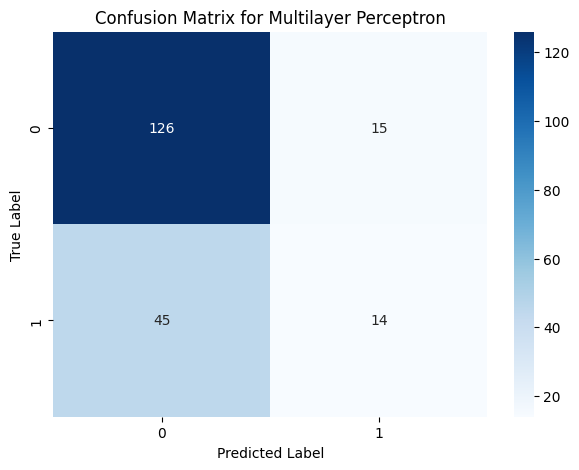

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

hidden_layer_list = [2, 3, 4, 5, 6]
epoch_list = [100, 150, 200, 250]
learning_rate = [0.1, 0.01, 0.001]

best_mean_acc = -1
best_lr = None
best_epoch = None
best_layer = None
results_mlp = []

for lr in learning_rate:
  for epoch in epoch_list:
    for layer in hidden_layer_list:
      # Initialize the MLPClassifier
      mlp = MLPClassifier(hidden_layer_sizes=(layer,), max_iter=epoch, alpha=1e-4,
                          solver='sgd', verbose=10, random_state=42,
                          learning_rate_init=lr)

      # Perform 5-fold cross-validation on the training data
      scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy')

      mean_acc_score = scores.mean()
      print('Validation accuracy for learning rate=', lr," and epoaches=", epoch, "and for layer number", layer, ':', mean_acc_score)

      results_mlp.append((lr, epoch, layer, mean_acc_score))

      # if mean validation accuracy is better than best_mean_acc, update best_mean_acc and hyperparameters
      if (best_mean_acc < mean_acc_score):
          best_mean_acc = mean_acc_score
          best_lr = lr
          best_epoch = epoch
          best_layer = layer

print('Best mean validation accuracy (', best_mean_acc, ') is achieved with learning rate=', best_lr," and epoaches=", best_epoch, "and for layer number", best_layer)

# Initialize the MLPClassifier
best_mlp = MLPClassifier(hidden_layer_sizes=(best_layer,), max_iter=best_epoch, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=best_lr)

# Train the classifier with the training data
best_mlp.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = best_mlp.predict(X_test_full)

# Print the accuracy score of the MLP classifier
print('Test accuracy: ', accuracy_score(y_test_full, y_pred))

cm = confusion_matrix(y_test_full, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Multilayer Perceptron')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

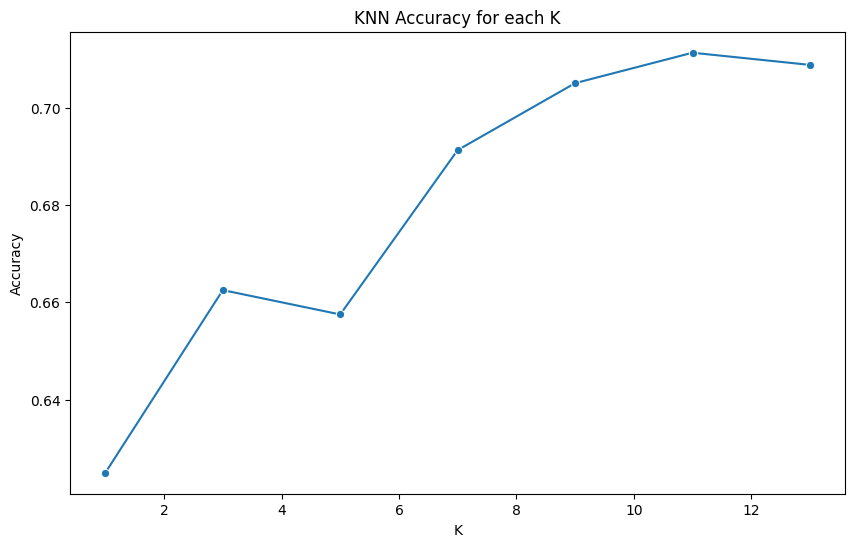

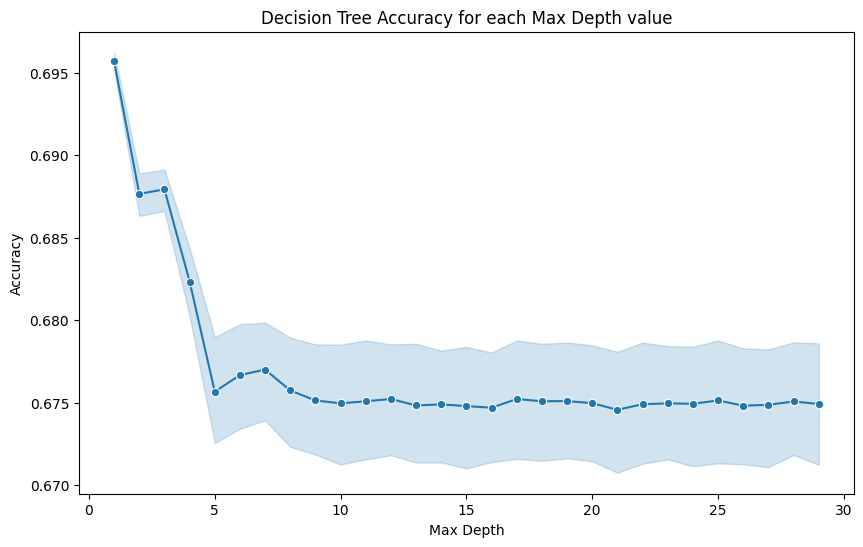

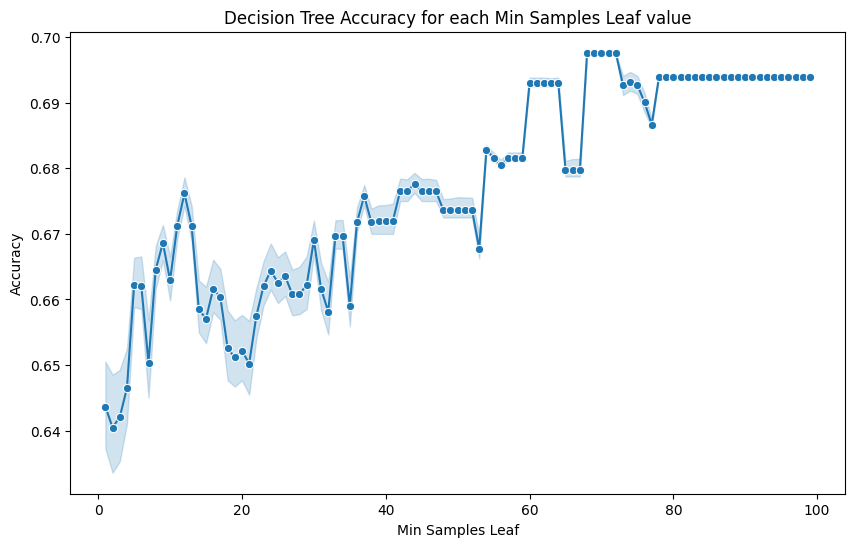

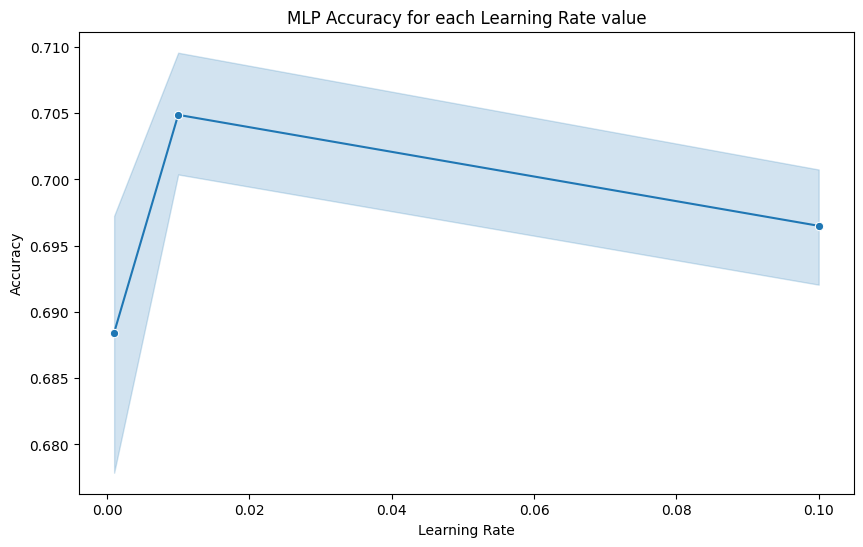

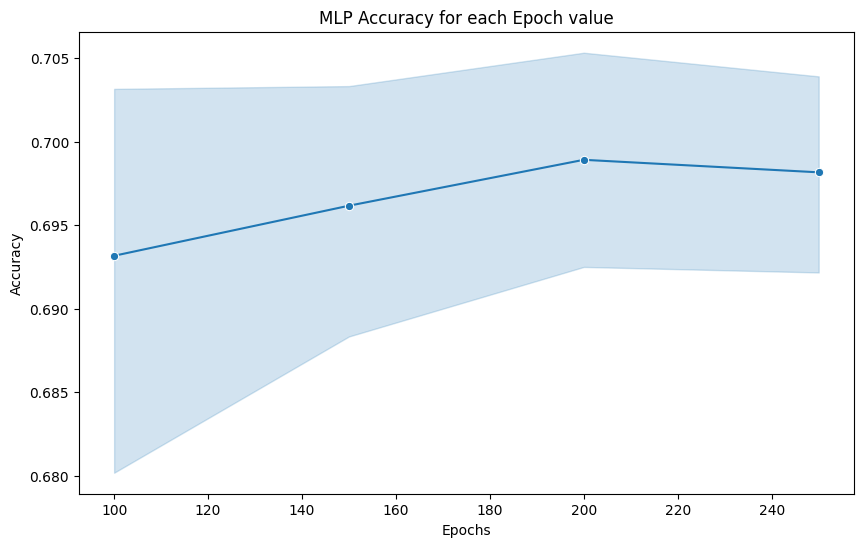

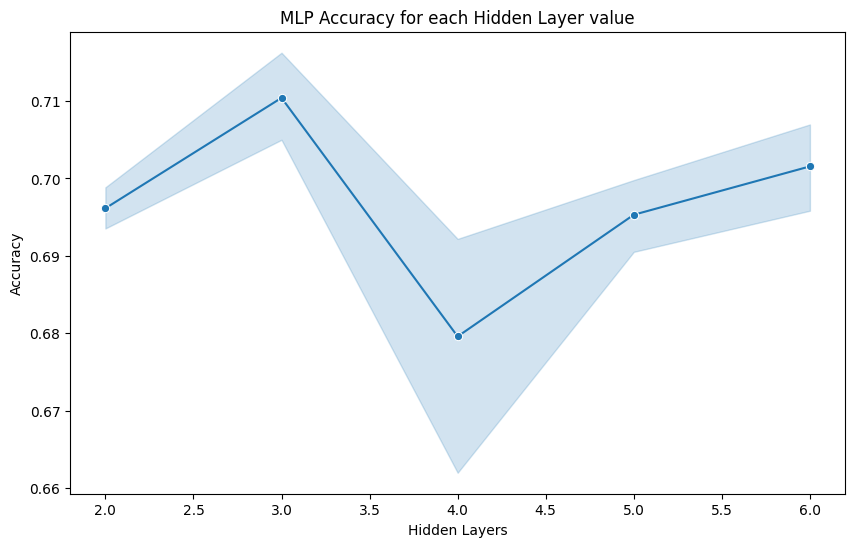

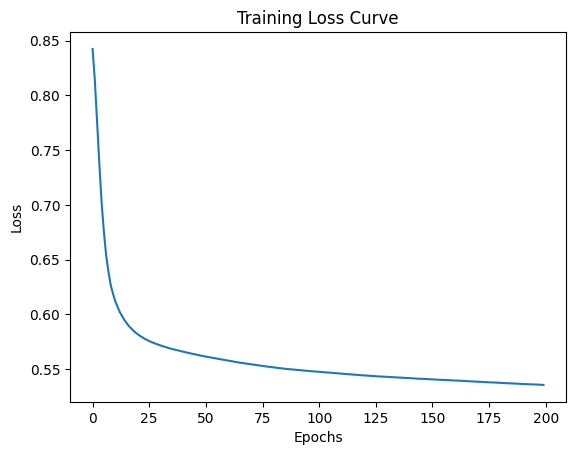

In [ ]:
# Importing additional libraries for plotting and tabulating
import matplotlib.pyplot as plt

# Creating DataFrame for KNN results
df_knn = pd.DataFrame(results_knn, columns=['K', 'Accuracy'])

# Plotting the accuracy score for each K value
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_knn, x='K', y='Accuracy', marker='o')
plt.title('KNN Accuracy for each K')
plt.show()

#Creating DataFrame for Decision Tree results
df_tree = pd.DataFrame(results_tree, columns=['Max Depth', 'Min Samples Leaf', 'Accuracy'])

# Since we have two hyperparameters for Decision Tree, we plot two different graphs
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tree, x='Max Depth', y='Accuracy', marker='o')
plt.title('Decision Tree Accuracy for each Max Depth value')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tree, x='Min Samples Leaf', y='Accuracy', marker='o')
plt.title('Decision Tree Accuracy for each Min Samples Leaf value')
plt.show()

# Creating DataFrame for MLP results
df_mlp = pd.DataFrame(results_mlp, columns=['Learning Rate', 'Epochs', 'Hidden Layers', 'Accuracy'])

# Again, since we have three hyperparameters for MLP, we plot three different graphs
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mlp, x='Learning Rate', y='Accuracy', marker='o')
plt.title('MLP Accuracy for each Learning Rate value')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mlp, x='Epochs', y='Accuracy', marker='o')
plt.title('MLP Accuracy for each Epoch value')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mlp, x='Hidden Layers', y='Accuracy', marker='o')
plt.title('MLP Accuracy for each Hidden Layer value')
plt.show()

#Creating a loss curve for neural network algorithm
plt.plot(best_mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()